# Credit Card Fraud Detection Capstone Project

## Problem Statement: 
Fraudulent activities have increased severalfold, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day.
Every fraudulent credit card transaction that occur is a direct financial loss to the bank as the bank is responsible for the fraud transactions as well it also affects the overall customer satisfaction adversely.    
**The aim of this project is to identify and predict fraudulent credit card transactions using machine learning models.** 


## Data Understanding :

### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for just 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

The distribution plots of the variables were Gaussian, which might indicate the effects of transformations that had already occurred on the data set. 

In [1]:
# Importing python libraries :

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# EDA and Data Preparation

In [4]:
#To read csv File from locally stored file
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
# Examining the dataset imported:
df.shape

(284807, 31)

In [6]:
# Lets check the numeric distribution of the data:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [7]:
#Examining the data frame for the shape, datatypes, NUlls etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Check the fraud/Non_Fraud related records
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
#find % values of class
(df.groupby('Class')['Class'].count()/df['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [10]:
#check if any null values
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#observe the different feature type present in the data
#lets check data types of the features
df.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [12]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

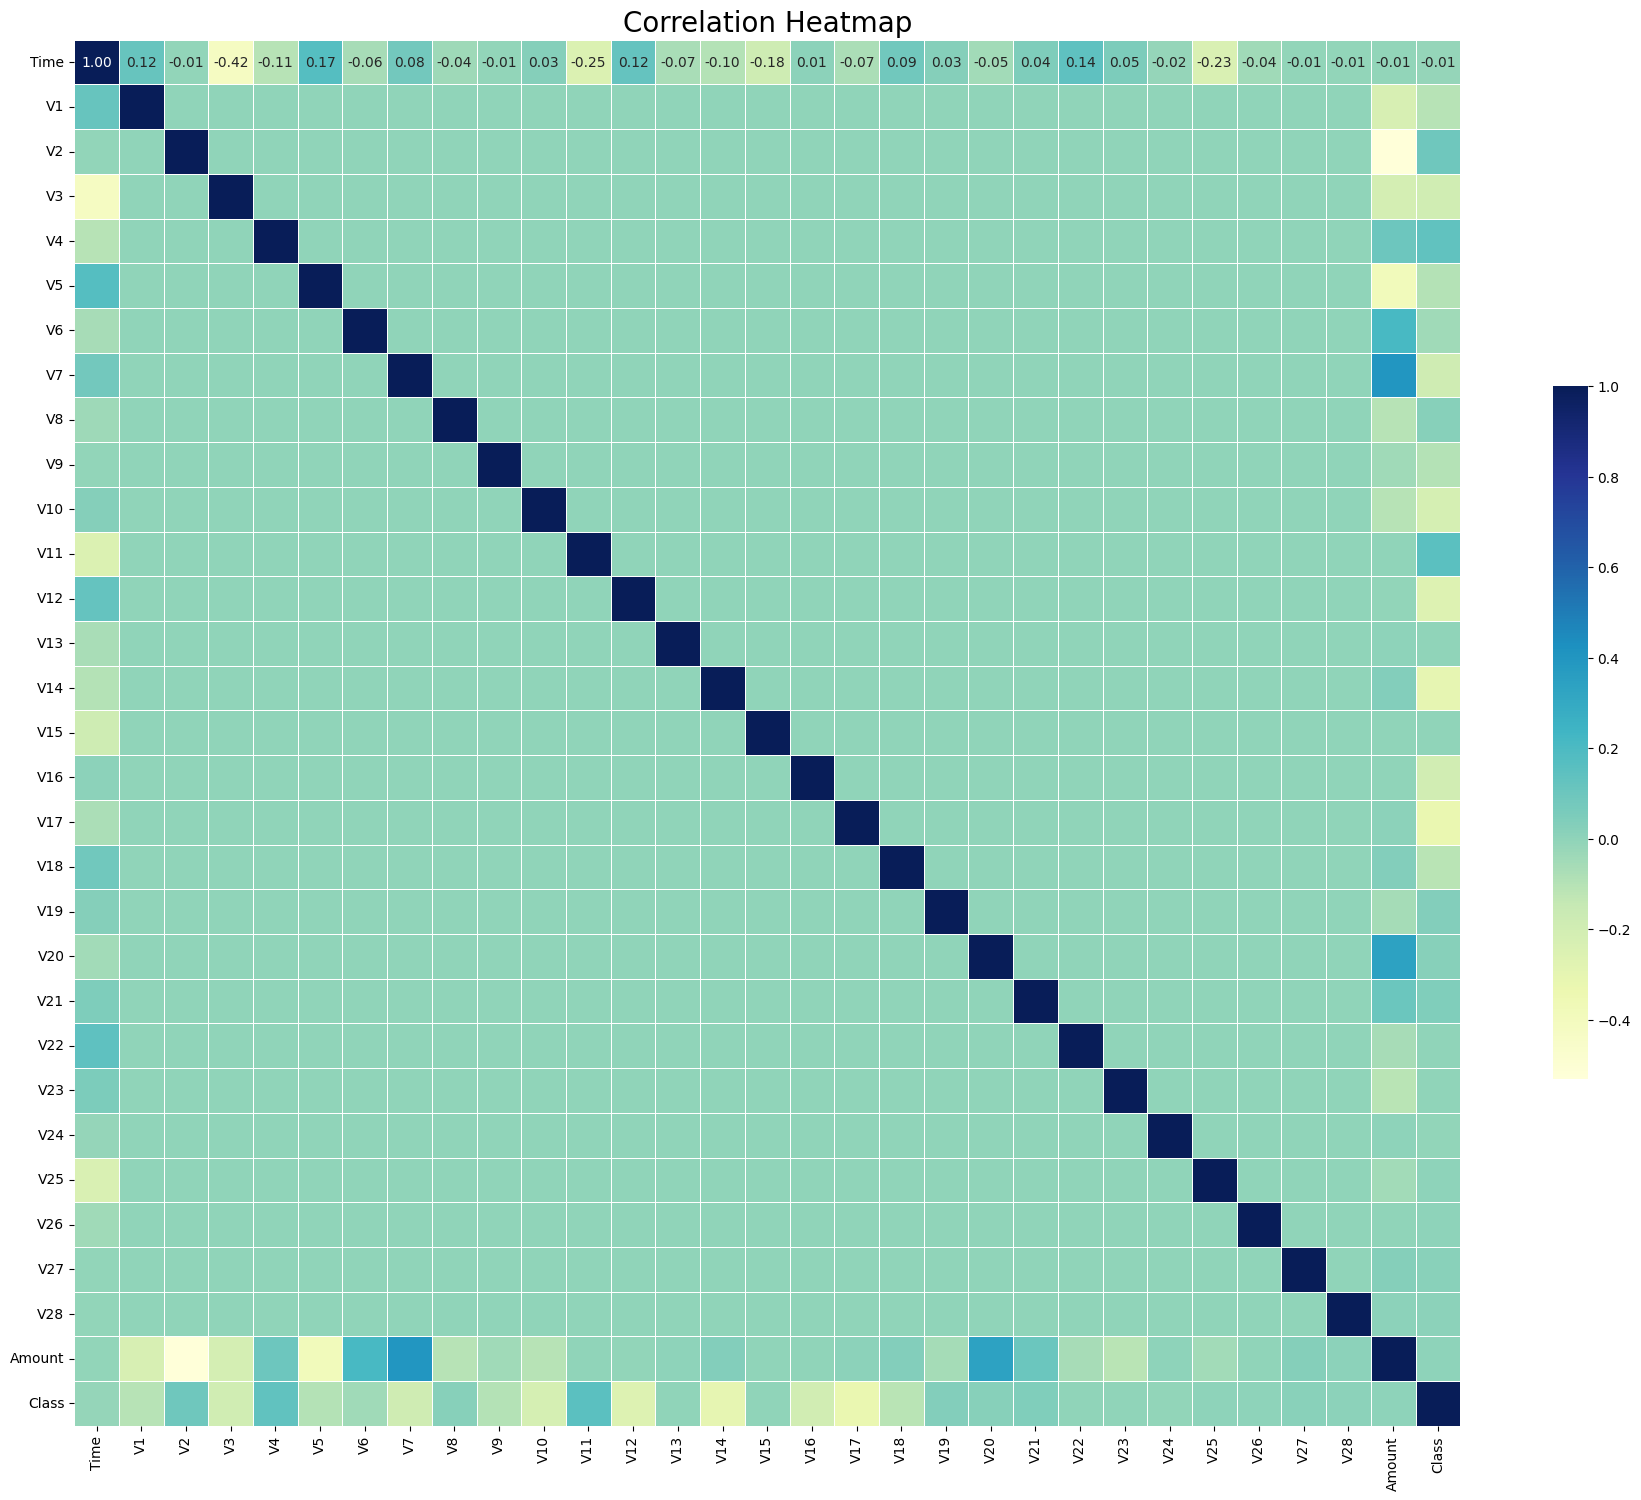

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(
    cor,
    cmap="YlGnBu",    # Colormap
    annot=True,       # Annotate cells with correlation values
    fmt=".2f",        # Format for annotation text
    linewidths=.5,    # Width of the lines that divide cells
    cbar_kws={'shrink': .5},  # Shrink color bar
    square=True       # Square cells
)

# Adding a title
plt.title('Correlation Heatmap', fontsize=20)

# Display the plot
plt.show()


In [14]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

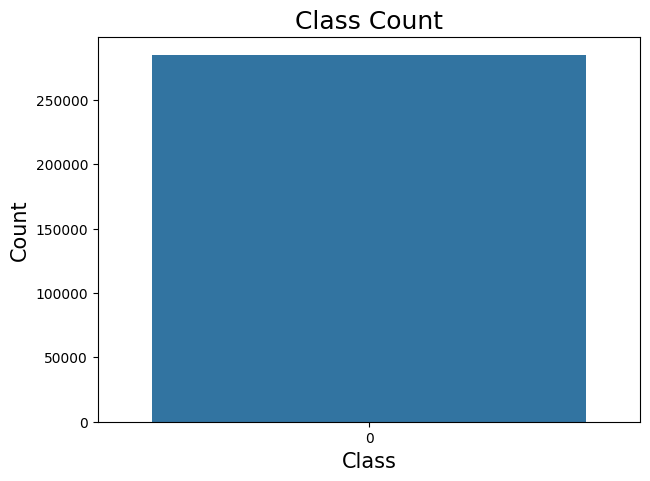

In [15]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()


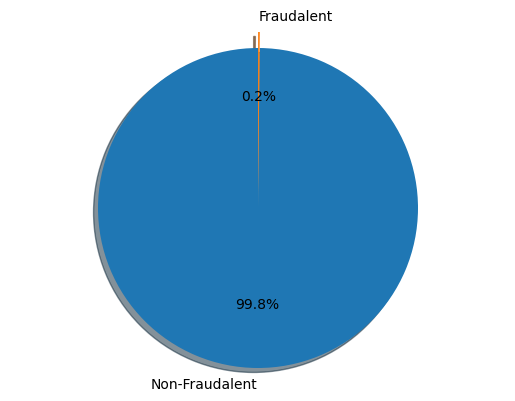

In [16]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


## So we have 492 fraudalent transactions out of 284807 total credit card transactions.

Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example.
To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [18]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

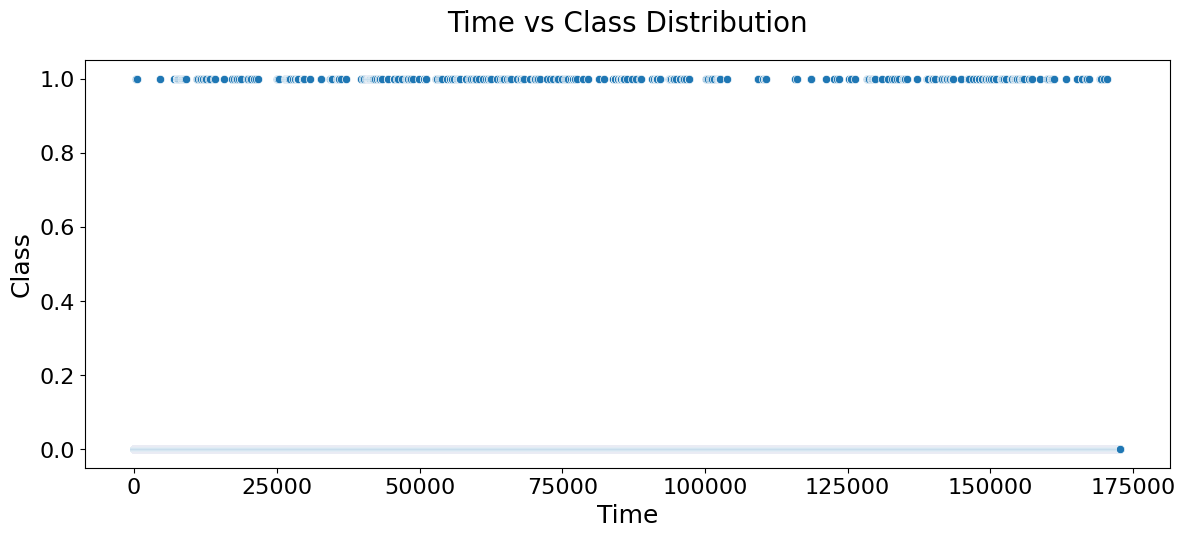

In [19]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

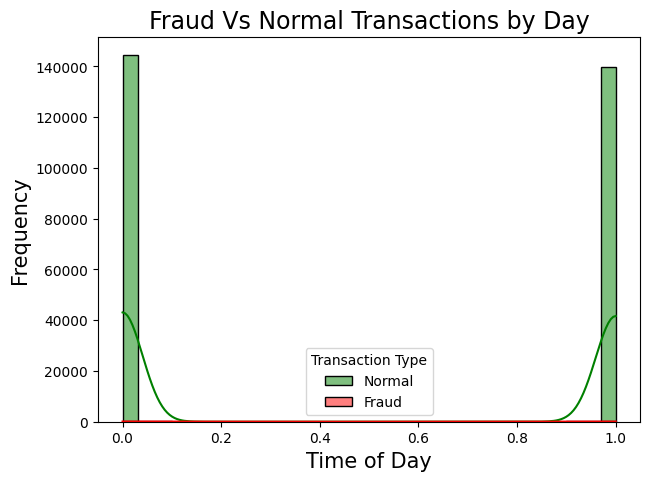

In [20]:

# The fraud Vs normal transaction by day
plt.figure(figsize=(7, 5))
sns.histplot(df[df['Class'] == 0]["Time_Day"], color='green', label='Normal', kde=True)
sns.histplot(df[df['Class'] == 1]["Time_Day"], color='red', label='Fraud', kde=True)
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.xlabel('Time of Day', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(title='Transaction Type')
plt.show()


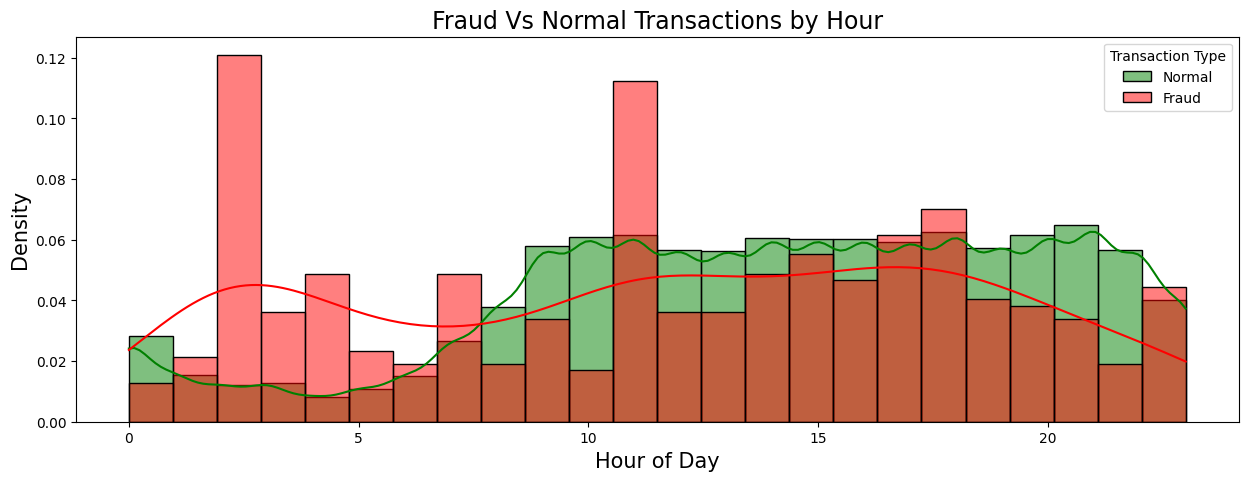

In [21]:
# The fraud Vs normal transaction by hour
plt.figure(figsize=(15, 5))

# Plot for normal transactions
sns.histplot(df[df['Class'] == 0]["Time_Hour"], color='green', label='Normal', kde=True, stat="density", bins=24)

# Plot for fraudulent transactions
sns.histplot(df[df['Class'] == 1]["Time_Hour"], color='red', label='Fraud', kde=True, stat="density", bins=24)

# Add labels and title
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.xlabel('Hour of Day', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(title='Transaction Type')

# Display the plot
plt.show()

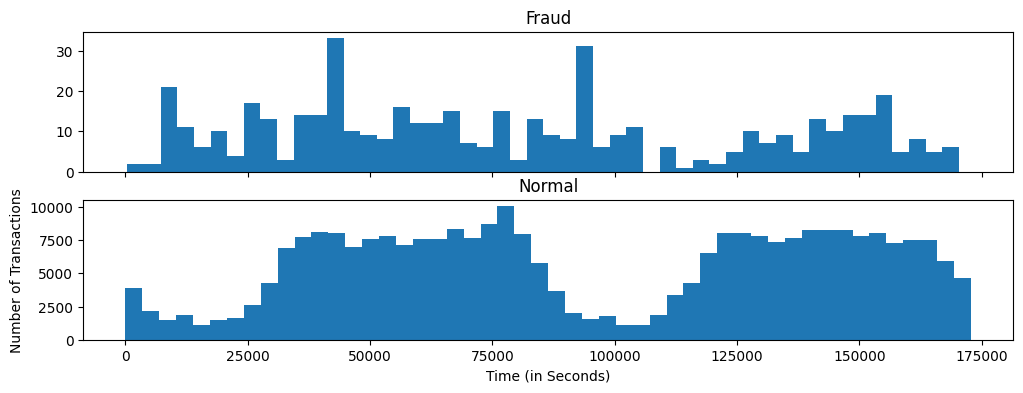

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [23]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [24]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

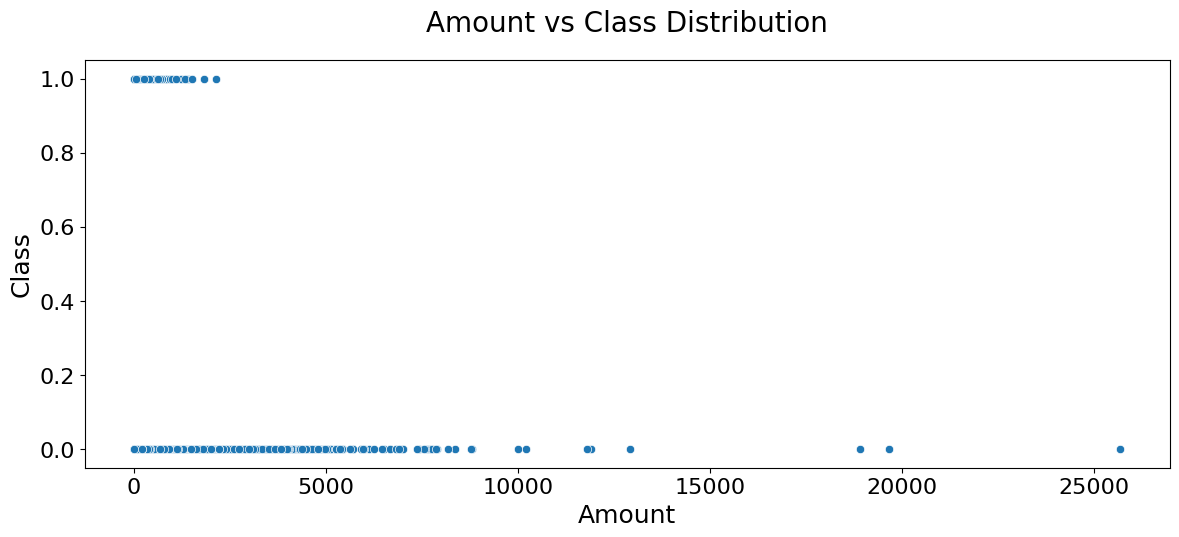

In [25]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


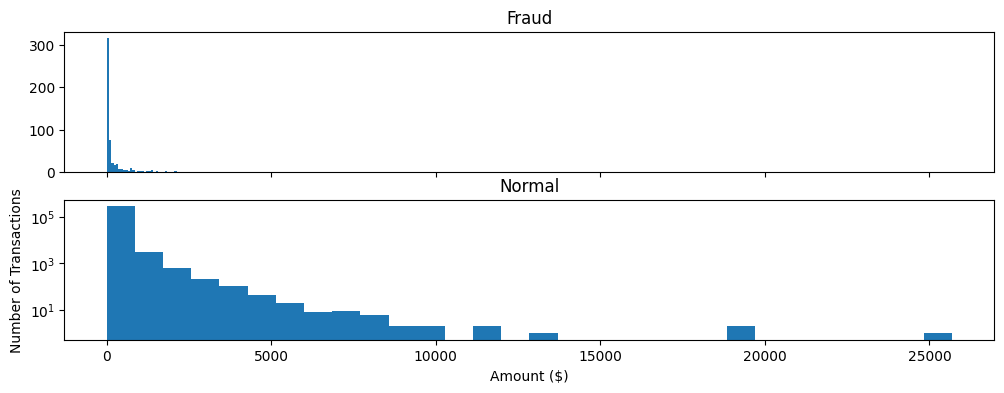

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [27]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

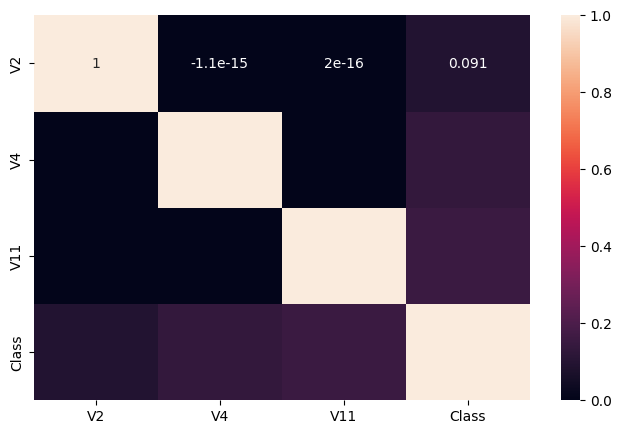

In [28]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

### Plotting the distribution of a variable

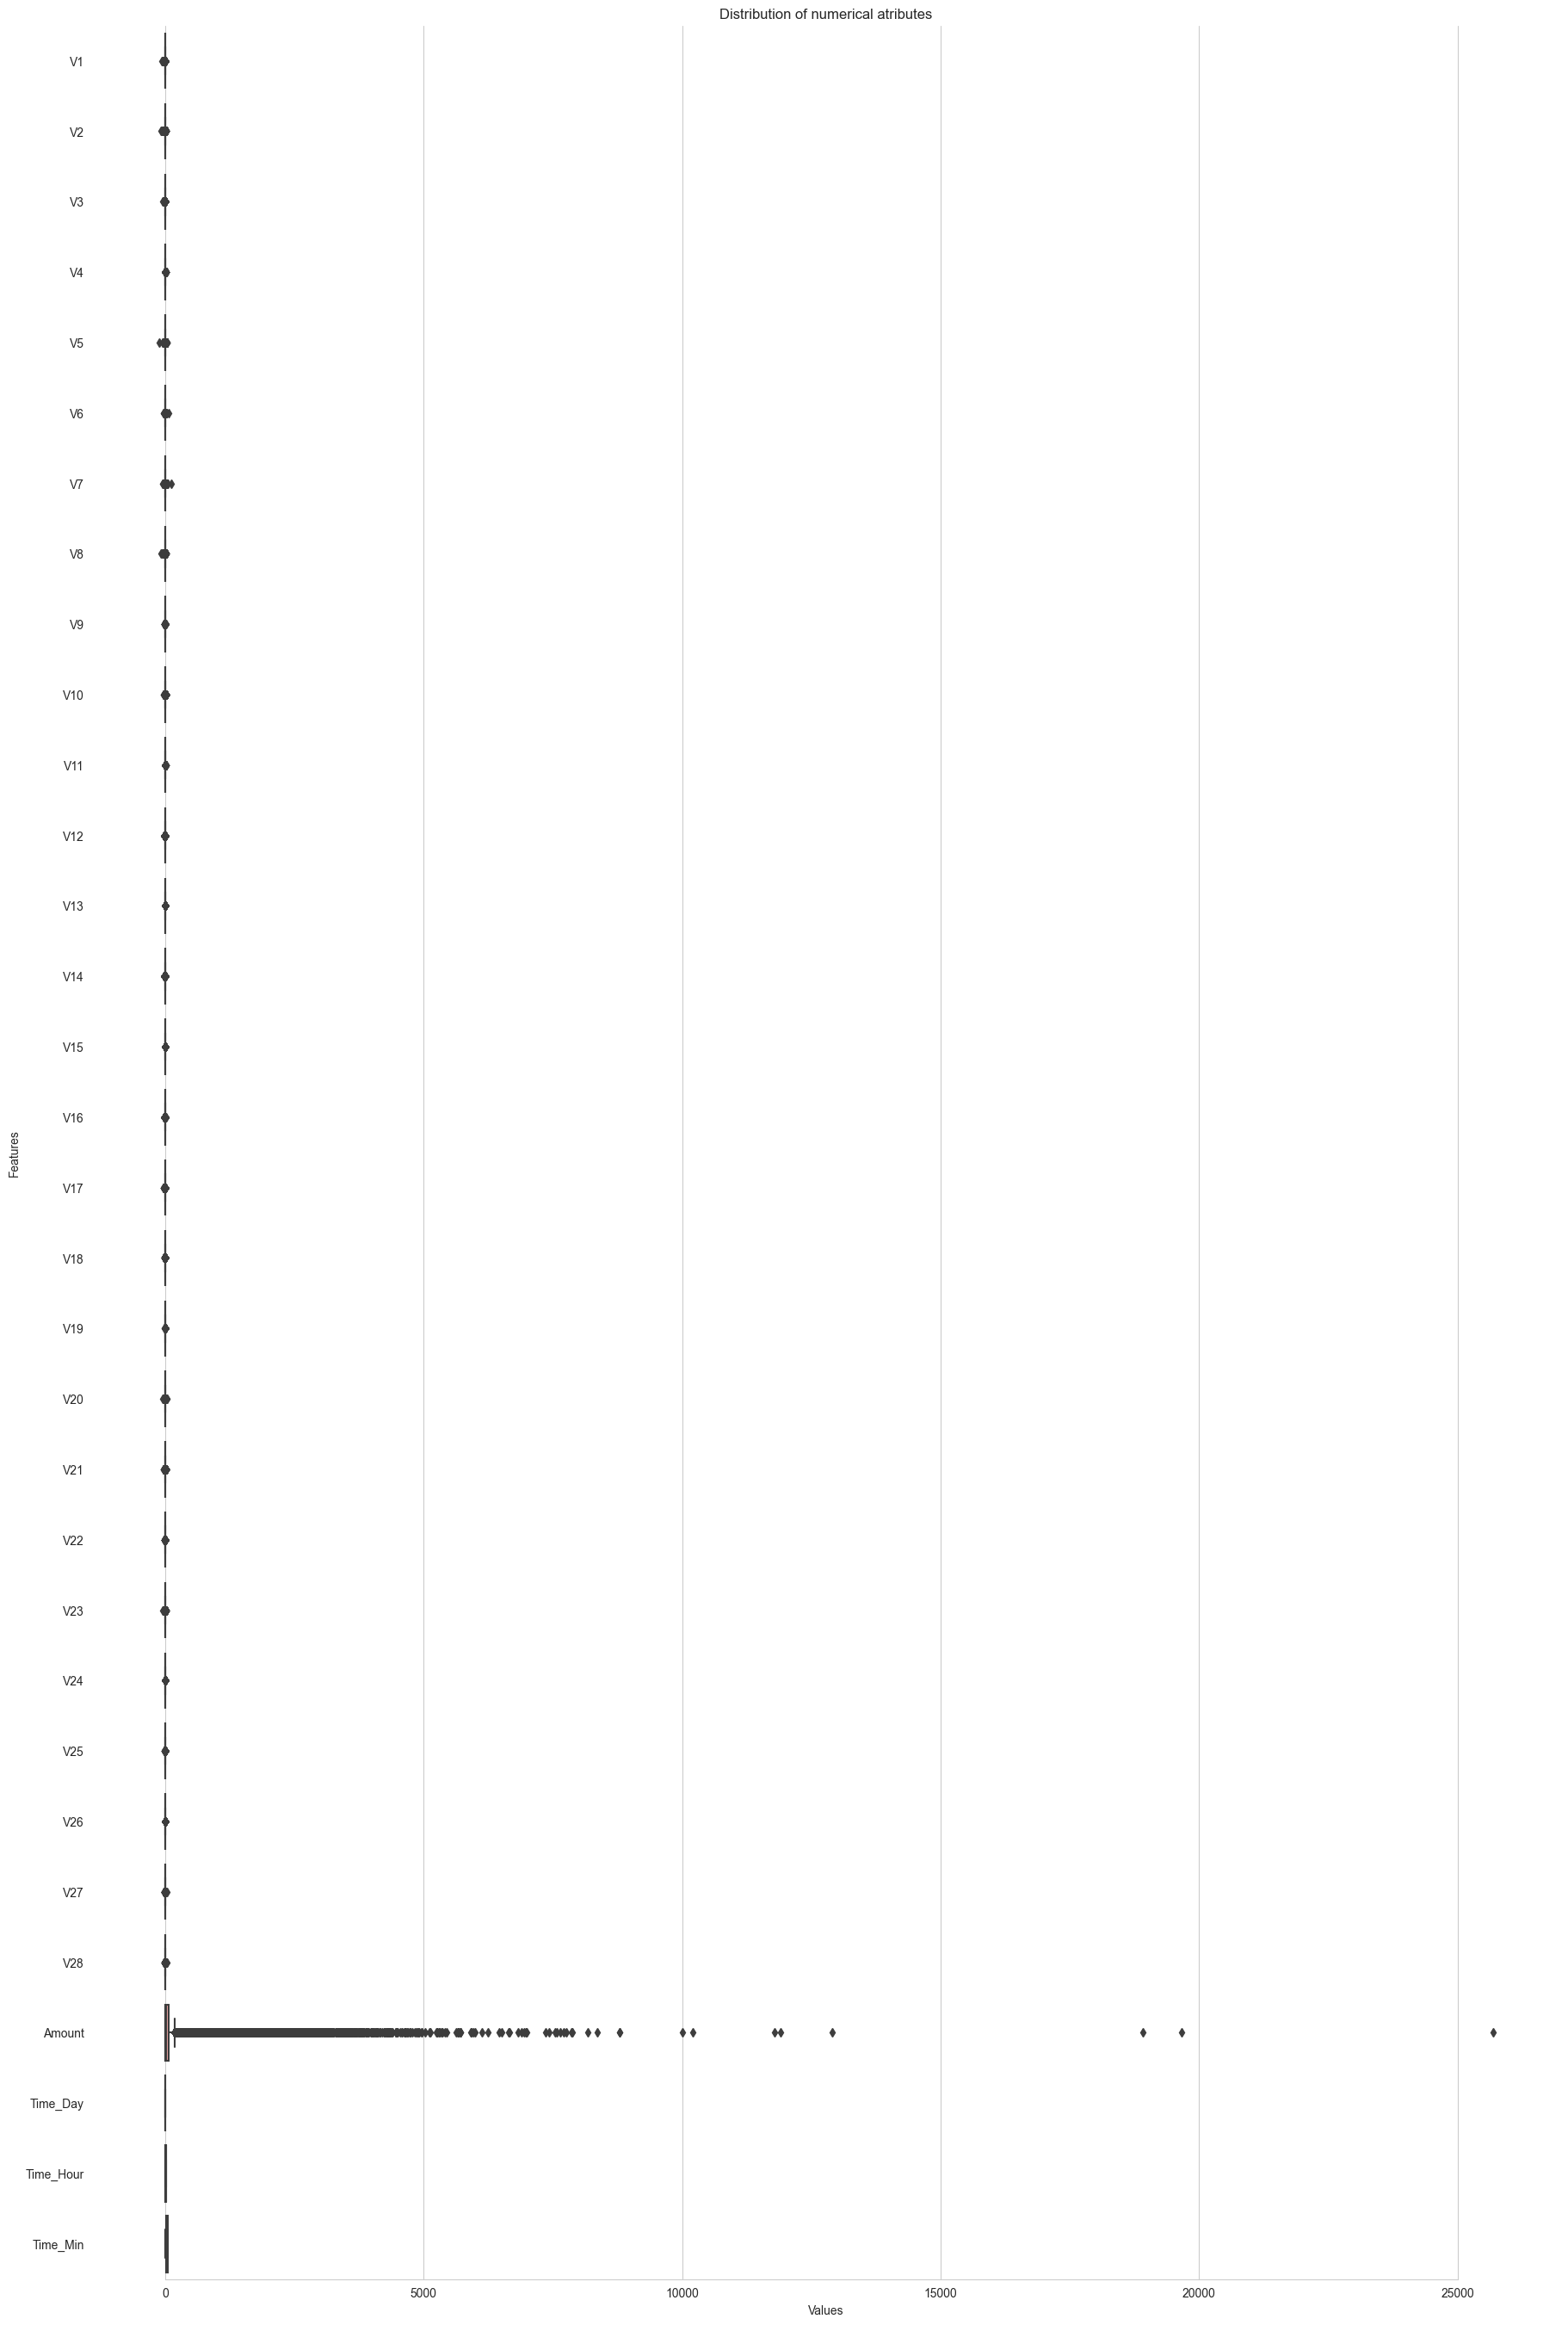

In [29]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [30]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

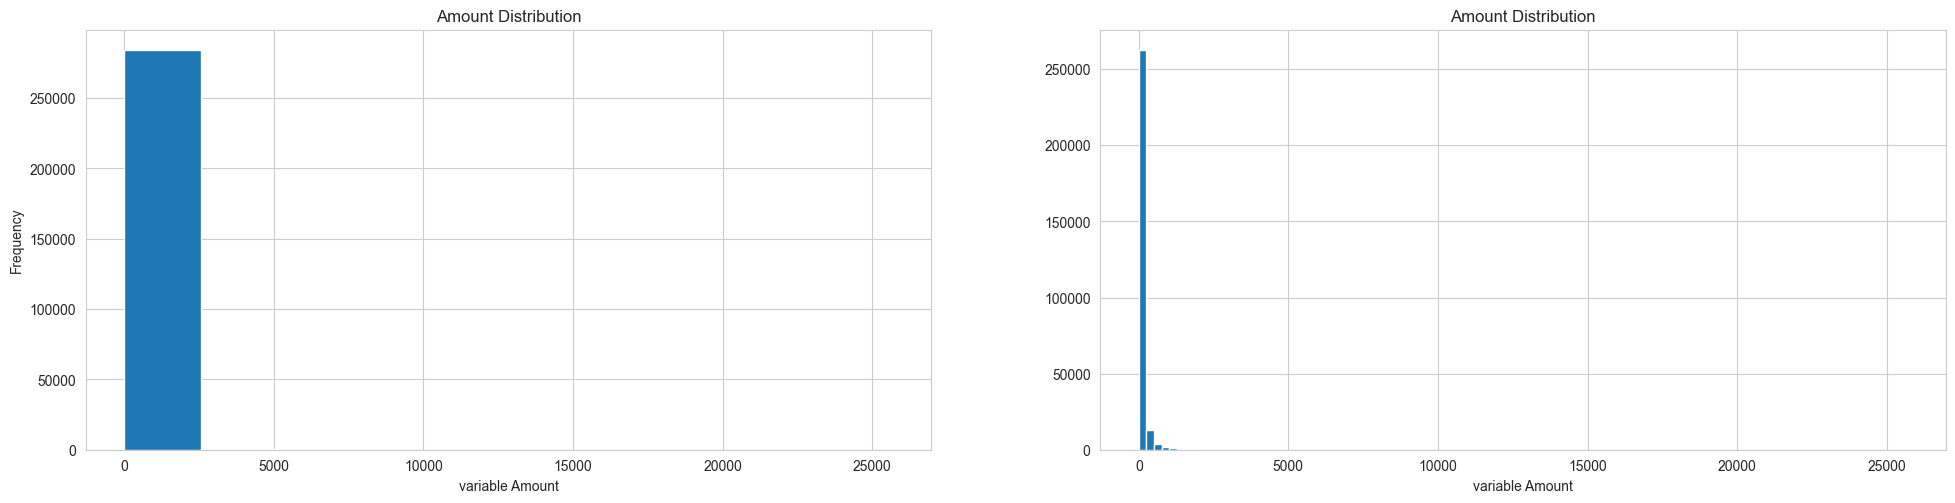

In [31]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()


### Splitting the data into train & test data

In [33]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)

In [34]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [35]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [36]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [37]:
cols = list(X.columns.values)

In [38]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

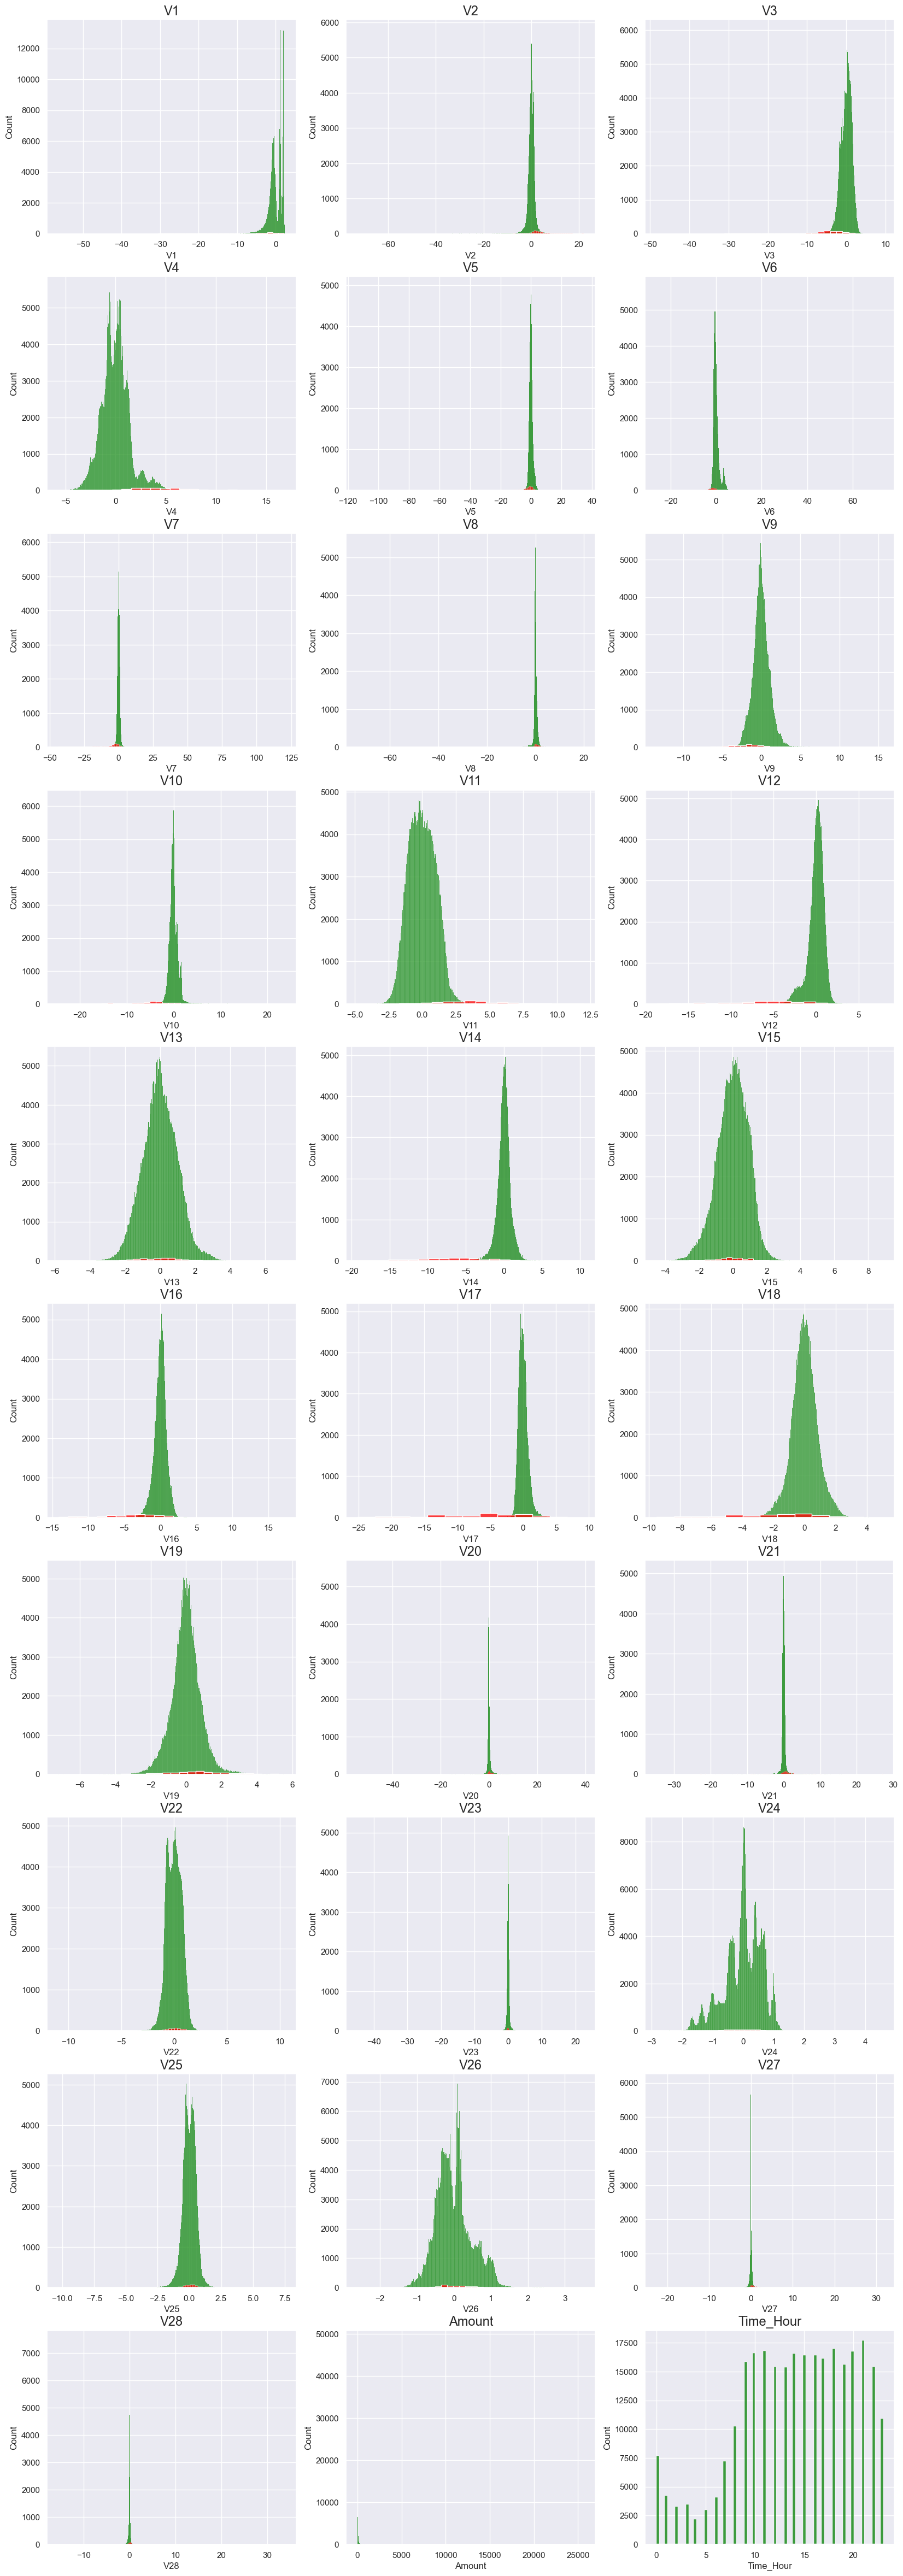

In [39]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.histplot(X[col][normal_records], color='green')
  sns.histplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [40]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import metrics

def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudulent', 'Fraudulent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12)
    plt.show()

def buildAndRunLogisticModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Logistic Regression
    from sklearn import linear_model
    from sklearn.model_selection import KFold

    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    searchCV_l2 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10
    )

    searchCV_l1 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='liblinear',
        tol=10
    )

    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
    print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

    print("Parameters for l2 regularisations")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)

    print("Parameters for l1 regularisations")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)

    # Find predicted values
    y_pred_l2 = searchCV_l2.predict(X_test)
    y_pred_l1 = searchCV_l1.predict(X_test)

    # Find predicted probabilities
    y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:, 1]
    y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

    print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l2)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l2))

    print("Accuracy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_l1)
    print("Classification Report")
    print(classification_report(y_test, y_pred_l1))

    from sklearn.metrics import roc_auc_score
    l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
    print("l2 roc_value: {0}".format(l2_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l2 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['Logistic Regression with L2 Regularisation'],
        'Accuracy': [Accuracy_l2],
        'roc_value': [l2_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
    print("l1 roc_value: {0}".format(l1_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l1 threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['Logistic Regression with L1 Regularisation'],
        'Accuracy': [Accuracy_l1],
        'roc_value': [l1_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results

def buildAndRunKNNModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate KNN model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score

    # Create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print("Model score")
    print(score)

    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}".format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['KNN'],
        'Accuracy': [score],
        'roc_value': [knn_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results

def buildAndRunSVMModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train, y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("Accuracy score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("Classification Report")
    print(classification_report(y_test, y_pred_SVM))

    # Run classifier
    classifier = SVC(kernel='sigmoid', probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)

    print("SVM roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['SVM'],
        'Accuracy': [SVM_Score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results

def buildAndRunTreeModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy']

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        print(c + " score: {0}".format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}".format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
        plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
        plt.legend(loc=4)
        plt.show()

        df_Results = pd.concat([df_Results, pd.DataFrame({
            'Data_Imbalance_Handling': [DataImabalance],
            'Model': ['Tree Model with {0} criteria'.format(c)],
            'Accuracy': [test_score],
            'roc_value': [tree_roc_value],
            'threshold': [threshold]
        })], ignore_index=True)

    return df_Results

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc

def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    RF_test_score = accuracy_score(y_test, y_pred)
    print('Model Accuracy: {0}'.format(RF_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    rf_probs = rf.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}".format(roc_value))
    fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['Random Forest'],
        'Accuracy': [RF_test_score],
        'roc_value': [roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results


def buildAndRunXGBoostModels(df_Results, DataImabalance, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score

    # Fit model on training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr, tpr, label="Test, auc=" + str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
        'Data_Imbalance_Handling': [DataImabalance],
        'Model': ['XGBoost'],
        'Accuracy': [XGB_test_score],
        'roc_value': [XGB_roc_value],
        'threshold': [threshold]
    })], ignore_index=True)

    return df_Results


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [48]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [49]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

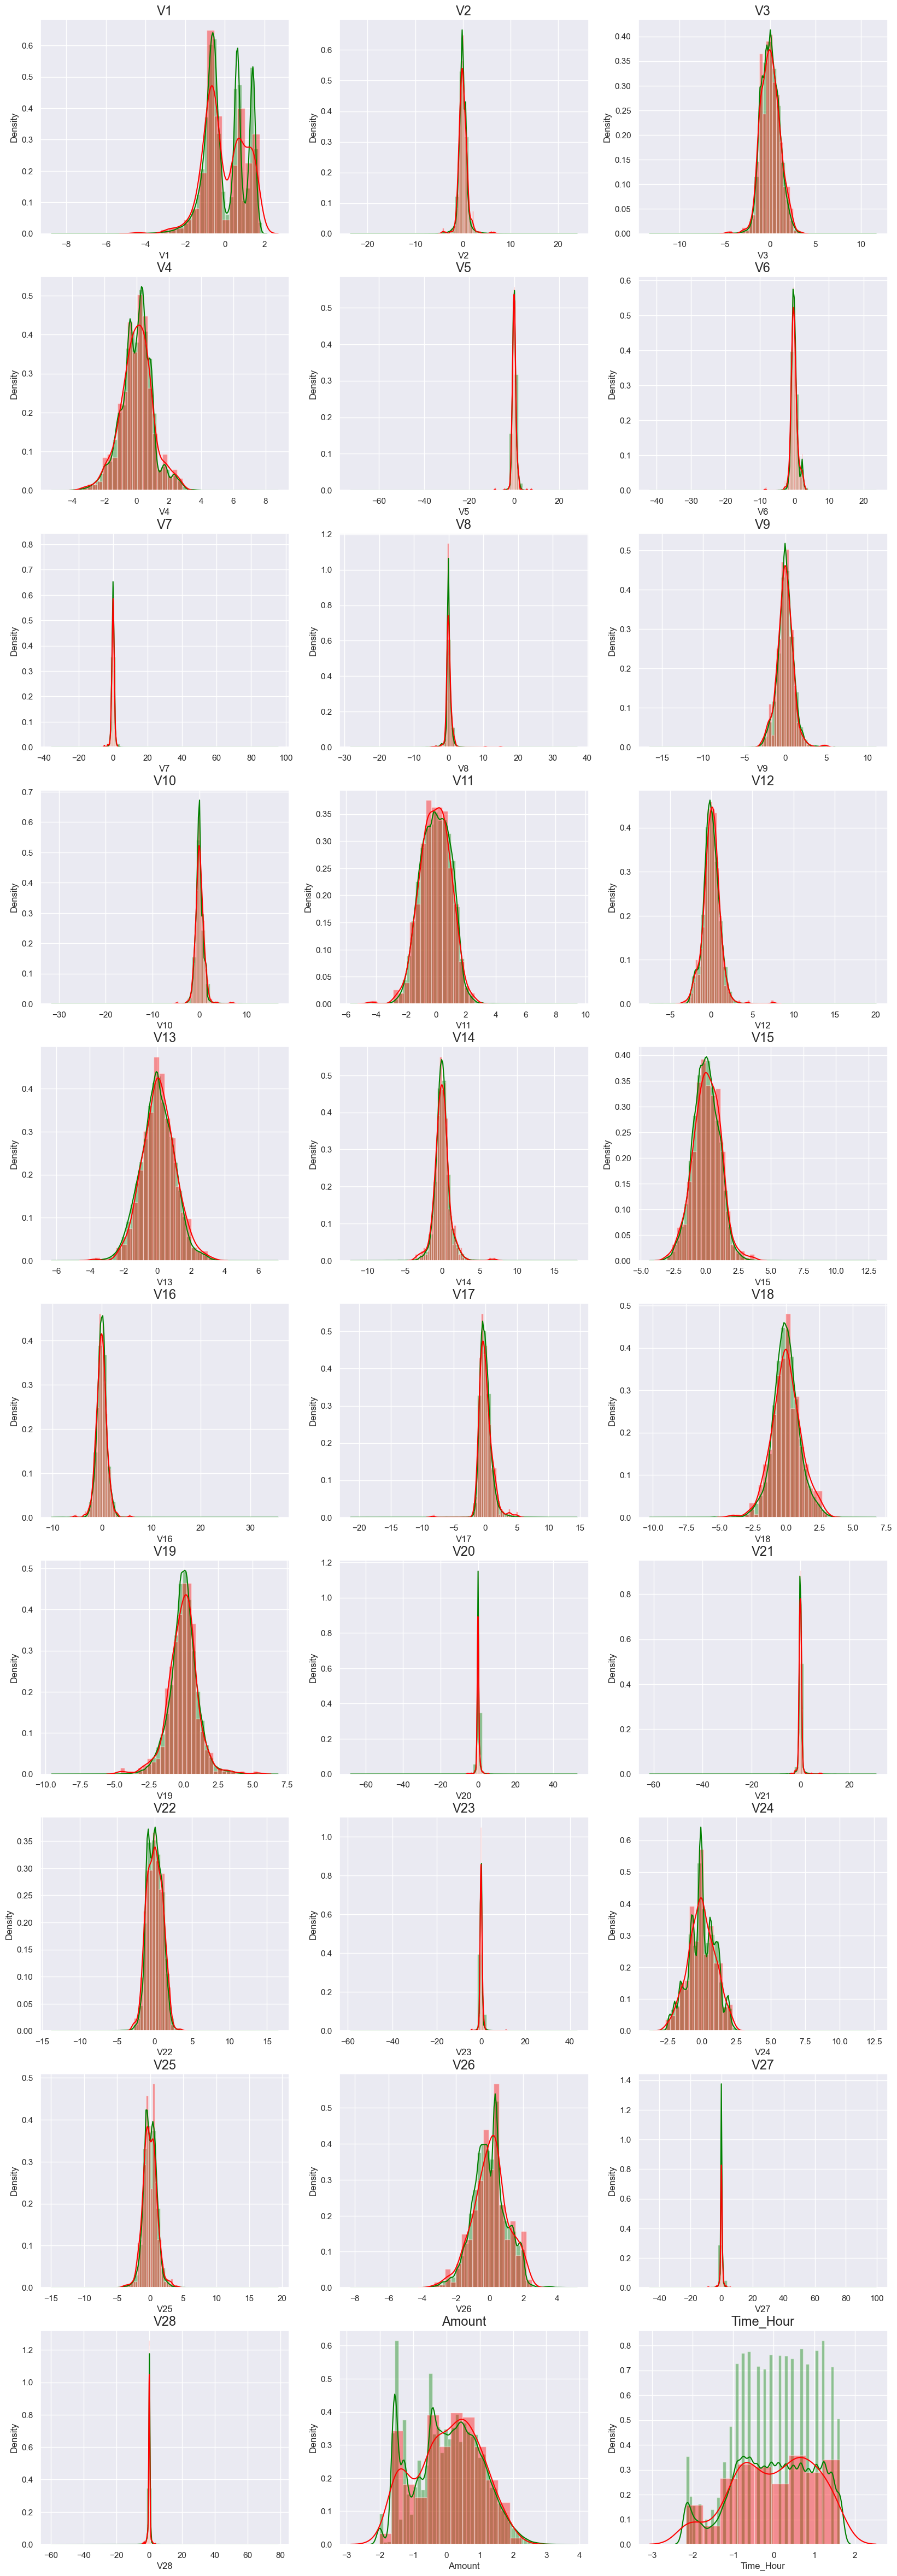

In [56]:
# plot the histogram of a variable from the train dataset again to see the result 

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


## Model Building
- Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

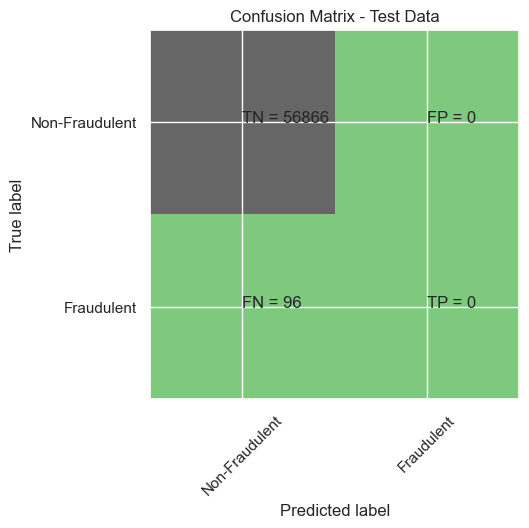

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


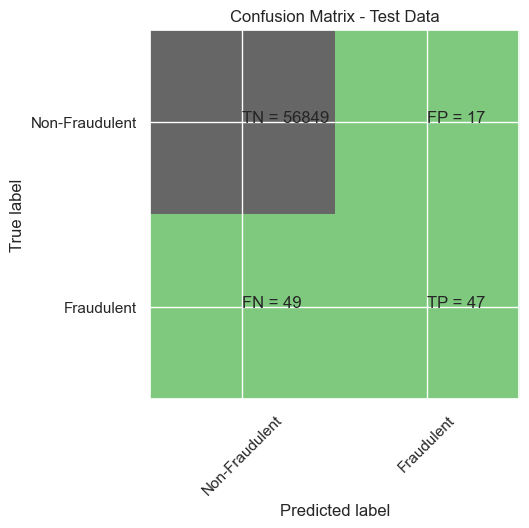

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


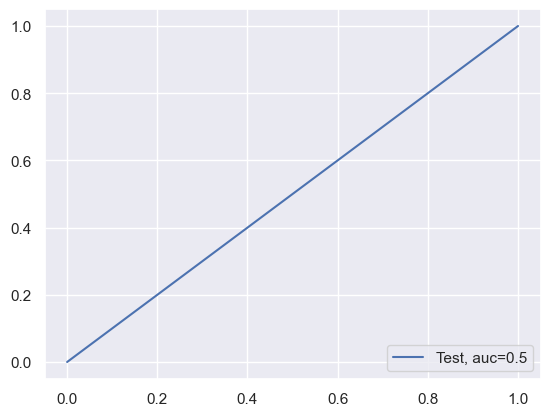

l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493844821434
ROC for the test dataset 96.4%


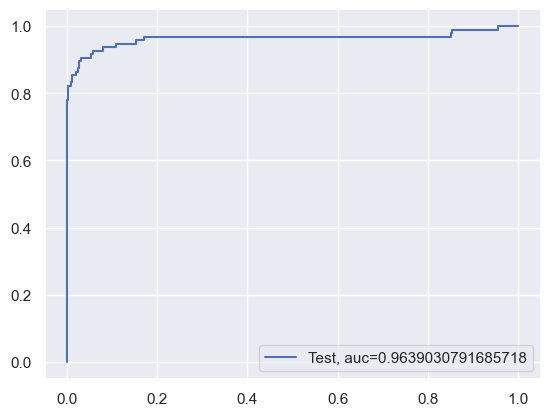

Time Taken by Model: --- 71.34209060668945 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9992977774656788
Confusion Matrix


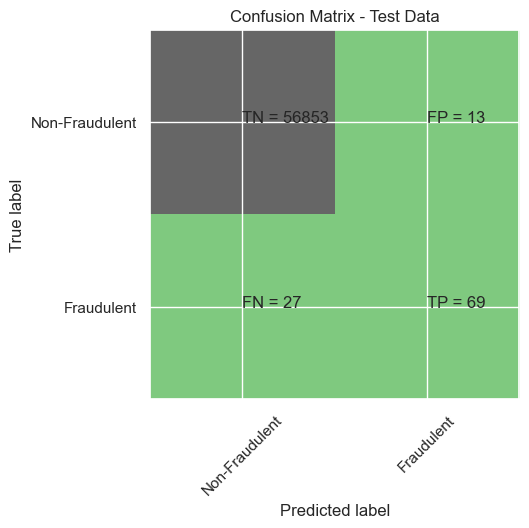

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


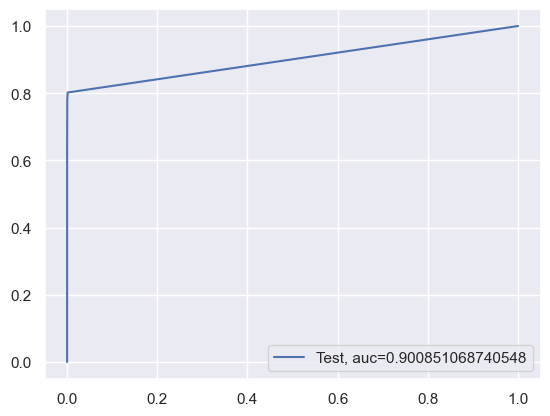

Time Taken by Model: --- 65.93455410003662 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


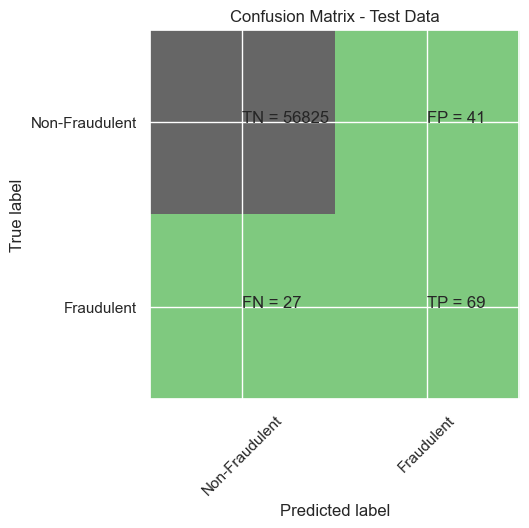

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


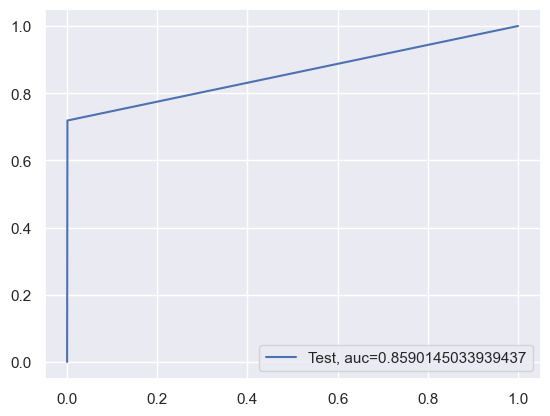

entropy score: 0.9990519995786665
Confusion Matrix


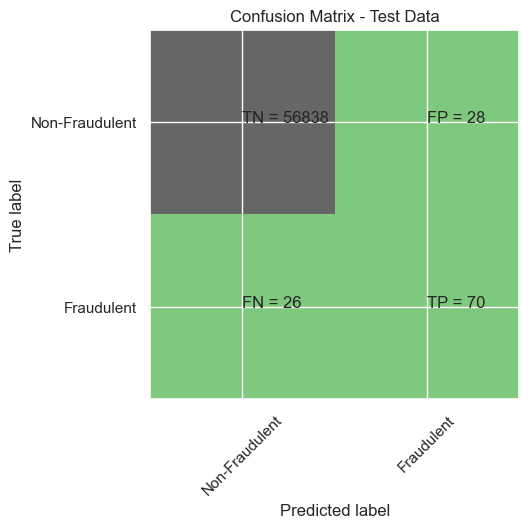

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


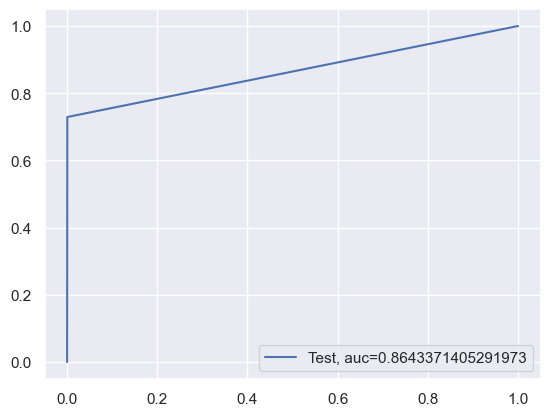

Time Taken by Model: --- 32.090402364730835 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


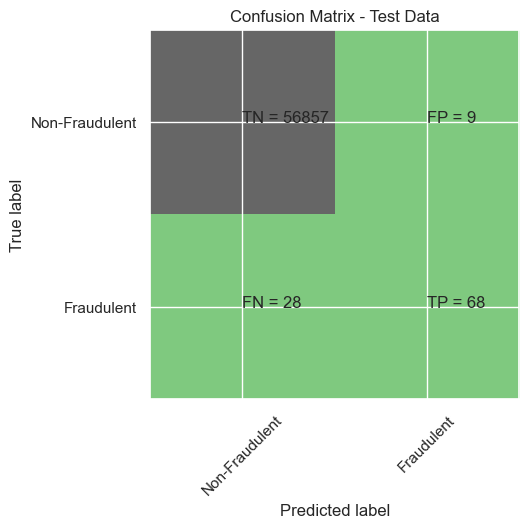

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


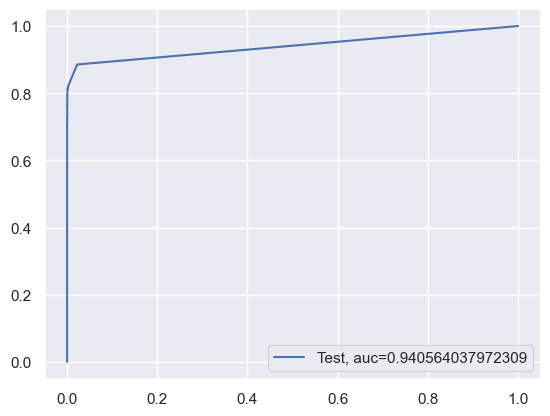

Time Taken by Model: --- 209.68355059623718 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999385555282469
Confusion Matrix


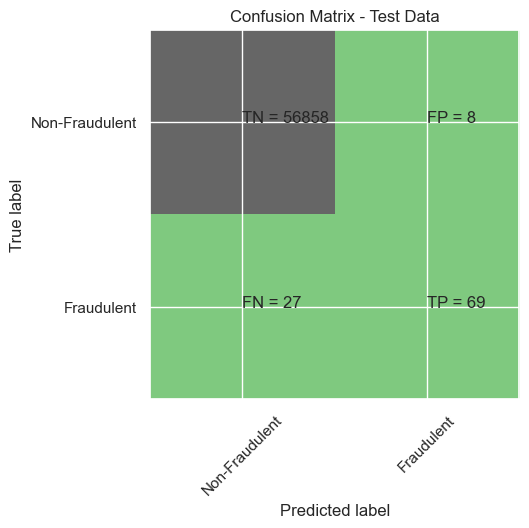

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.72      0.80        96

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost roc_value: 0.9775861967901147
XGBoost threshold: 2.300571941304952e-05
ROC for the test dataset 97.8%


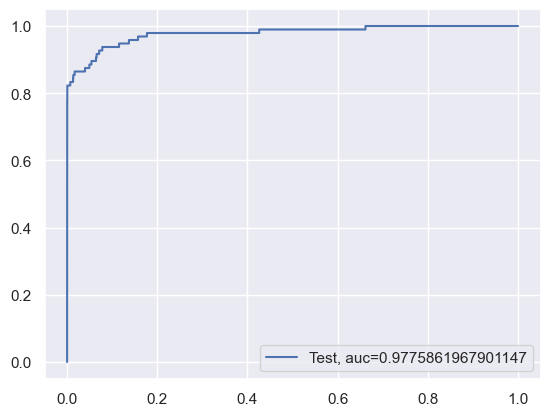

Time Taken by Model: --- 2.0566372871398926 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy score : 0.9985604438046417
Confusion Matrix


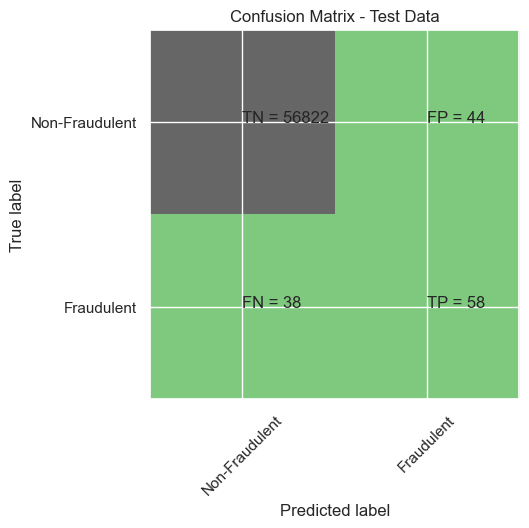

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913110975802765
SVM threshold: 0.0011771658541168204
ROC for the test dataset 89.1%


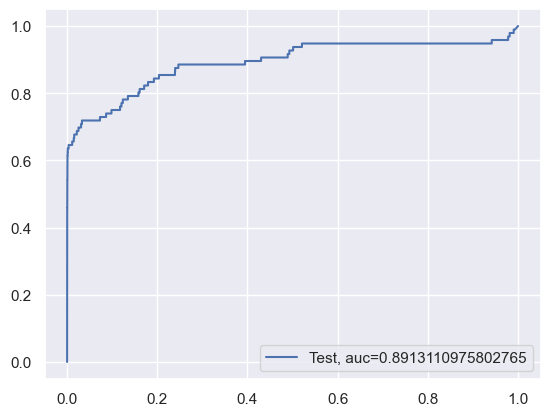

Time Taken by Model: --- 69.57651734352112 seconds ---


In [57]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [58]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0                      NaN  Logistic Regression with L2 Regularisation   
1                      NaN  Logistic Regression with L1 Regularisation   
2                      NaN                                         KNN   
3                      NaN               Tree Model with gini criteria   
4                      NaN            Tree Model with entropy criteria   

   Accuracy  roc_value  threshold Data_Imbalance_Handling  
0  0.998315   0.500000        inf       Power Transformer  
1  0.998841   0.963903   0.009276       Power Transformer  
2  0.999298   0.900851   0.200000       Power Transformer  
3  0.998806   0.859015   1.000000       Power Transformer  
4  0.999052   0.864337   1.000000       Power Transformer

# Perform cross validation with RepeatedKFold

In [59]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      4 ... 284804 284805 284806] TEST: [     2      3     13 ... 284788 284790 284794]
TRAIN: [     0      2      3 ... 284802 284804 284806] TEST: [     1     10     14 ... 284791 284803 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      9     31 ... 284797 284798 284801]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     6      8     12 ... 284799 284802 284804]
TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      4      7 ... 284796 284800 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3     17     19 ... 284783 284793 284804]
TRAIN: [     0      3      5 ... 284803 284804 284806] TEST: [     1      2      4 ... 284799 284802 284805]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     6     12     16 ... 284800 284801 284806]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      5      7 ... 284794 284798 284803]
TRAIN: [     0     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5729411719594685
Max auc_roc for l1: 0.9738091760464787
Parameters for l2 regularisations
[[-1.33160039e-07  9.25849075e-08 -1.68125884e-07  1.30874653e-07
  -7.46040953e-08 -4.08265625e-08 -1.47645493e-07  6.99817216e-09
  -6.22428661e-08 -1.49183626e-07  1.08097558e-07 -1.70045880e-07
  -5.19794134e-09 -1.91394386e-07  3.68298636e-09 -1.13545432e-07
  -1.64346964e-07 -6.00780002e-08  9.97694339e-09  1.80352538e-08
   1.76684962e-08  2.80424049e-09  2.03430921e-09 -3.46997766e-09
   3.57795107e-09 -1.61929713e-09  6.76490646e-09  7.03952381e-10
  -6.63091367e-04 -1.05608617e-04]]
[-7.51313992e-06]
{1: array([[0.58151696, 0.58161849, 0.58059413, 0.57896667, 0.57896667,
        0.57896667, 0.57896667, 0.57896667, 0.57896667, 0.57896667,
        0.57896667, 0.57896667, 0.57896667, 0.57896667, 0.57896667,
        0.57896667, 0.57896667, 0.57896667, 0.57896667, 0.57896667],
       [0.54801477, 0.54744631, 0.54613036, 0

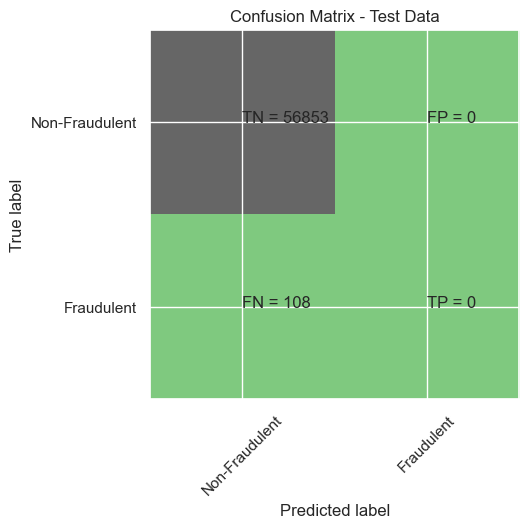

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.00      0.00      0.00       108

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9988237566053967
Confusion Matrix


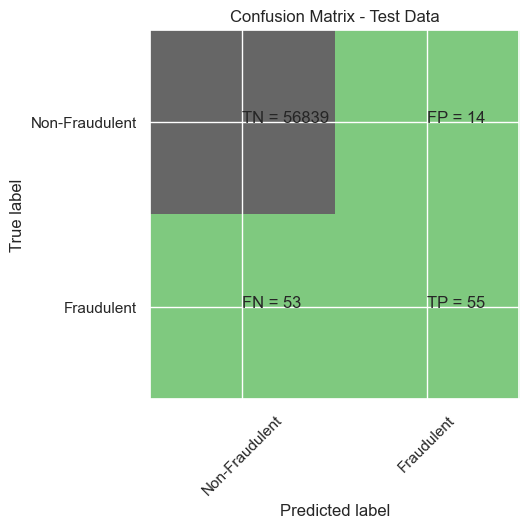

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.80      0.51      0.62       108

    accuracy                           1.00     56961
   macro avg       0.90      0.75      0.81     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5519737060684767
l2 threshold: 0.49927814673812565
ROC for the test dataset 55.2%


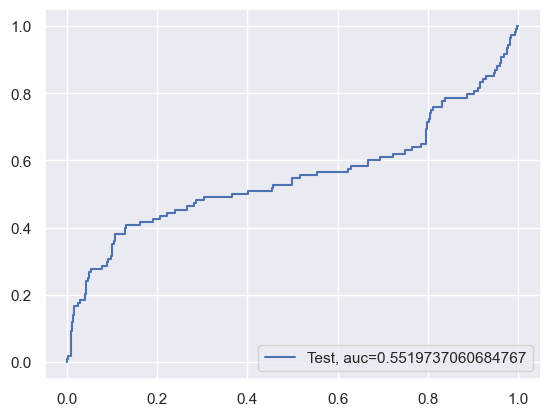

l1 roc_value: 0.8774943307333859
l1 threshold: 0.04626073210408135
ROC for the test dataset 87.7%


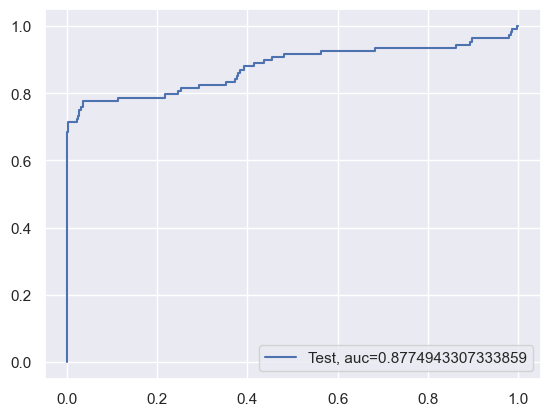

Time Taken by Model: --- 72.35819506645203 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9991046505503766
Confusion Matrix


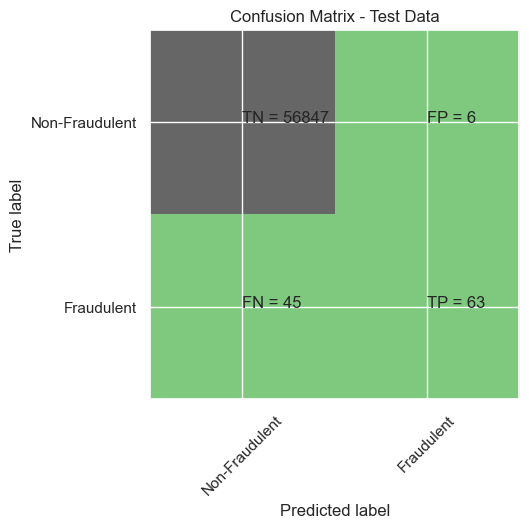

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.91      0.58      0.71       108

    accuracy                           1.00     56961
   macro avg       0.96      0.79      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8423406432834255
KNN threshold: 0.2
ROC for the test dataset 84.2%


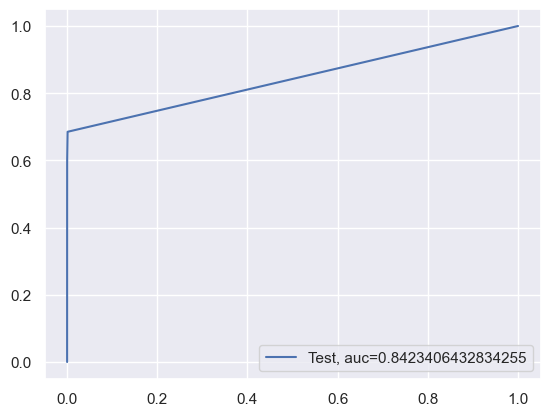

Time Taken by Model: --- 61.35120463371277 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9991397622934991
Confusion Matrix


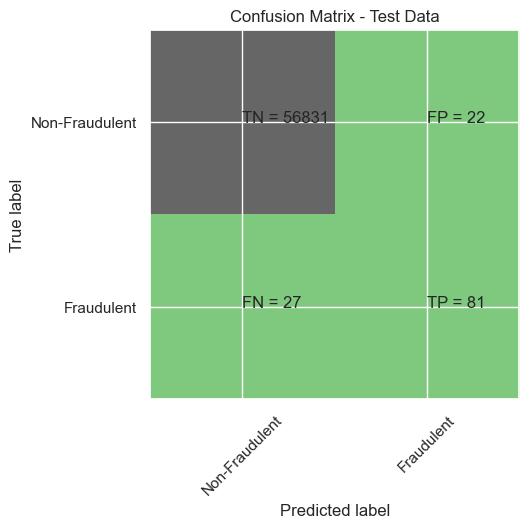

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.79      0.75      0.77       108

    accuracy                           1.00     56961
   macro avg       0.89      0.87      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8748065185654231
Tree threshold: 1.0
ROC for the test dataset 87.5%


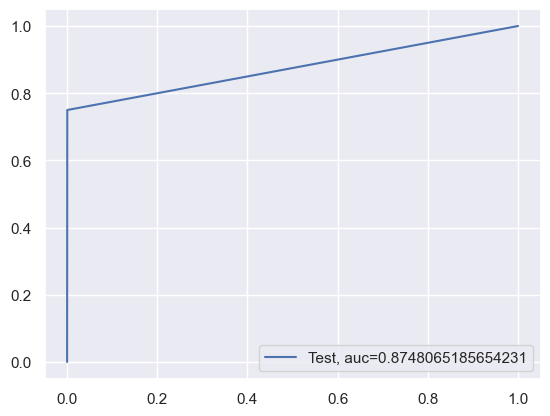

entropy score: 0.9992626533944278
Confusion Matrix


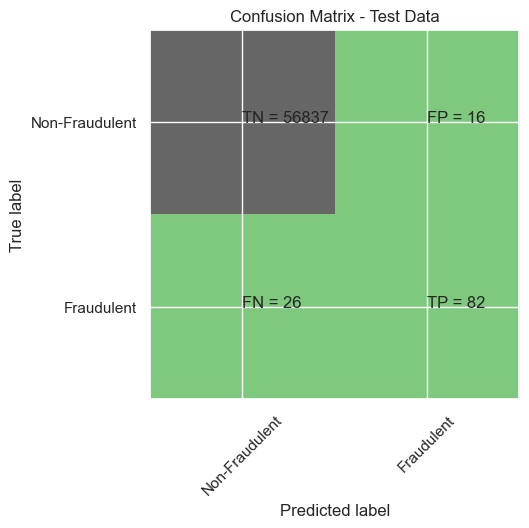

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.84      0.76      0.80       108

    accuracy                           1.00     56961
   macro avg       0.92      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8794889158590283
Tree threshold: 1.0
ROC for the test dataset 87.9%


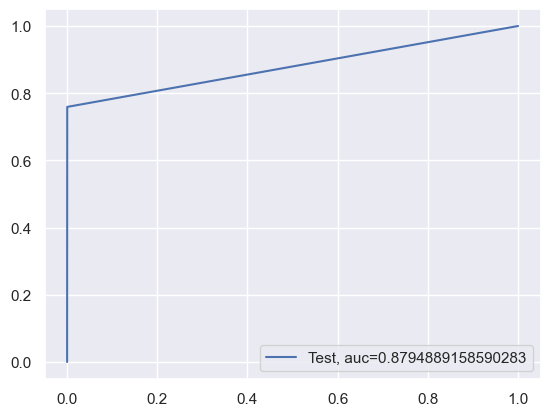

Time Taken by Model: --- 28.54582691192627 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


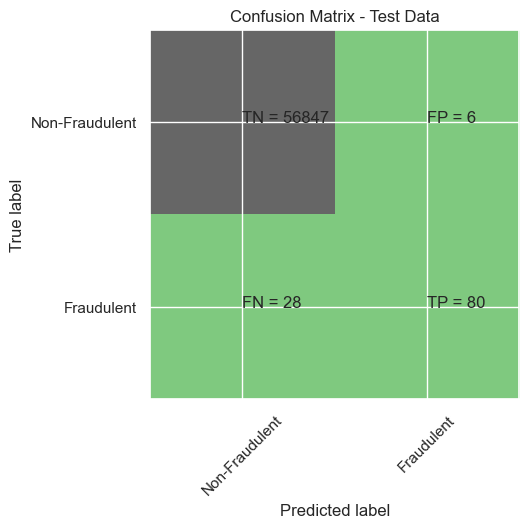

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.93      0.74      0.82       108

    accuracy                           1.00     56961
   macro avg       0.96      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9284113806170691
Random Forest threshold: 0.01
ROC for the test dataset 92.8%


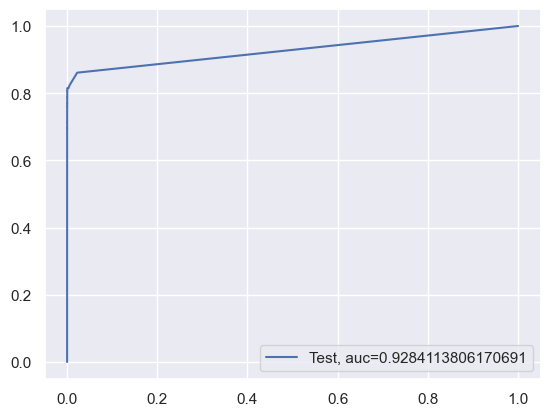

Time Taken by Model: --- 288.1162648200989 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.999420656238479
Confusion Matrix


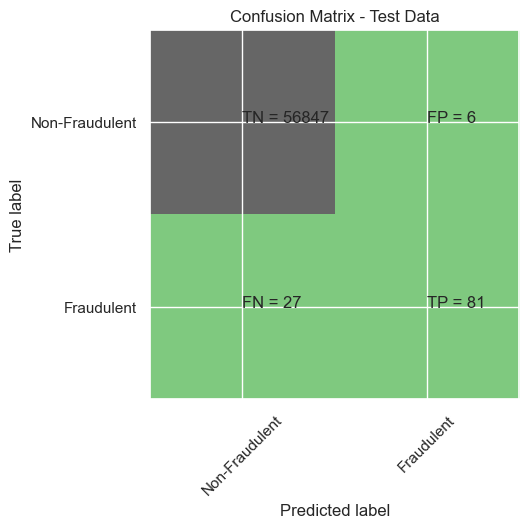

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.93      0.75      0.83       108

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9794421089867241
XGBoost threshold: 3.6321776860859245e-05
ROC for the test dataset 97.9%


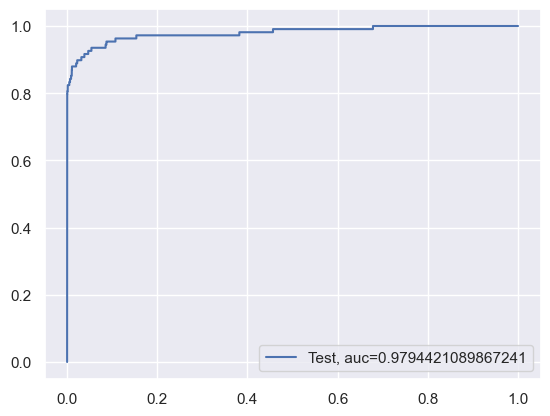

Time Taken by Model: --- 1.9328131675720215 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy score : 0.9980864099998245
Confusion Matrix


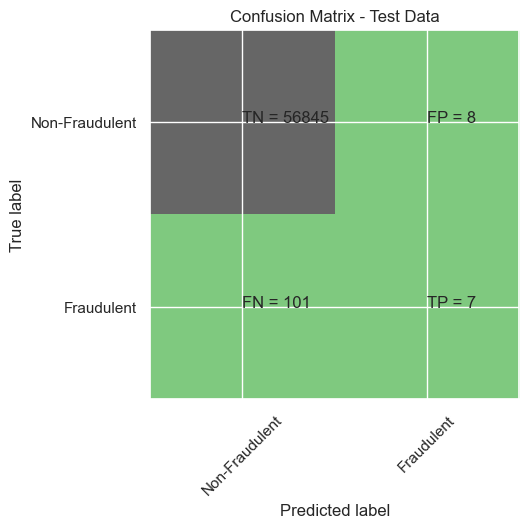

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.47      0.06      0.11       108

    accuracy                           1.00     56961
   macro avg       0.73      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.47329760767046397
SVM threshold: 0.004239032711252796
ROC for the test dataset 47.3%


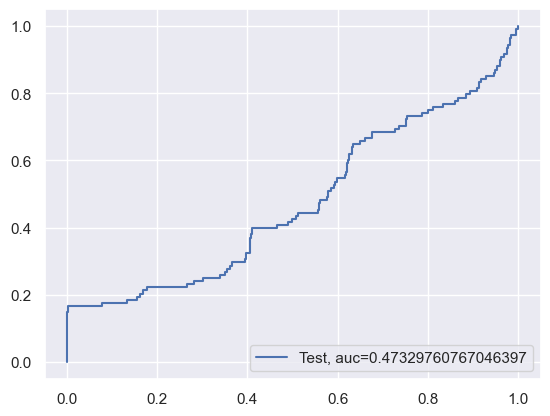

Time Taken by Model: --- 138.83953619003296 seconds ---


In [60]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [61]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN  Logistic Regression with L2 Regularisation   
6                       NaN  Logistic Regression with L1 Regularisation   
7                       NaN                                         KNN   
8                       NaN               Tree Model with gini criteria   
9                       NaN            Tree Model with entropy criteria   
10                      NaN                               Random Forest   
11                      NaN                                     XGBoost   
12                      NaN                                         SVM   
13                      NaN  Logistic Regression with L2 Regularisation   
14                      NaN  Logistic Regression with L1 Regularisation   
15                      NaN                                         KNN   
16                      NaN               Tree Model with gini criteria   
17                      NaN            Tree Model with entropy criteria   
18                      NaN                               Random Forest   
19                      NaN                                     XGBoost   
20                      NaN                                         SVM   
21                      NaN  Logistic Regression with L2 Regularisation   
22                      NaN  Logistic Regression with L1 Regularisation   
23                      NaN                                         KNN   
24                      NaN               Tree Model with gini criteria   
25                      NaN            Tree Model with entropy criteria   
26                      NaN                               Random Forest   
27                      NaN                                     XGBoost   
28                      NaN                                         SVM   

    Accuracy  roc_value  threshold         Data_Imbalance_Handling  
0   0.998315   0.500000        inf               Power Transformer  
1   0.998841   0.963903   0.009276               Power Transformer  
2   0.999298   0.900851   0.200000               Power Transformer  
3   0.998806   0.859015   1.000000               Power Transformer  
4   0.999052   0.864337   1.000000               Power Transformer  
5   0.998315   0.500000        inf               Power Transformer  
6   0.998841   0.963903   0.009276               Power Transformer  
7   0.999298   0.900851   0.200000               Power Transformer  
8   0.998806   0.859015   1.000000               Power Transformer  
9   0.999052   0.864337   1.000000               Power Transformer  
10  0.999350   0.940564   0.010000               Power Transformer  
11  0.999386   0.977586   0.000023               Power Transformer  
12  0.998560   0.891340   0.001118               Power Transformer  
13  0.998315   0.500000        inf               Power Transformer  
14  0.998841   0.963903   0.009276               Power Transformer  
15  0.999298   0.900851   0.200000               Power Transformer  
16  0.998806   0.859015   1.000000               Power Transformer  
17  0.999052   0.864337   1.000000               Power Transformer  
18  0.999350   0.940564   0.010000               Power Transformer  
19  0.999386   0.977586   0.000023               Power Transformer  
20  0.998560   0.891311   0.001177               Power Transformer  
21  0.998104   0.551974   0.499278  RepeatedKFold Cross Validation  
22  0.998824   0.877494   0.046261  RepeatedKFold Cross Validation  
23  0.999105   0.842341   0.200000  RepeatedKFold Cross Validation  
24  0.999140   0.874807   1

## It seems XGBOost with Repeated KFold cross validation has provided us wih best results with ROC_Value of 0.979442

In [62]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


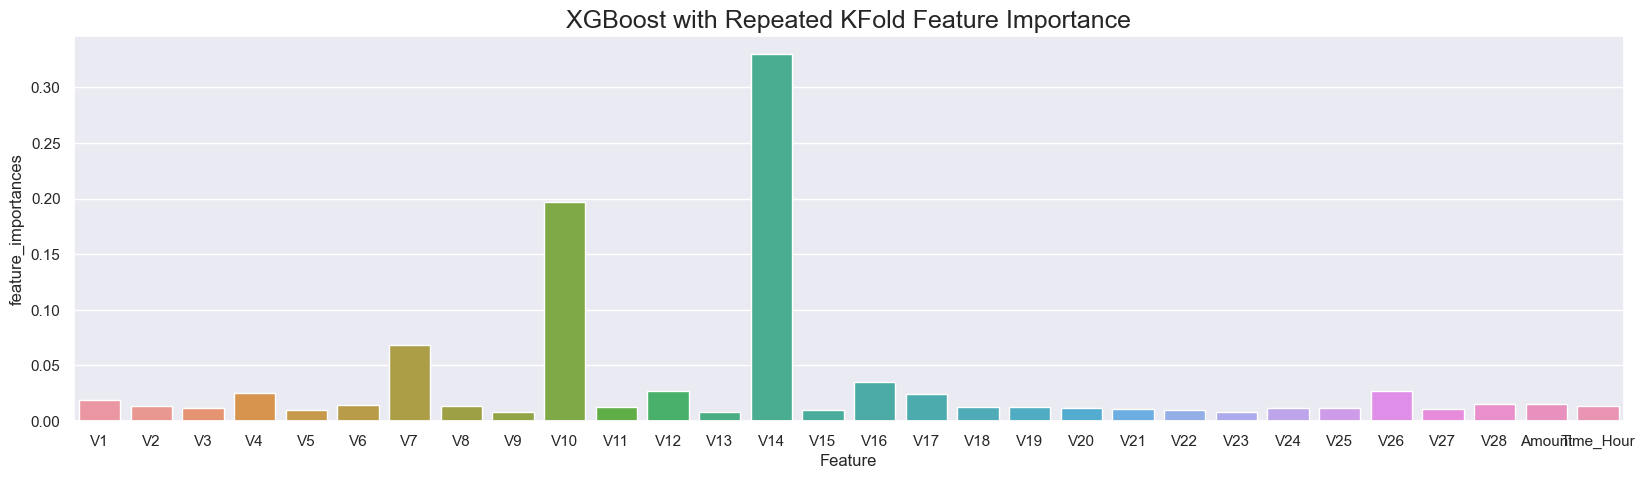

In [63]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

# Perform cross validation with StratifiedKFold

In [64]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5597020083683936
Max auc_roc for l1: 0.9652106893977332
Parameters for l2 regularisations
[[ 3.59840980e-07  2.10530060e-07 -1.58002317e-06 -2.04884044e-07
   3.76472678e-07 -2.67633109e-07  3.13241030e-08 -1.20226136e-08
  -8.98863463e-08 -1.54002314e-07 -4.65334035e-07  1.57441535e-07
  -1.27094538e-07 -4.38050832e-07 -3.73274685e-07 -8.23337714e-08
  -3.16607926e-07  1.01807717e-07  7.54814354e-08 -6.47175864e-08
   7.04219521e-08  1.73013268e-07  7.32726162e-08 -1.03599764e-08
  -2.85545640e-07 -2.03747293e-08  3.38203553e-09 -1.32510707e-08
  -6.82254904e-04 -9.57433590e-05]]
[-7.52178855e-06]
{1: array([[0.48266925, 0.48178322, 0.47951852, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818,
        0.47631818, 0.47631818, 0.47631818, 0.47631818, 0.47631818],
       [0.55602862, 0.55598183, 0.55533056, 0

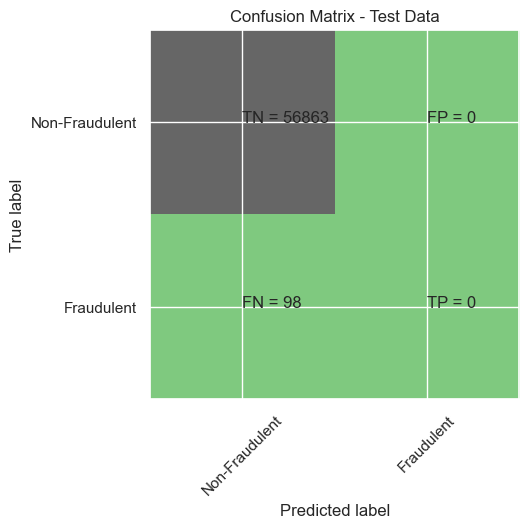

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9987535331191517
Confusion Matrix


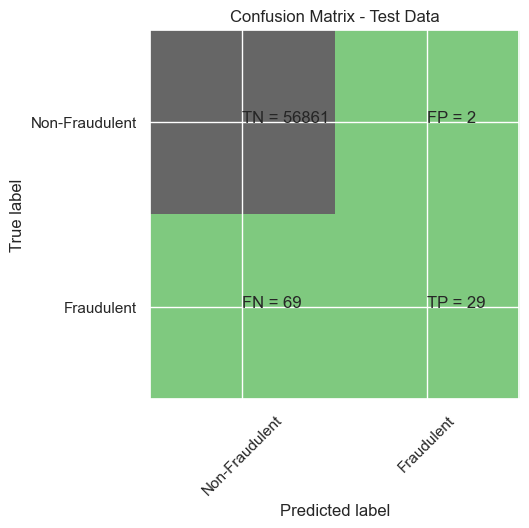

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.6111619154810686
l2 threshold: 0.4993921957728673
ROC for the test dataset 61.1%


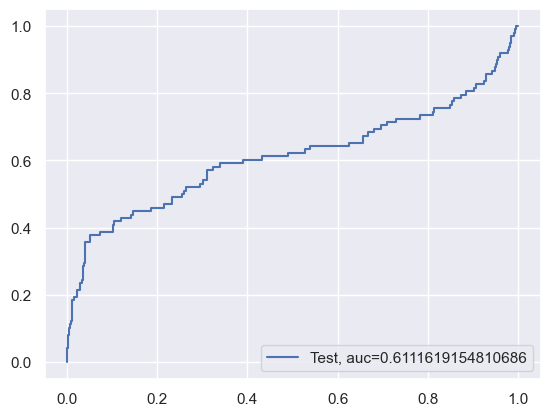

l1 roc_value: 0.8890758561483437
l1 threshold: 0.021087492766199856
ROC for the test dataset 88.9%


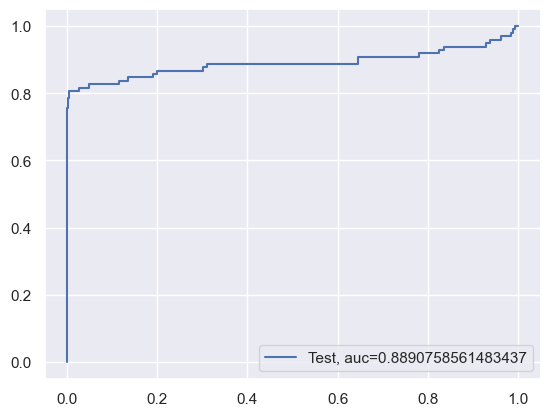

Time Taken by Model: --- 71.69259858131409 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9991924299081828
Confusion Matrix


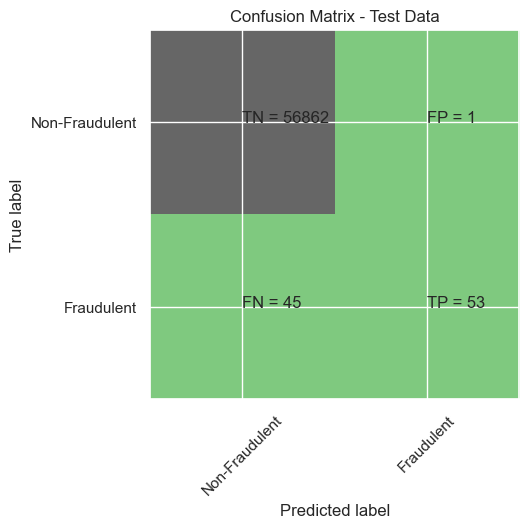

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


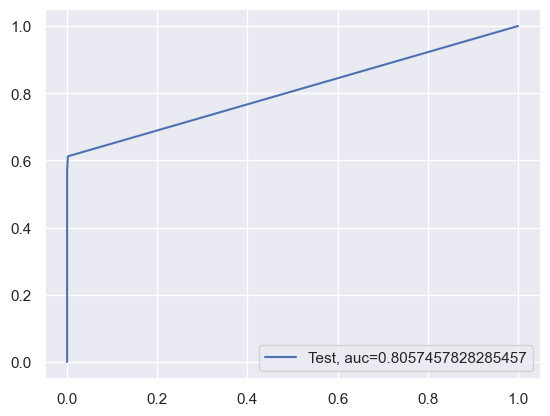

Time Taken by Model: --- 61.1300687789917 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
Confusion Matrix


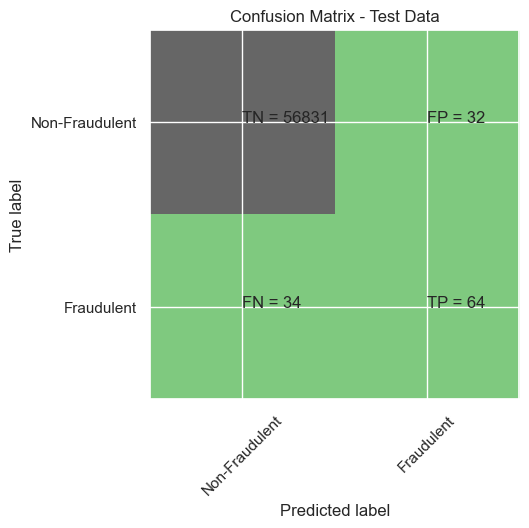

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


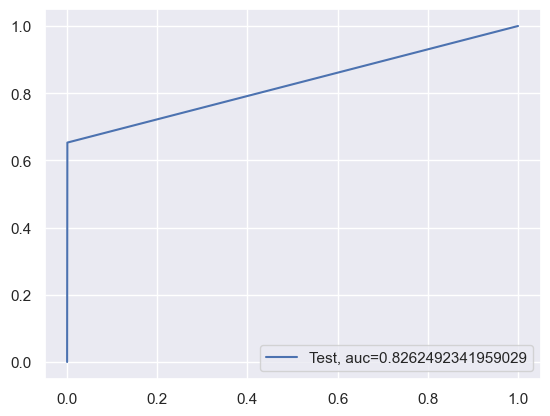

entropy score: 0.9990168711925703
Confusion Matrix


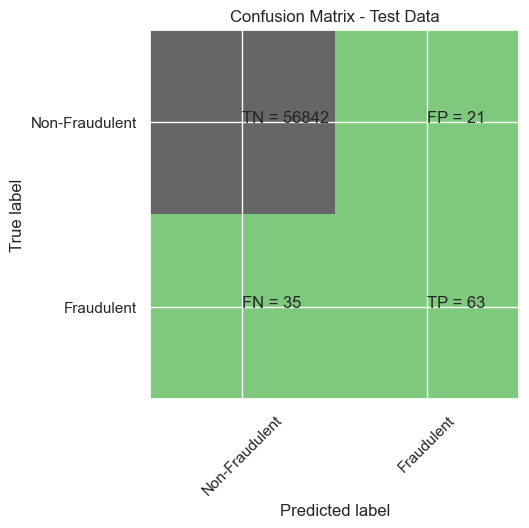

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


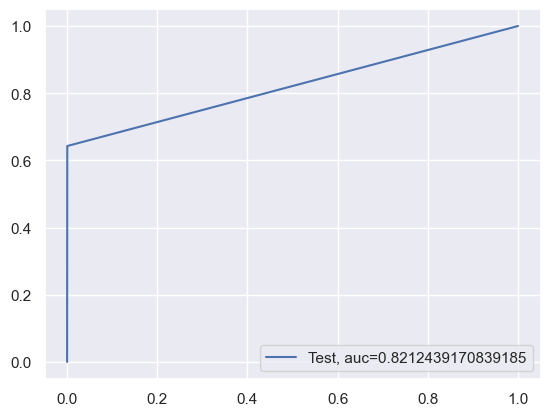

Time Taken by Model: --- 33.02781319618225 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


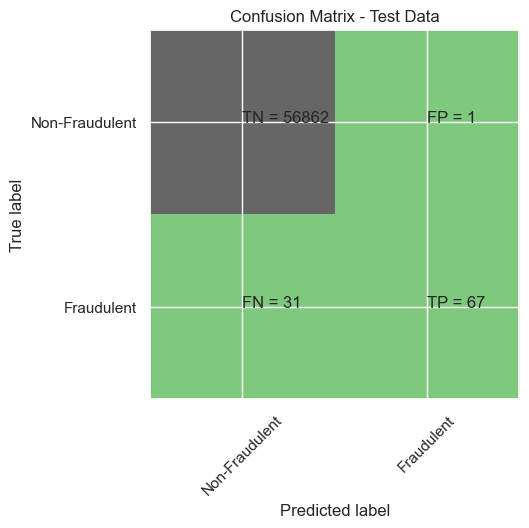

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


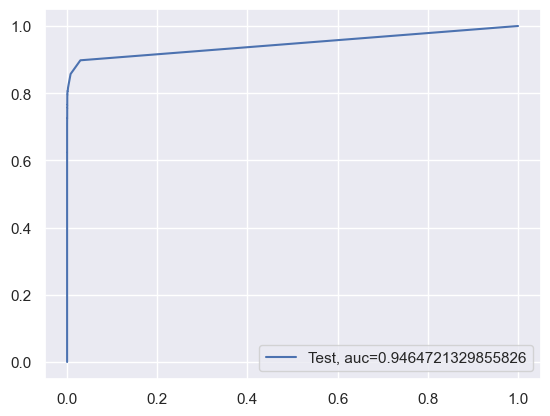

Time Taken by Model: --- 201.66324496269226 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


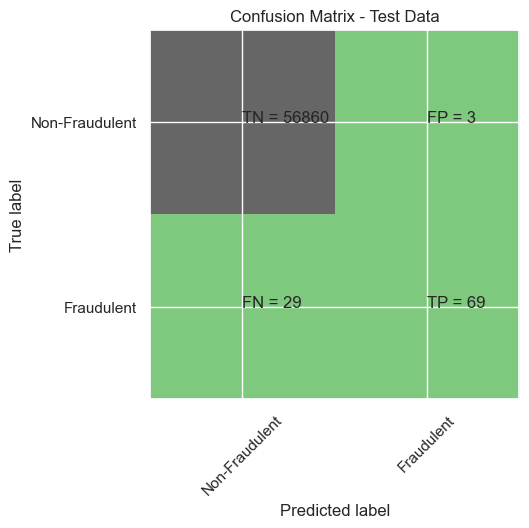

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


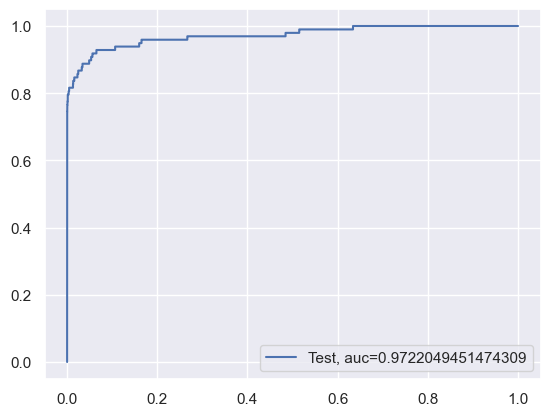

Time Taken by Model: --- 1.9732234477996826 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy score : 0.9982795245869981
Confusion Matrix


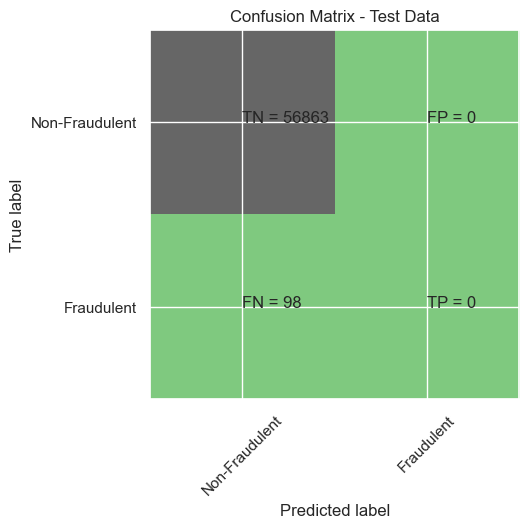

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40177034885494567
SVM threshold: 0.0043233317642962475
ROC for the test dataset 40.2%


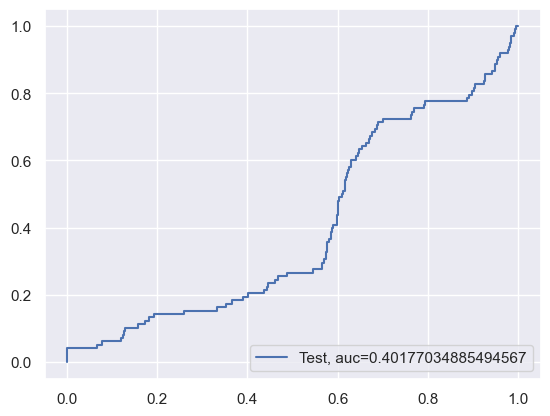

Time Taken by Model: --- 135.6496901512146 seconds ---


In [65]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [66]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN  Logistic Regression with L2 Regularisation   
6                       NaN  Logistic Regression with L1 Regularisation   
7                       NaN                                         KNN   
8                       NaN               Tree Model with gini criteria   
9                       NaN            Tree Model with entropy criteria   
10                      NaN                               Random Forest   
11                      NaN                                     XGBoost   
12                      NaN                                         SVM   
13                      NaN  Logistic Regression with L2 Regularisation   
14                      NaN  Logistic Regression with L1 Regularisation   
15                      NaN                                         KNN   
16                      NaN               Tree Model with gini criteria   
17                      NaN            Tree Model with entropy criteria   
18                      NaN                               Random Forest   
19                      NaN                                     XGBoost   
20                      NaN                                         SVM   
21                      NaN  Logistic Regression with L2 Regularisation   
22                      NaN  Logistic Regression with L1 Regularisation   
23                      NaN                                         KNN   
24                      NaN               Tree Model with gini criteria   
25                      NaN            Tree Model with entropy criteria   
26                      NaN                               Random Forest   
27                      NaN                                     XGBoost   
28                      NaN                                         SVM   
29                      NaN  Logistic Regression with L2 Regularisation   
30                      NaN  Logistic Regression with L1 Regularisation   
31                      NaN                                         KNN   
32                      NaN               Tree Model with gini criteria   
33                      NaN            Tree Model with entropy criteria   
34                      NaN                               Random Forest   
35                      NaN                                     XGBoost   
36                      NaN                                         SVM   

    Accuracy  roc_value  threshold           Data_Imbalance_Handling  
0   0.998315   0.500000        inf                 Power Transformer  
1   0.998841   0.963903   0.009276                 Power Transformer  
2   0.999298   0.900851   0.200000                 Power Transformer  
3   0.998806   0.859015   1.000000                 Power Transformer  
4   0.999052   0.864337   1.000000                 Power Transformer  
5   0.998315   0.500000        inf                 Power Transformer  
6   0.998841   0.963903   0.009276                 Power Transformer  
7   0.999298   0.900851   0.200000                 Power Transformer  
8   0.998806   0.859015   1.000000                 Power Transformer  
9   0.999052   0.864337   1.000000                 Power Transformer  
10  0.999350   0.940564   0.010000                 Power Transformer  
11  0.999386   0.977586   0.000023                 Power Transformer  
12  0.998560   0.891340   0.001118                 Power Transformer  
13  0.998315   0.500000        inf                 Power Transformer  
14  0.998841   0.963903   0.009276                 Power Transformer  
15  0.999298   0

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [67]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.5584887728914751
Parameters for l2 regularisations
[[-1.29662947e-07  1.26071386e-07 -2.12587293e-07  1.35971299e-07
  -8.07897562e-08 -3.70679101e-08 -1.51986313e-07  1.80344353e-08
  -5.83081382e-08 -1.47617741e-07  1.06204874e-07 -1.56442005e-07
  -3.91596568e-09 -1.89123035e-07 -3.71365329e-10 -1.14504233e-07
  -1.70320303e-07 -6.26041863e-08  2.33948624e-08  7.95499273e-09
   3.01771913e-08  3.94716503e-09 -1.94074830e-10 -4.89780428e-09
   4.86784437e-09  4.49203887e-09  5.95832652e-09  4.60363515e-09
  -6.62950400e-04 -1.05203313e-04]]
[-7.48138539e-06]
{1: array([[0.56021144, 0.55928832, 0.55737737, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433,
        0.55381433, 0.55381433, 0.55381433, 0.55381433, 0.55381433],
       [0.55864254, 0.5575424 , 0.55522446, 0.5518581 , 0.5518581 ,
        0.5518581 , 0.5518581 , 0.5518581 , 0.5518581 , 0.5518581 

In [68]:
searchCV_l2.coef_

array([[-1.29662947e-07,  1.26071386e-07, -2.12587293e-07,
         1.35971299e-07, -8.07897562e-08, -3.70679101e-08,
        -1.51986313e-07,  1.80344353e-08, -5.83081382e-08,
        -1.47617741e-07,  1.06204874e-07, -1.56442005e-07,
        -3.91596568e-09, -1.89123035e-07, -3.71365329e-10,
        -1.14504233e-07, -1.70320303e-07, -6.26041863e-08,
         2.33948624e-08,  7.95499273e-09,  3.01771913e-08,
         3.94716503e-09, -1.94074830e-10, -4.89780428e-09,
         4.86784437e-09,  4.49203887e-09,  5.95832652e-09,
         4.60363515e-09, -6.62950400e-04, -1.05203313e-04]])

In [69]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [70]:
coefficients

Feature  Importance Coefficient
0          V1           -1.296629e-07
1          V2            1.260714e-07
2          V3           -2.125873e-07
3          V4            1.359713e-07
4          V5           -8.078976e-08
5          V6           -3.706791e-08
6          V7           -1.519863e-07
7          V8            1.803444e-08
8          V9           -5.830814e-08
9         V10           -1.476177e-07
10        V11            1.062049e-07
11        V12           -1.564420e-07
12        V13           -3.915966e-09
13        V14           -1.891230e-07
14        V15           -3.713653e-10
15        V16           -1.145042e-07
16        V17           -1.703203e-07
17        V18           -6.260419e-08
18        V19            2.339486e-08
19        V20            7.954993e-09
20        V21            3.017719e-08
21        V22            3.947165e-09
22        V23           -1.940748e-10
23        V24           -4.897804e-09
24        V25            4.867844e-09
25        V26            4.492039e-09
26        V27            5.958327e-09
27        V28            4.603635e-09
28     Amount           -6.629504e-04
29  Time_Hour           -1.052033e-04

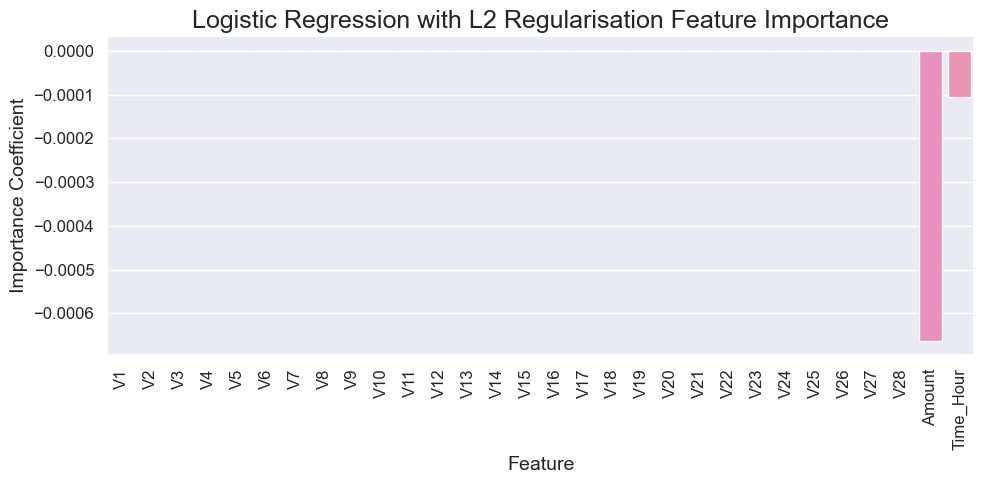

In [73]:

# Example structure of coefficients DataFrame
# coefficients = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance Coefficient': coef_values
# })

# Plotting feature importance for Logistic Regression with L2 Regularisation
plt.figure(figsize=(10, 5))  # Adjusted figure size for better visibility
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Coefficient', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit everything neatly

plt.show()


##### As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [76]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.6037490195944142
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-1.17906581e-04  9.07496977e-05 -1.74107453e-04  1.10448141e-04
  -8.44245013e-05 -3.11781037e-05 -1.37167440e-04  1.43272489e-05
  -6.62267171e-05 -1.42144705e-04  9.24224716e-05 -1.50418144e-04
  -9.24606302e-07 -1.71896644e-04 -2.42031083e-06 -1.03463464e-04
  -1.71672543e-04 -5.84988920e-05  1.89567453e-05  7.48919284e-06
   1.75997169e-05  2.08568093e-07 -6.47184386e-07 -3.47226256e-06
   1.46759861e-06  1.97982918e-06  5.56396749e-06  1.27296661e-06
  -4.94029856e-04 -3.32132570e-04]]
[-2.20915933e-05]
{1: array([[0.5875    , 0.5875    , 0.5875    , 0.59166667, 0.59166667,
        0.59166667, 0.59166667, 0.59166667, 0.59166667, 0.59166667,
        0.59166667, 0.59166667, 0.59166667, 0.59166667, 0.59166667,
        0.59166667, 0.59166667, 0.59166667, 0.59166667, 0.59166667],
       [0.69883041, 0.69883041, 0.69883041, 0.70435348, 0.70

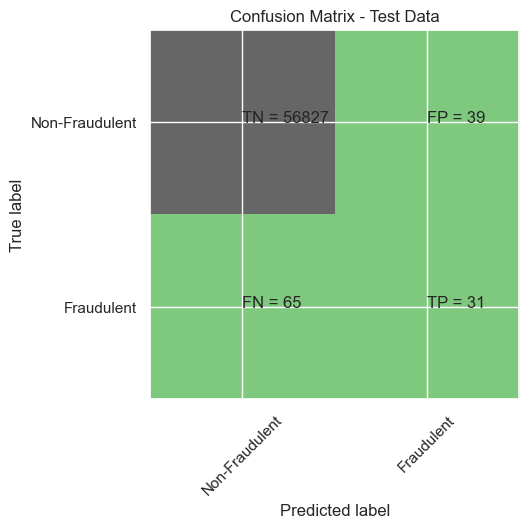

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.44      0.32      0.37        96

    accuracy                           1.00     56962
   macro avg       0.72      0.66      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


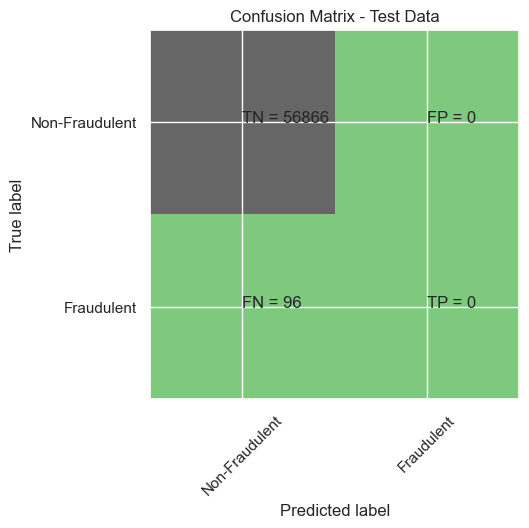

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.6534667756949085
l2 threshold: 0.4992428574937201
ROC for the test dataset 65.3%


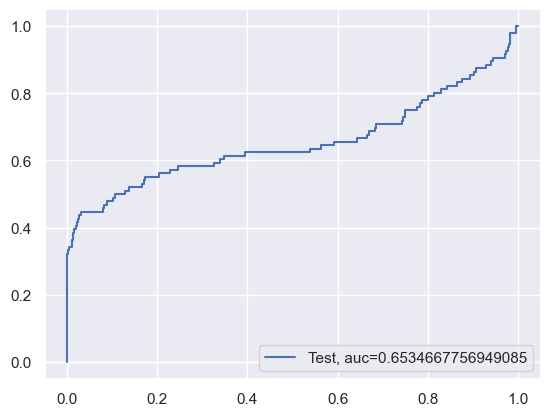

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


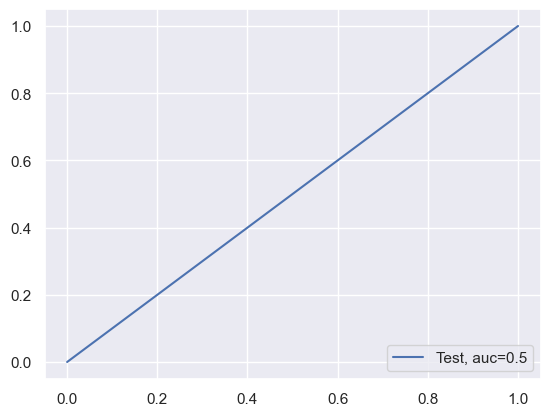

Time Taken by Model: --- 1.2069091796875 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9781433236192549
Confusion Matrix


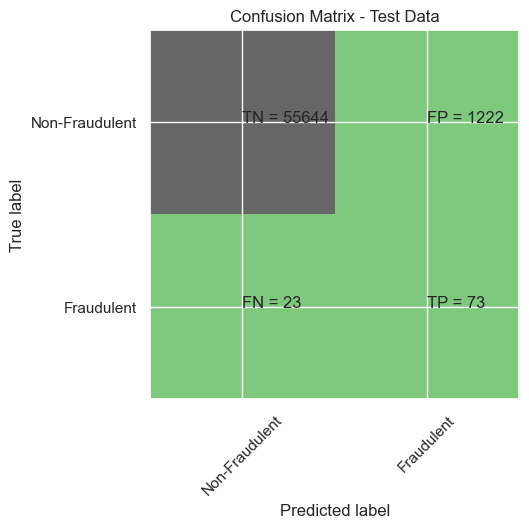

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.76      0.10        96

    accuracy                           0.98     56962
   macro avg       0.53      0.87      0.55     56962
weighted avg       1.00      0.98      0.99     56962

KNN roc_value: 0.9421687790888522
KNN threshold: 0.4
ROC for the test dataset 94.2%


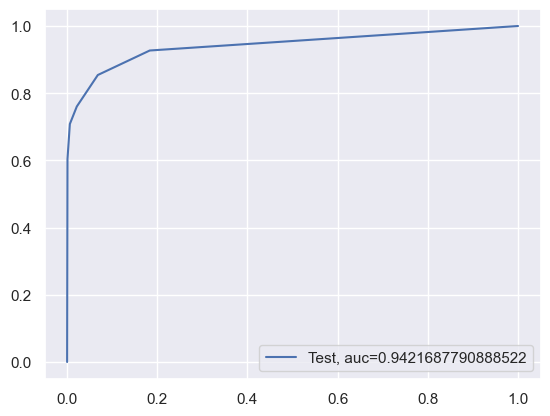

Time Taken by Model: --- 3.5010910034179688 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9448755310557916
Confusion Matrix


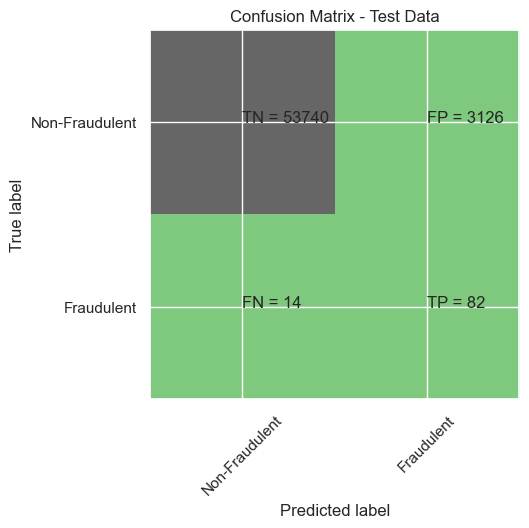

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.85      0.05        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value: 0.899597665271574
Tree threshold: 1.0
ROC for the test dataset 90.0%


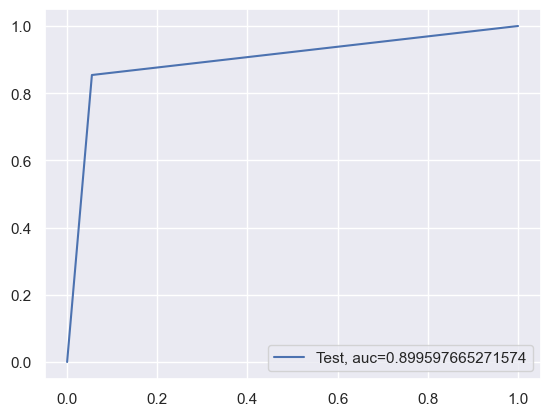

entropy score: 0.9374670833187037
Confusion Matrix


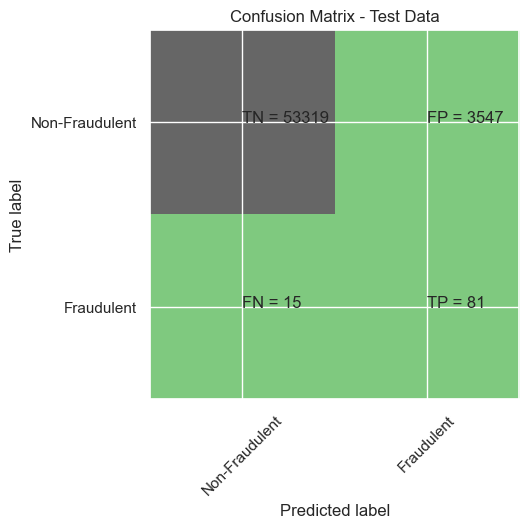

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.84      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value: 0.8906876472760525
Tree threshold: 1.0
ROC for the test dataset 89.1%


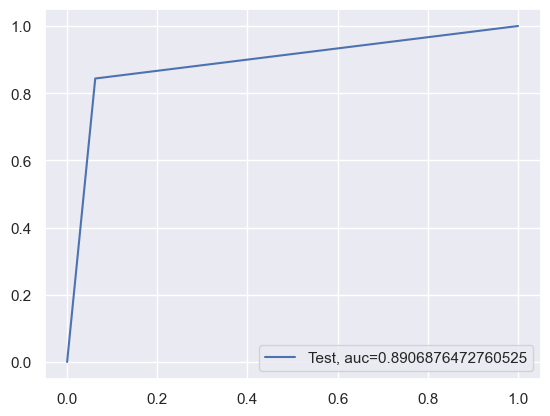

Time Taken by Model: --- 0.882941484451294 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.98878199501422
Confusion Matrix


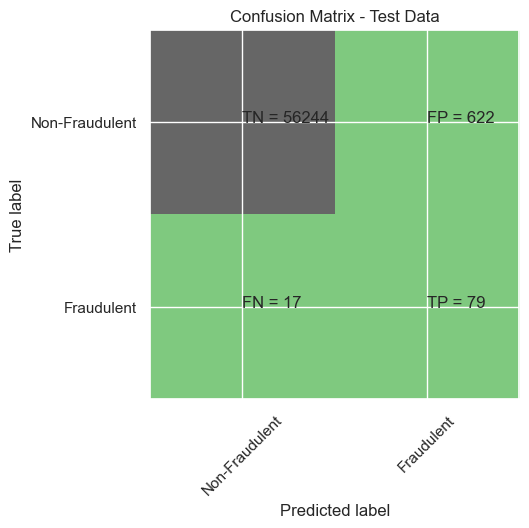

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.20        96

    accuracy                           0.99     56962
   macro avg       0.56      0.91      0.60     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value: 0.9762042931335654
Random Forest threshold: 0.24
ROC for the test dataset 97.6%


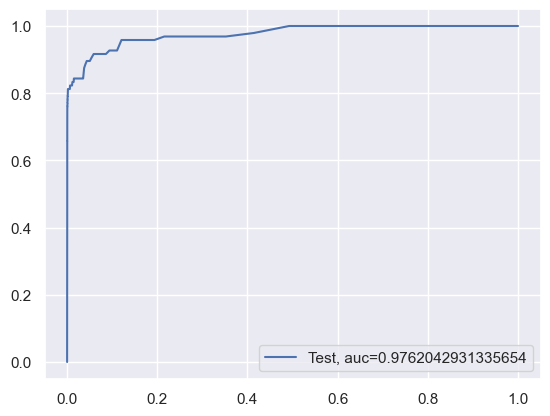

Time Taken by Model: --- 1.3096873760223389 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9834275481900214
Confusion Matrix


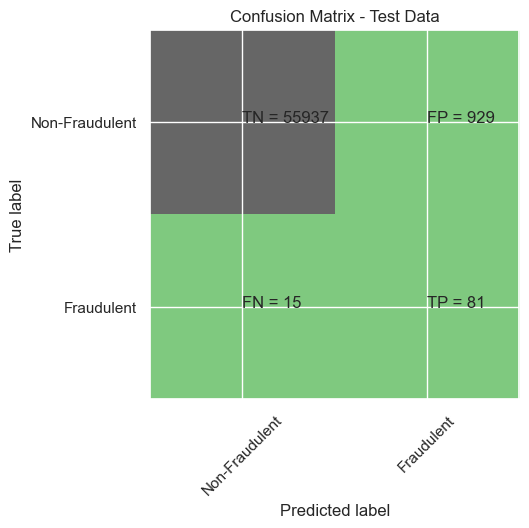

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.08      0.84      0.15        96

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962

XGBoost roc_value: 0.9760154354095594
XGBoost threshold: 0.10317429900169373
ROC for the test dataset 97.6%


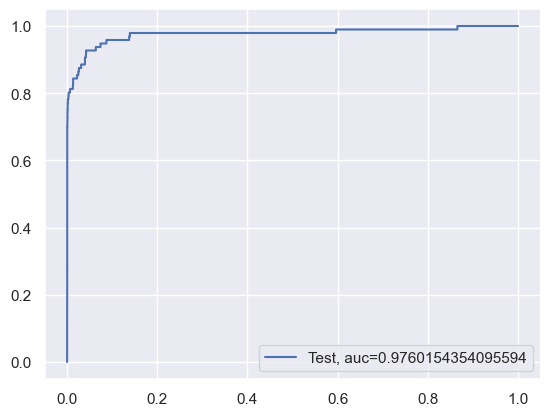

Time Taken by Model: --- 0.6047539710998535 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy score : 0.7816263473894878
Confusion Matrix


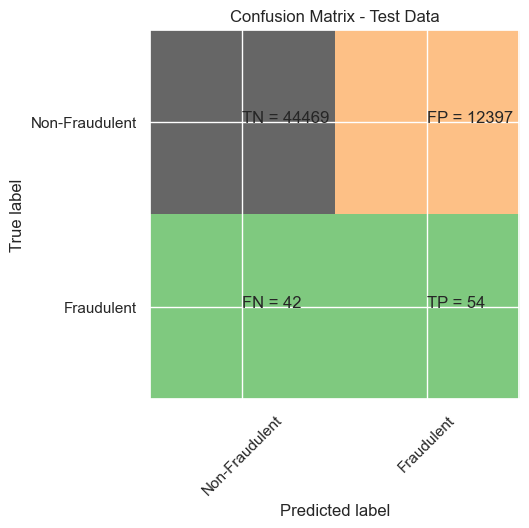

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     56866
           1       0.00      0.56      0.01        96

    accuracy                           0.78     56962
   macro avg       0.50      0.67      0.44     56962
weighted avg       1.00      0.78      0.88     56962

SVM roc_value: 0.6843491351012322
SVM threshold: 0.3471334476566529
ROC for the test dataset 68.4%


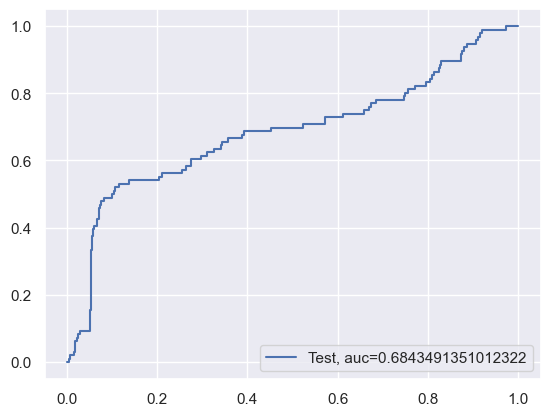

Time Taken by Model: --- 2.929858922958374 seconds ---


In [77]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [78]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN  Logistic Regression with L2 Regularisation   
6                       NaN  Logistic Regression with L1 Regularisation   
7                       NaN                                         KNN   
8                       NaN               Tree Model with gini criteria   
9                       NaN            Tree Model with entropy criteria   
10                      NaN                               Random Forest   
11                      NaN                                     XGBoost   
12                      NaN                                         SVM   
13                      NaN  Logistic Regression with L2 Regularisation   
14                      NaN  Logistic Regression with L1 Regularisation   
15                      NaN                                         KNN   
16                      NaN               Tree Model with gini criteria   
17                      NaN            Tree Model with entropy criteria   
18                      NaN                               Random Forest   
19                      NaN                                     XGBoost   
20                      NaN                                         SVM   
21                      NaN  Logistic Regression with L2 Regularisation   
22                      NaN  Logistic Regression with L1 Regularisation   
23                      NaN                                         KNN   
24                      NaN               Tree Model with gini criteria   
25                      NaN            Tree Model with entropy criteria   
26                      NaN                               Random Forest   
27                      NaN                                     XGBoost   
28                      NaN                                         SVM   
29                      NaN  Logistic Regression with L2 Regularisation   
30                      NaN  Logistic Regression with L1 Regularisation   
31                      NaN                                         KNN   
32                      NaN               Tree Model with gini criteria   
33                      NaN            Tree Model with entropy criteria   
34                      NaN                               Random Forest   
35                      NaN                                     XGBoost   
36                      NaN                                         SVM   
37                      NaN  Logistic Regression with L2 Regularisation   
38                      NaN  Logistic Regression with L1 Regularisation   
39                      NaN                                         KNN   
40                      NaN               Tree Model with gini criteria   
41                      NaN            Tree Model with entropy criteria   
42                      NaN                               Random Forest   
43                      NaN                                     XGBoost   
44                      NaN                                         SVM   

    Accuracy  roc_value  threshold           Data_Imbalance_Handling  
0   0.998315   0.500000        inf                 Power Transformer  
1   0.998841   0.963903   0.009276                 Power Transformer  
2   0.999298   0.900851   0.200000                 Power Transformer  
3   0.998806   0.859015   1.000000                 Power Transformer  
4   0.999052   0.864337   1.000000                 Power Transformer  
5   0.998315   0.500000        inf                 Power Transformer  
6   0.998841   0.963903   0.009276                 Powe

**It seems Undersampling has impoved the XGBoost Results**

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

# Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the Random Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [80]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [82]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming X and y are already defined DataFrames or Series
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)
  
    # Create Dataframe for X_over
    X_over = pd.DataFrame(data=X_over, columns=X.columns)  # Use X.columns to keep the original column names

    # You can proceed with your modeling process here
    # Example:
    # model = SomeModel()
    # model.fit(X_over, y_over)
    # y_pred = model.predict(X_test)
    # Evaluate your model

    # Print the fold number for reference
    print(f"Fold {fold} completed.")


Fold 1 completed.
Fold 2 completed.
Fold 3 completed.
Fold 4 completed.
Fold 5 completed.


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

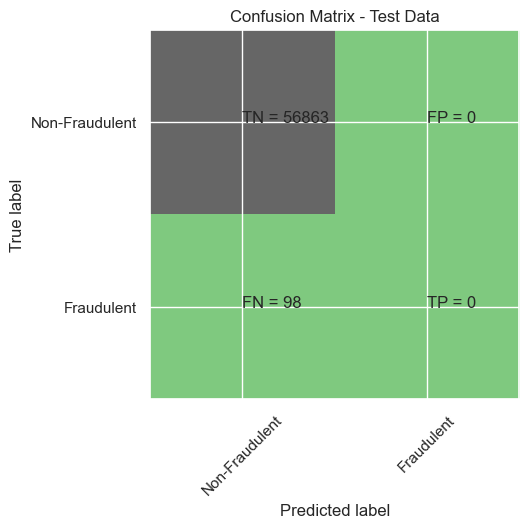

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


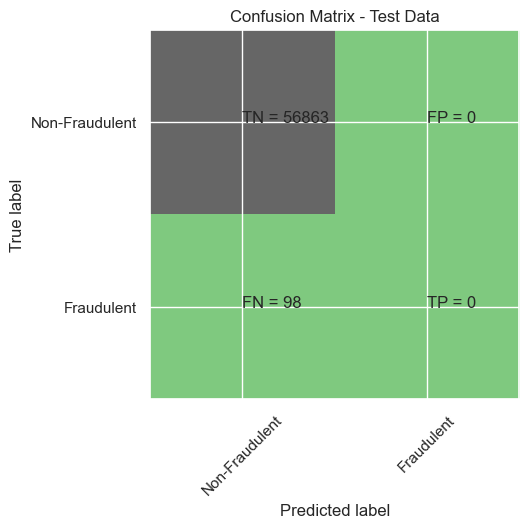

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


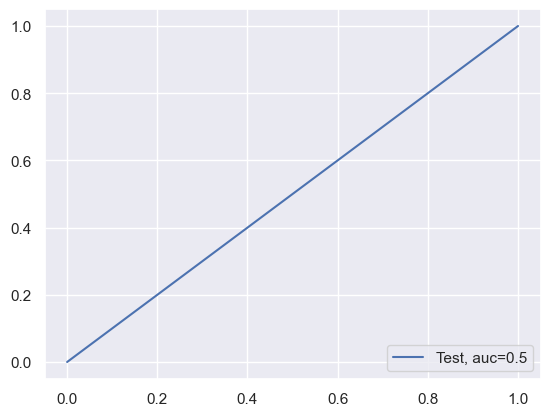

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


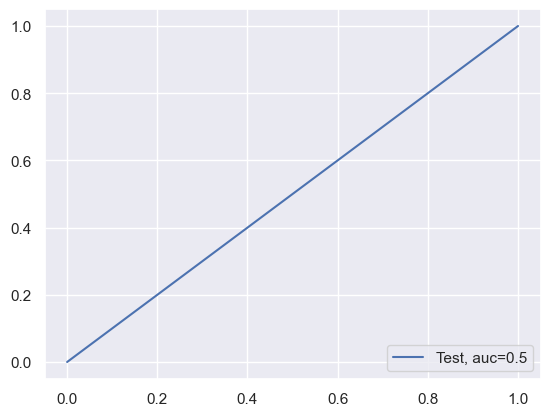

Time Taken by Model: --- 64.14376330375671 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9980688541282632
Confusion Matrix


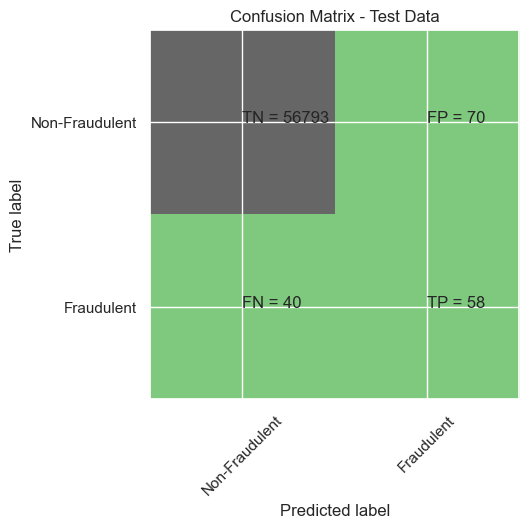

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


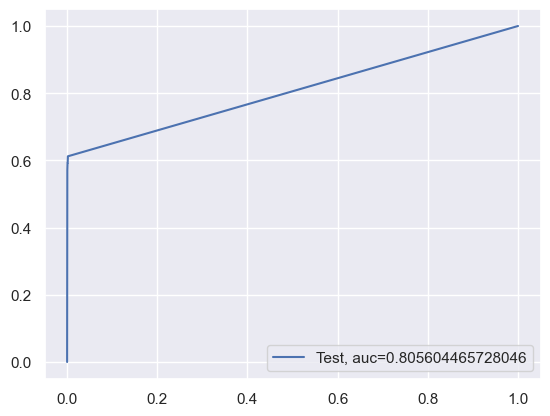

Time Taken by Model: --- 91.57625794410706 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9986833096329067
Confusion Matrix


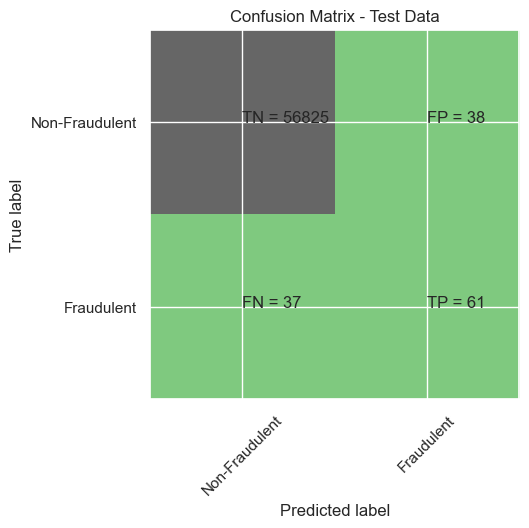

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.62      0.62      0.62        98

    accuracy                           1.00     56961
   macro avg       0.81      0.81      0.81     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8108903533627368
Tree threshold: 1.0
ROC for the test dataset 81.1%


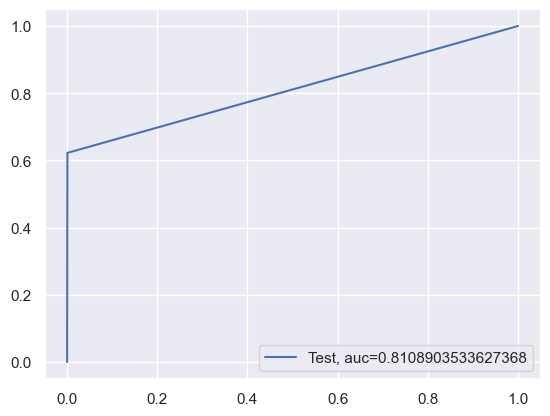

entropy score: 0.9992099857797441
Confusion Matrix


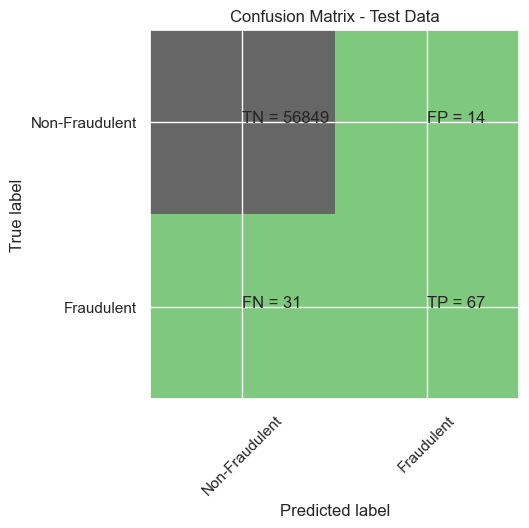

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.83      0.68      0.75        98

    accuracy                           1.00     56961
   macro avg       0.91      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8417136317974423
Tree threshold: 1.0
ROC for the test dataset 84.2%


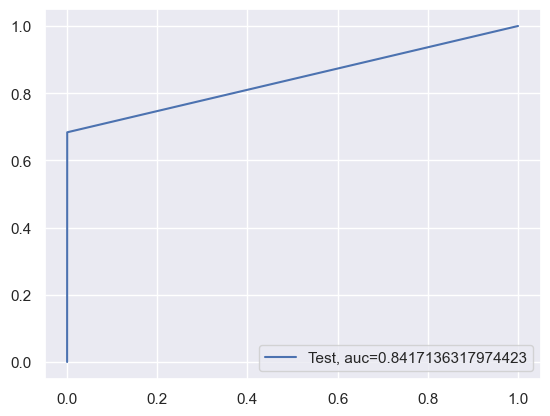

Time Taken by Model: --- 22.132002592086792 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


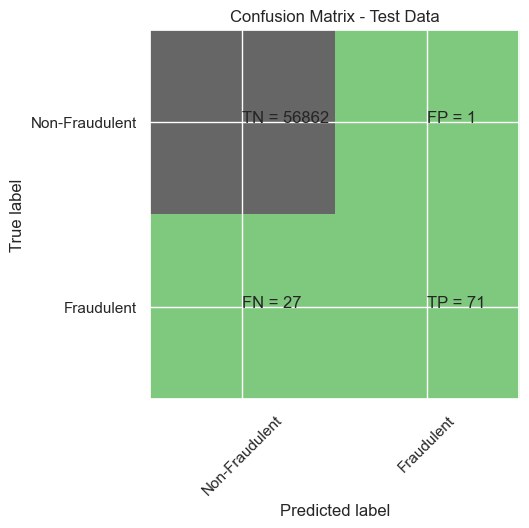

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9351190311694378
Random Forest threshold: 0.02
ROC for the test dataset 93.5%


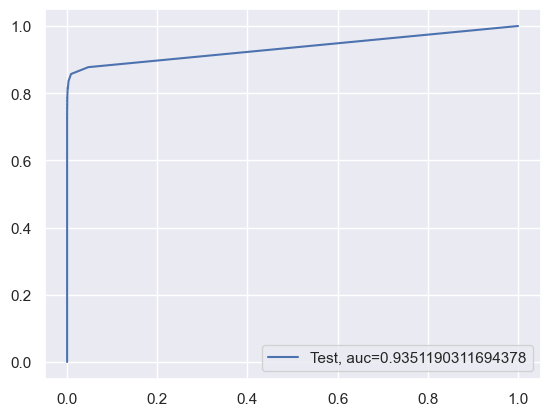

Time Taken by Model: --- 156.6021330356598 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


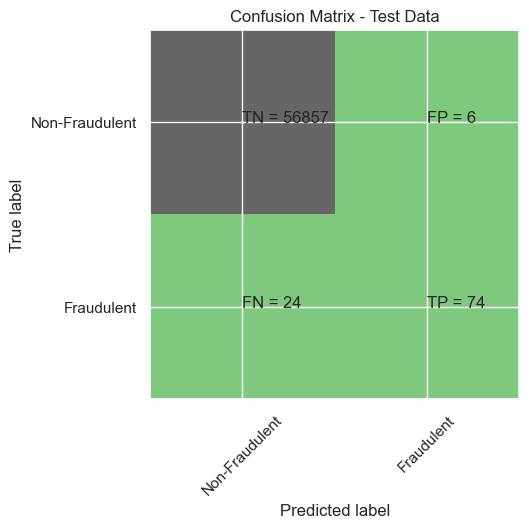

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9748484273156355
XGBoost threshold: 6.318236410152167e-05
ROC for the test dataset 97.5%


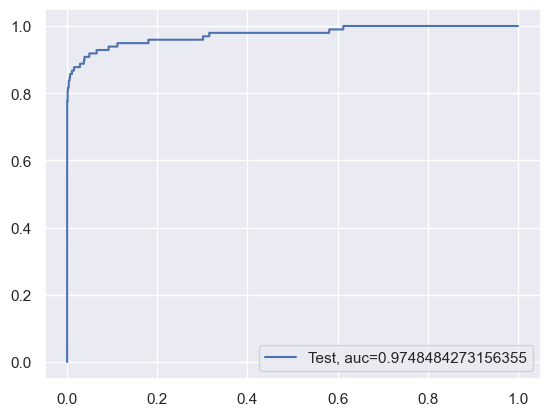

Time Taken by Model: --- 2.691000461578369 seconds ---
--------------------------------------------------------------------------------


In [83]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [84]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN  Logistic Regression with L2 Regularisation   
6                       NaN  Logistic Regression with L1 Regularisation   
7                       NaN                                         KNN   
8                       NaN               Tree Model with gini criteria   
9                       NaN            Tree Model with entropy criteria   
10                      NaN                               Random Forest   
11                      NaN                                     XGBoost   
12                      NaN                                         SVM   
13                      NaN  Logistic Regression with L2 Regularisation   
14                      NaN  Logistic Regression with L1 Regularisation   
15                      NaN                                         KNN   
16                      NaN               Tree Model with gini criteria   
17                      NaN            Tree Model with entropy criteria   
18                      NaN                               Random Forest   
19                      NaN                                     XGBoost   
20                      NaN                                         SVM   
21                      NaN  Logistic Regression with L2 Regularisation   
22                      NaN  Logistic Regression with L1 Regularisation   
23                      NaN                                         KNN   
24                      NaN               Tree Model with gini criteria   
25                      NaN            Tree Model with entropy criteria   
26                      NaN                               Random Forest   
27                      NaN                                     XGBoost   
28                      NaN                                         SVM   
29                      NaN  Logistic Regression with L2 Regularisation   
30                      NaN  Logistic Regression with L1 Regularisation   
31                      NaN                                         KNN   
32                      NaN               Tree Model with gini criteria   
33                      NaN            Tree Model with entropy criteria   
34                      NaN                               Random Forest   
35                      NaN                                     XGBoost   
36                      NaN                                         SVM   
37                      NaN  Logistic Regression with L2 Regularisation   
38                      NaN  Logistic Regression with L1 Regularisation   
39                      NaN                                         KNN   
40                      NaN               Tree Model with gini criteria   
41                      NaN            Tree Model with entropy criteria   
42                      NaN                               Random Forest   
43                      NaN                                     XGBoost   
44                      NaN                                         SVM   
45                      NaN  Logistic Regression with L2 Regularisation   
46                      NaN  Logistic Regression with L1 Regularisation   
47                      NaN                                         KNN   
48                      NaN               Tree Model with gini criteria   
49                      NaN            Tree Model with entropy criteria   
50                      NaN                               Random Forest   
51                      NaN                                     XGBoost   

    Accuracy  roc_value  th

## Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

### Print the class distribution after applying SMOTE 

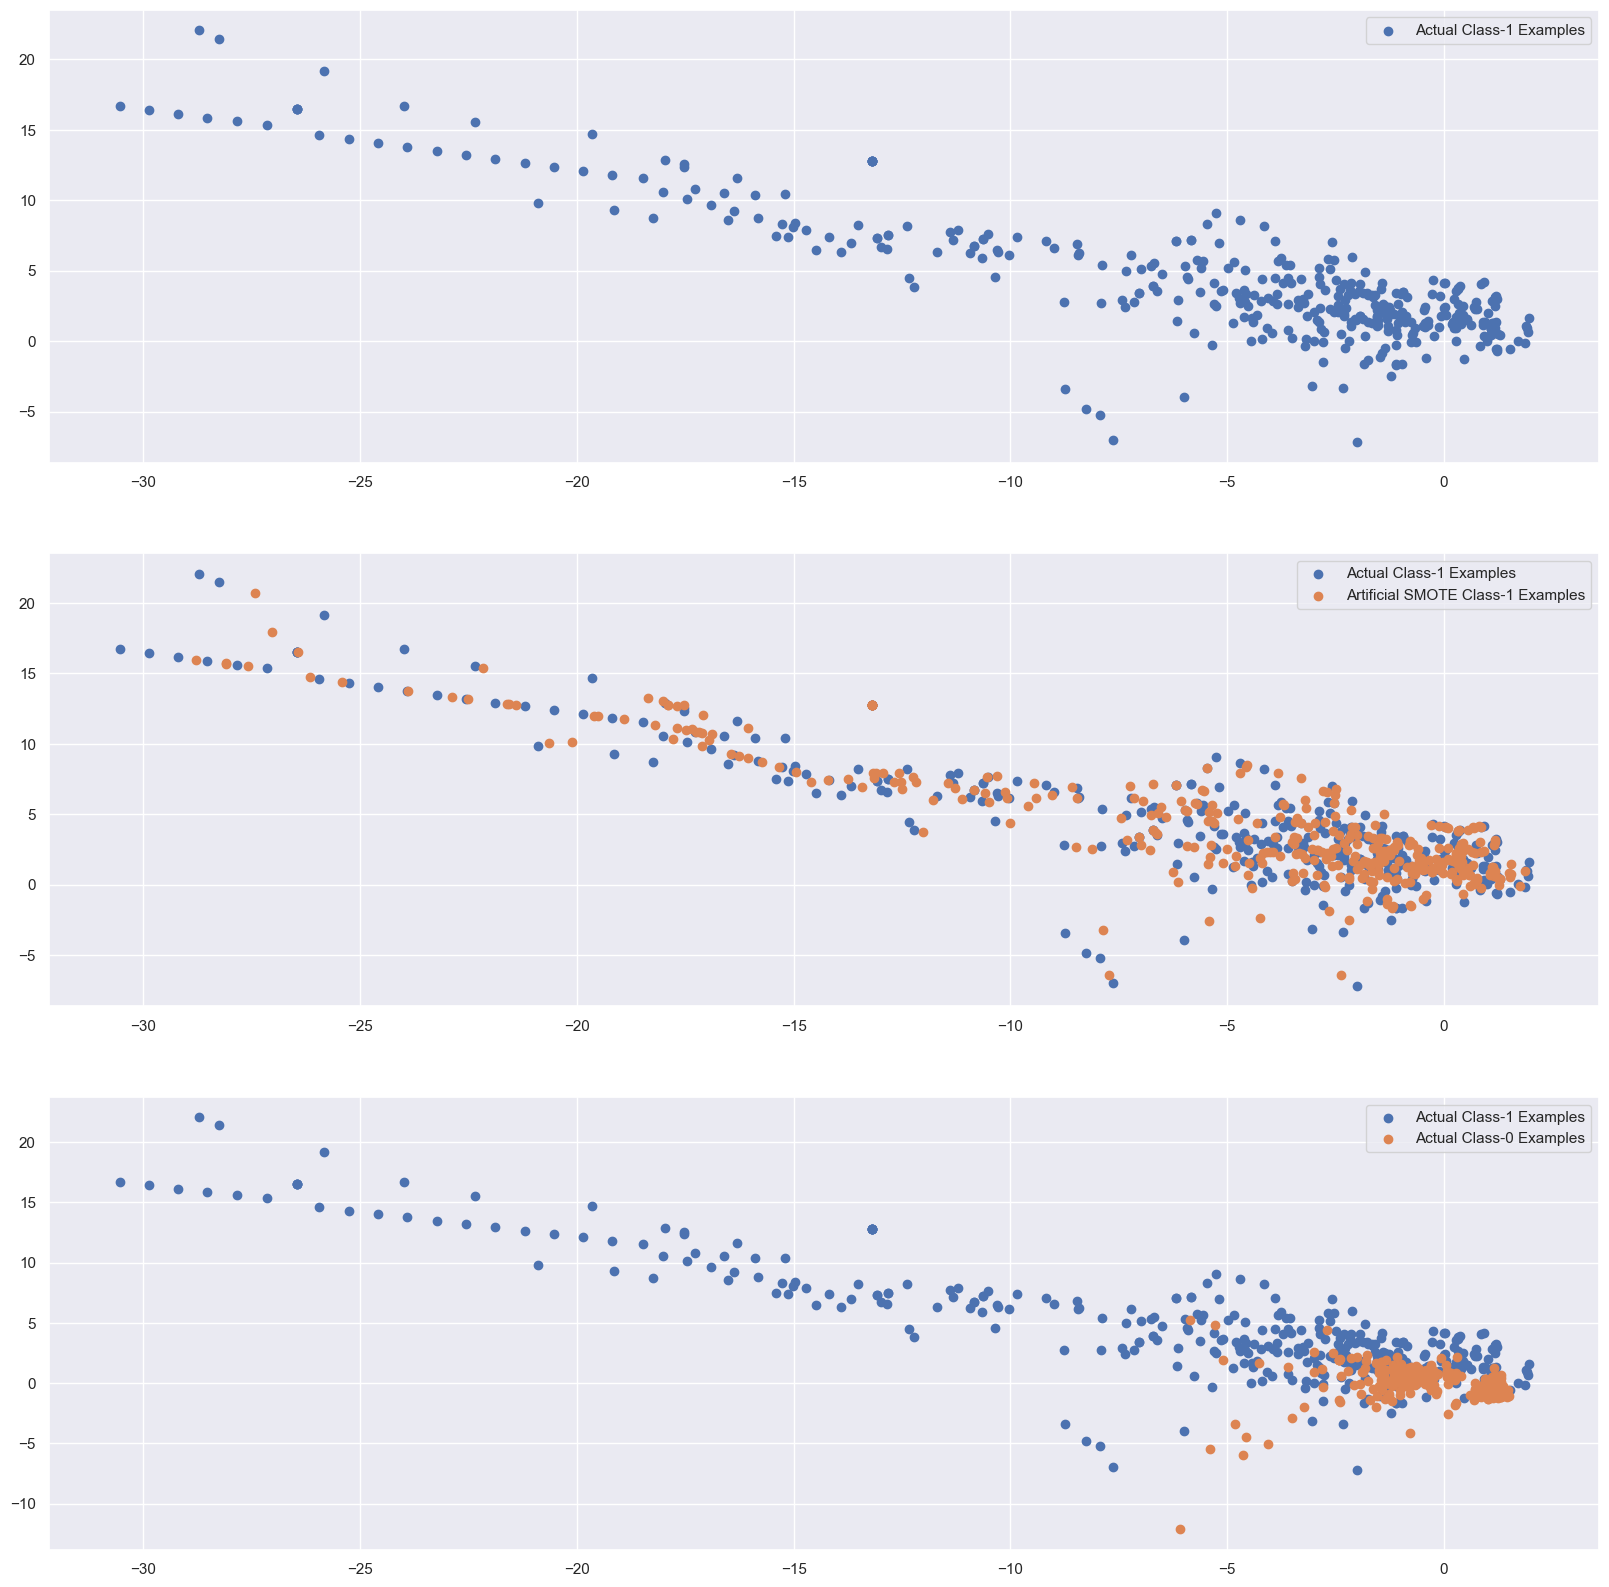

In [91]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train) 

# Create dataframe
# X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=cols)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote, columns=X.columns)  # Assuming 'cols' is the column names of X


In [93]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.5
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

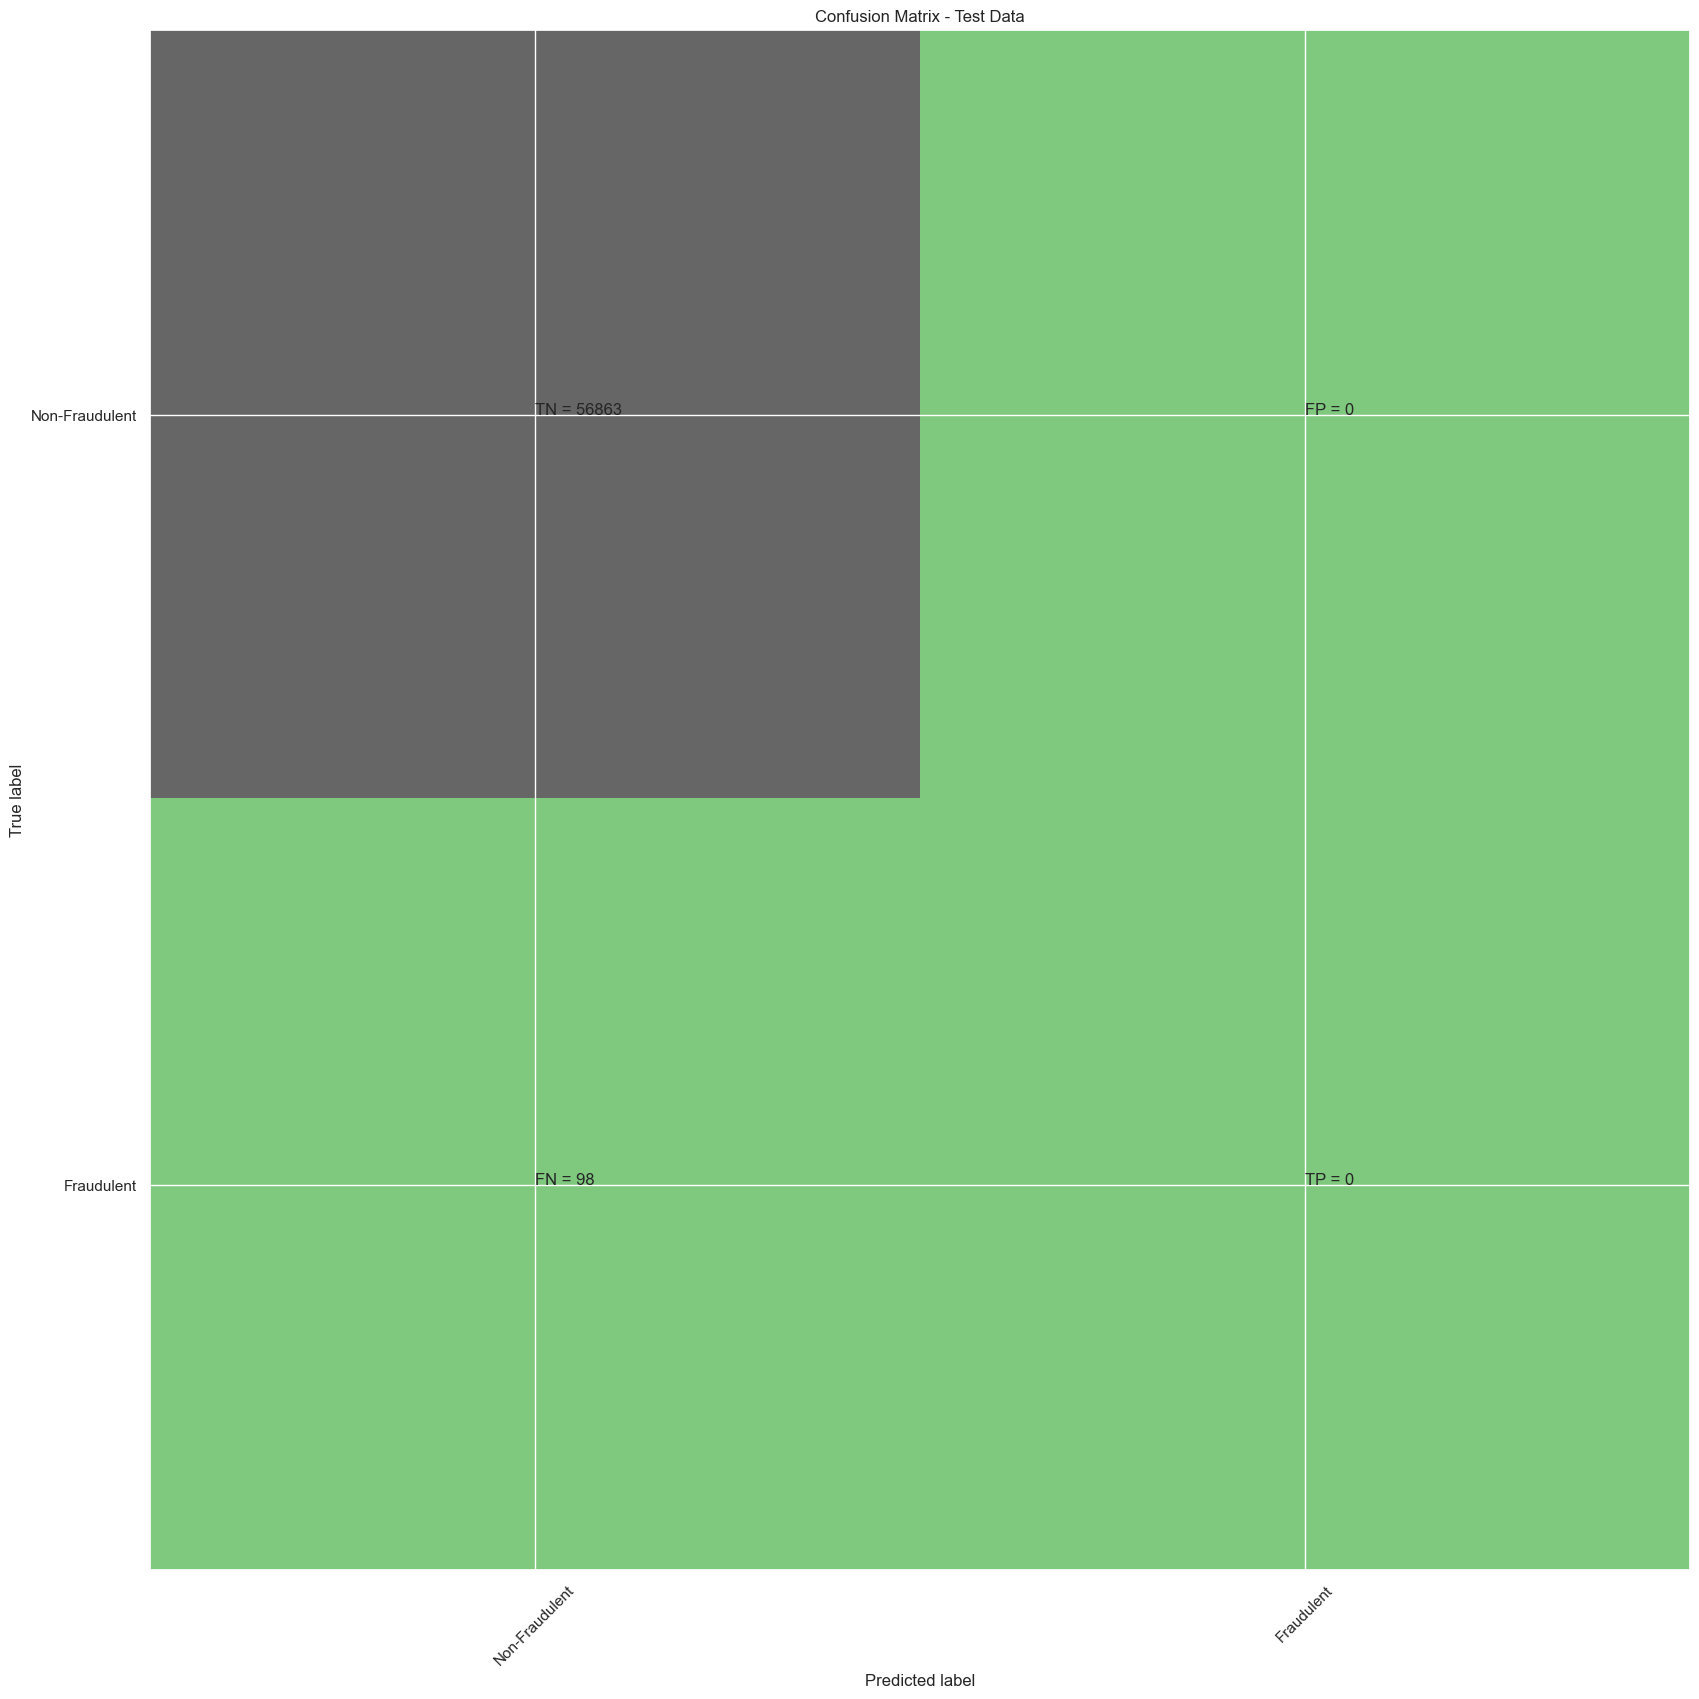

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


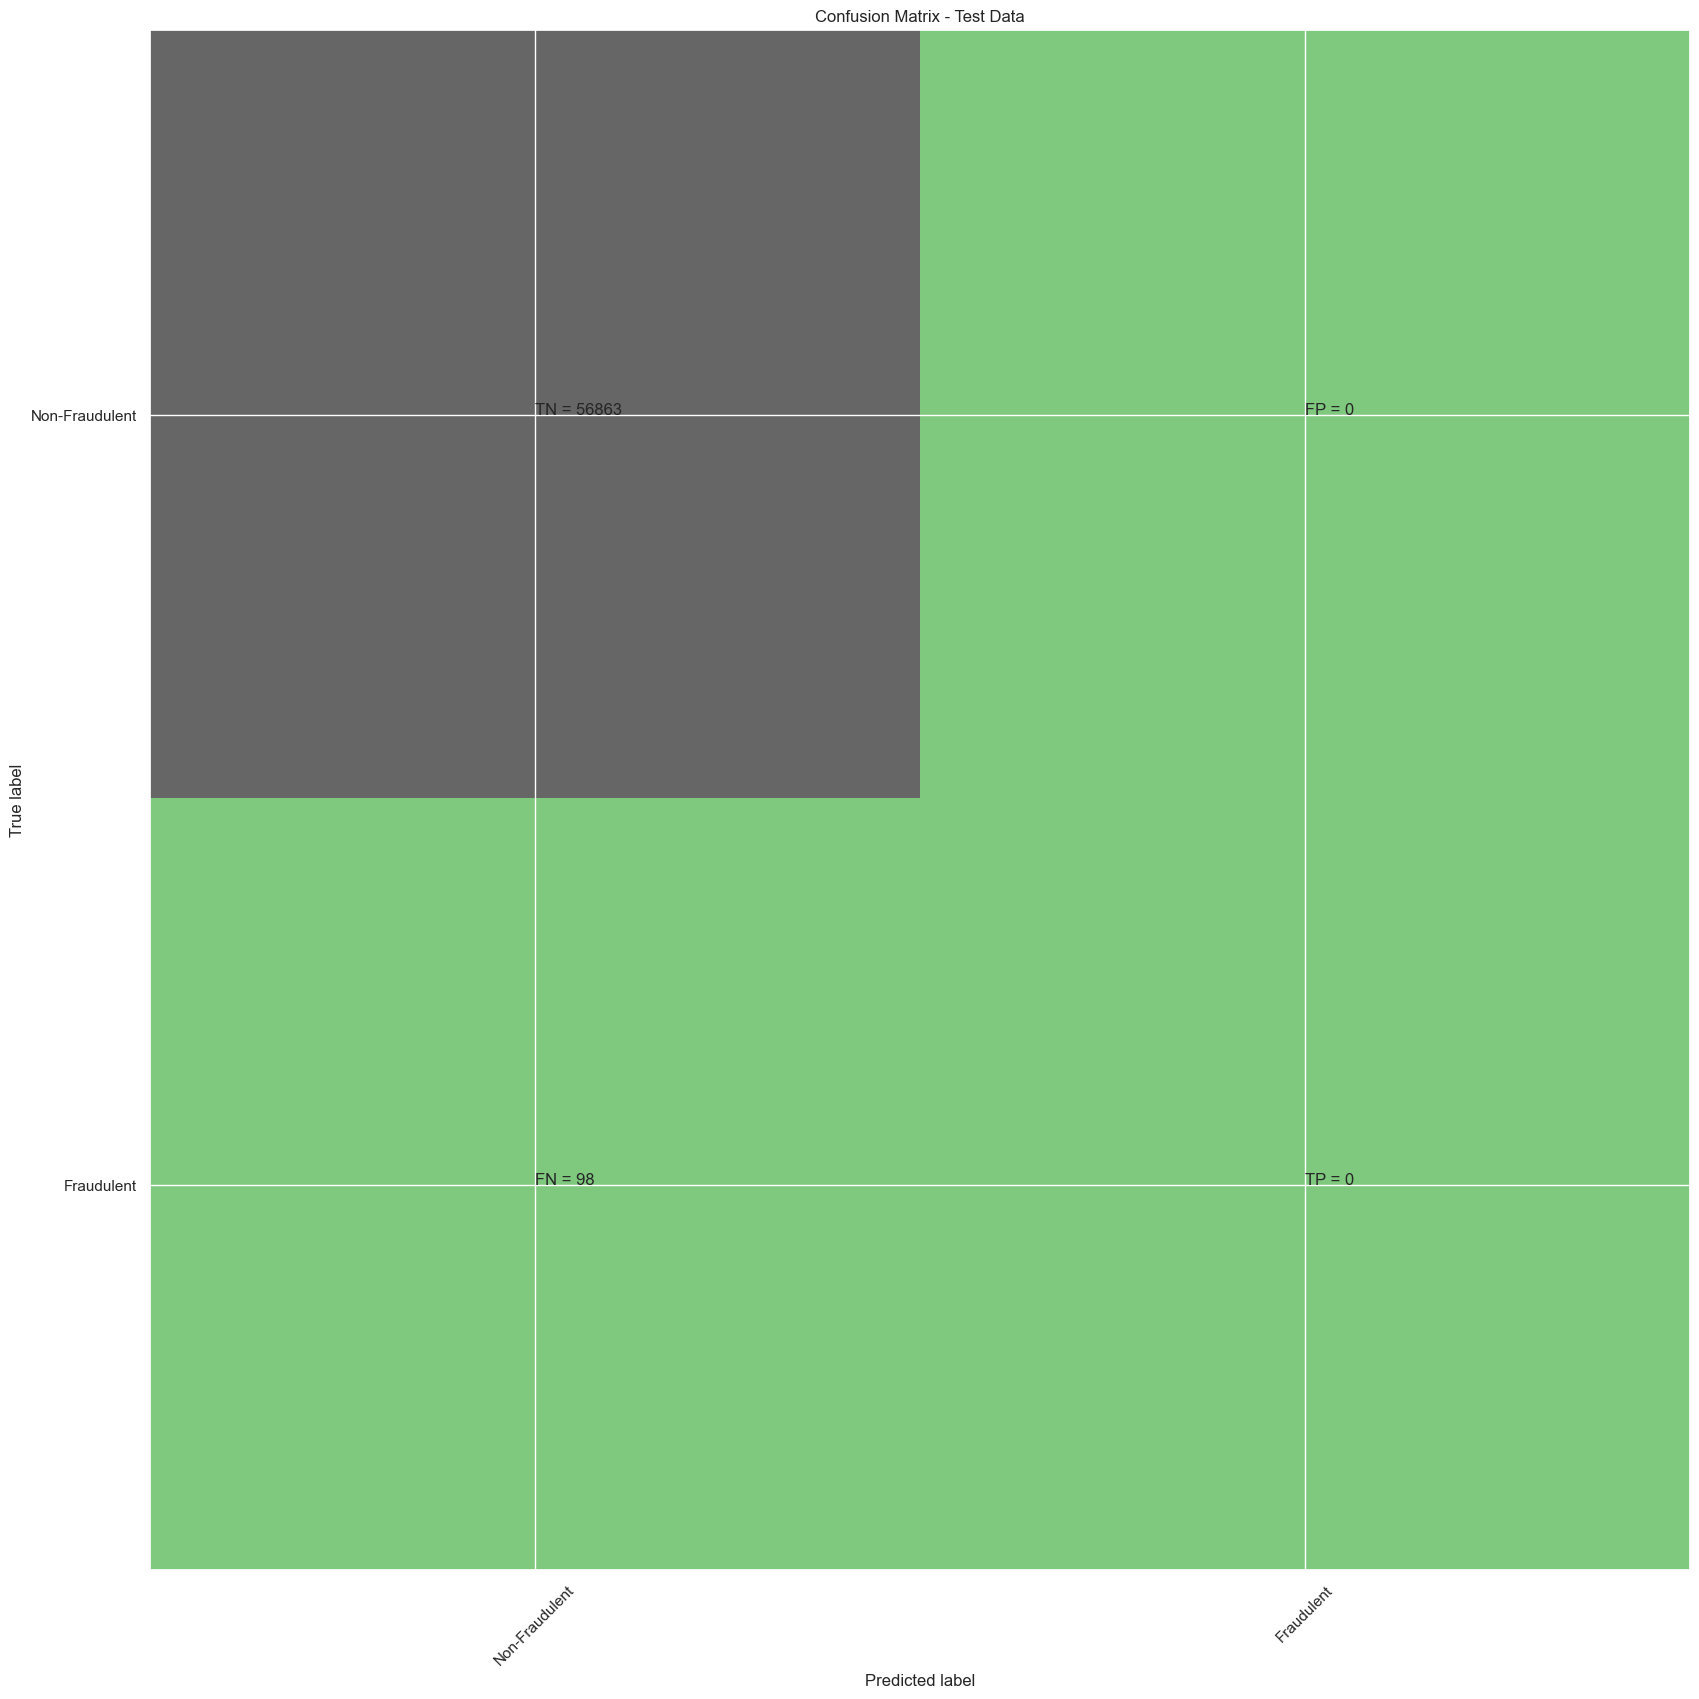

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.5
l2 threshold: inf
ROC for the test dataset 50.0%


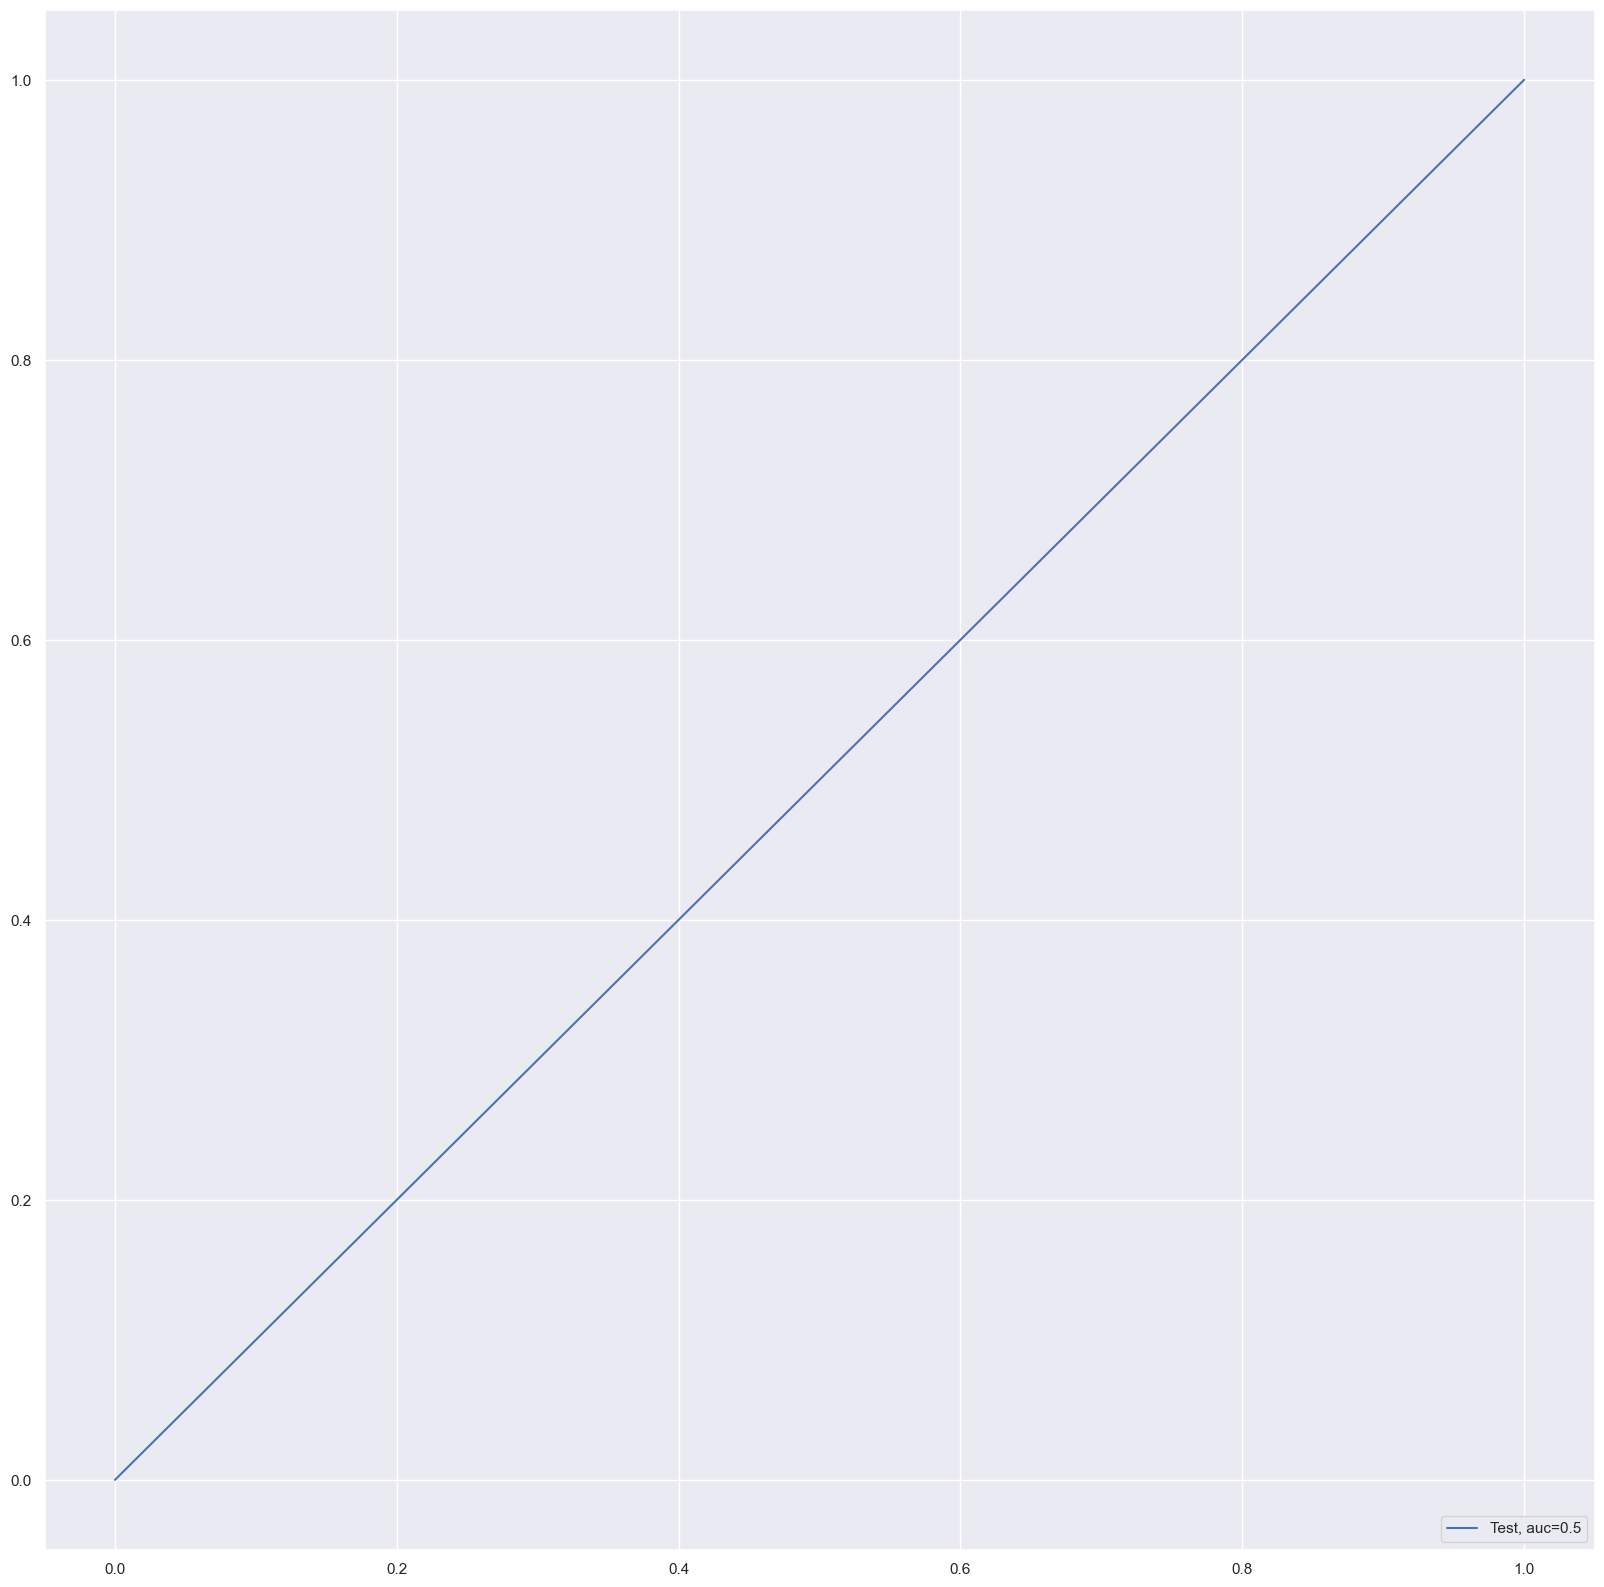

l1 roc_value: 0.5
l1 threshold: inf
ROC for the test dataset 50.0%


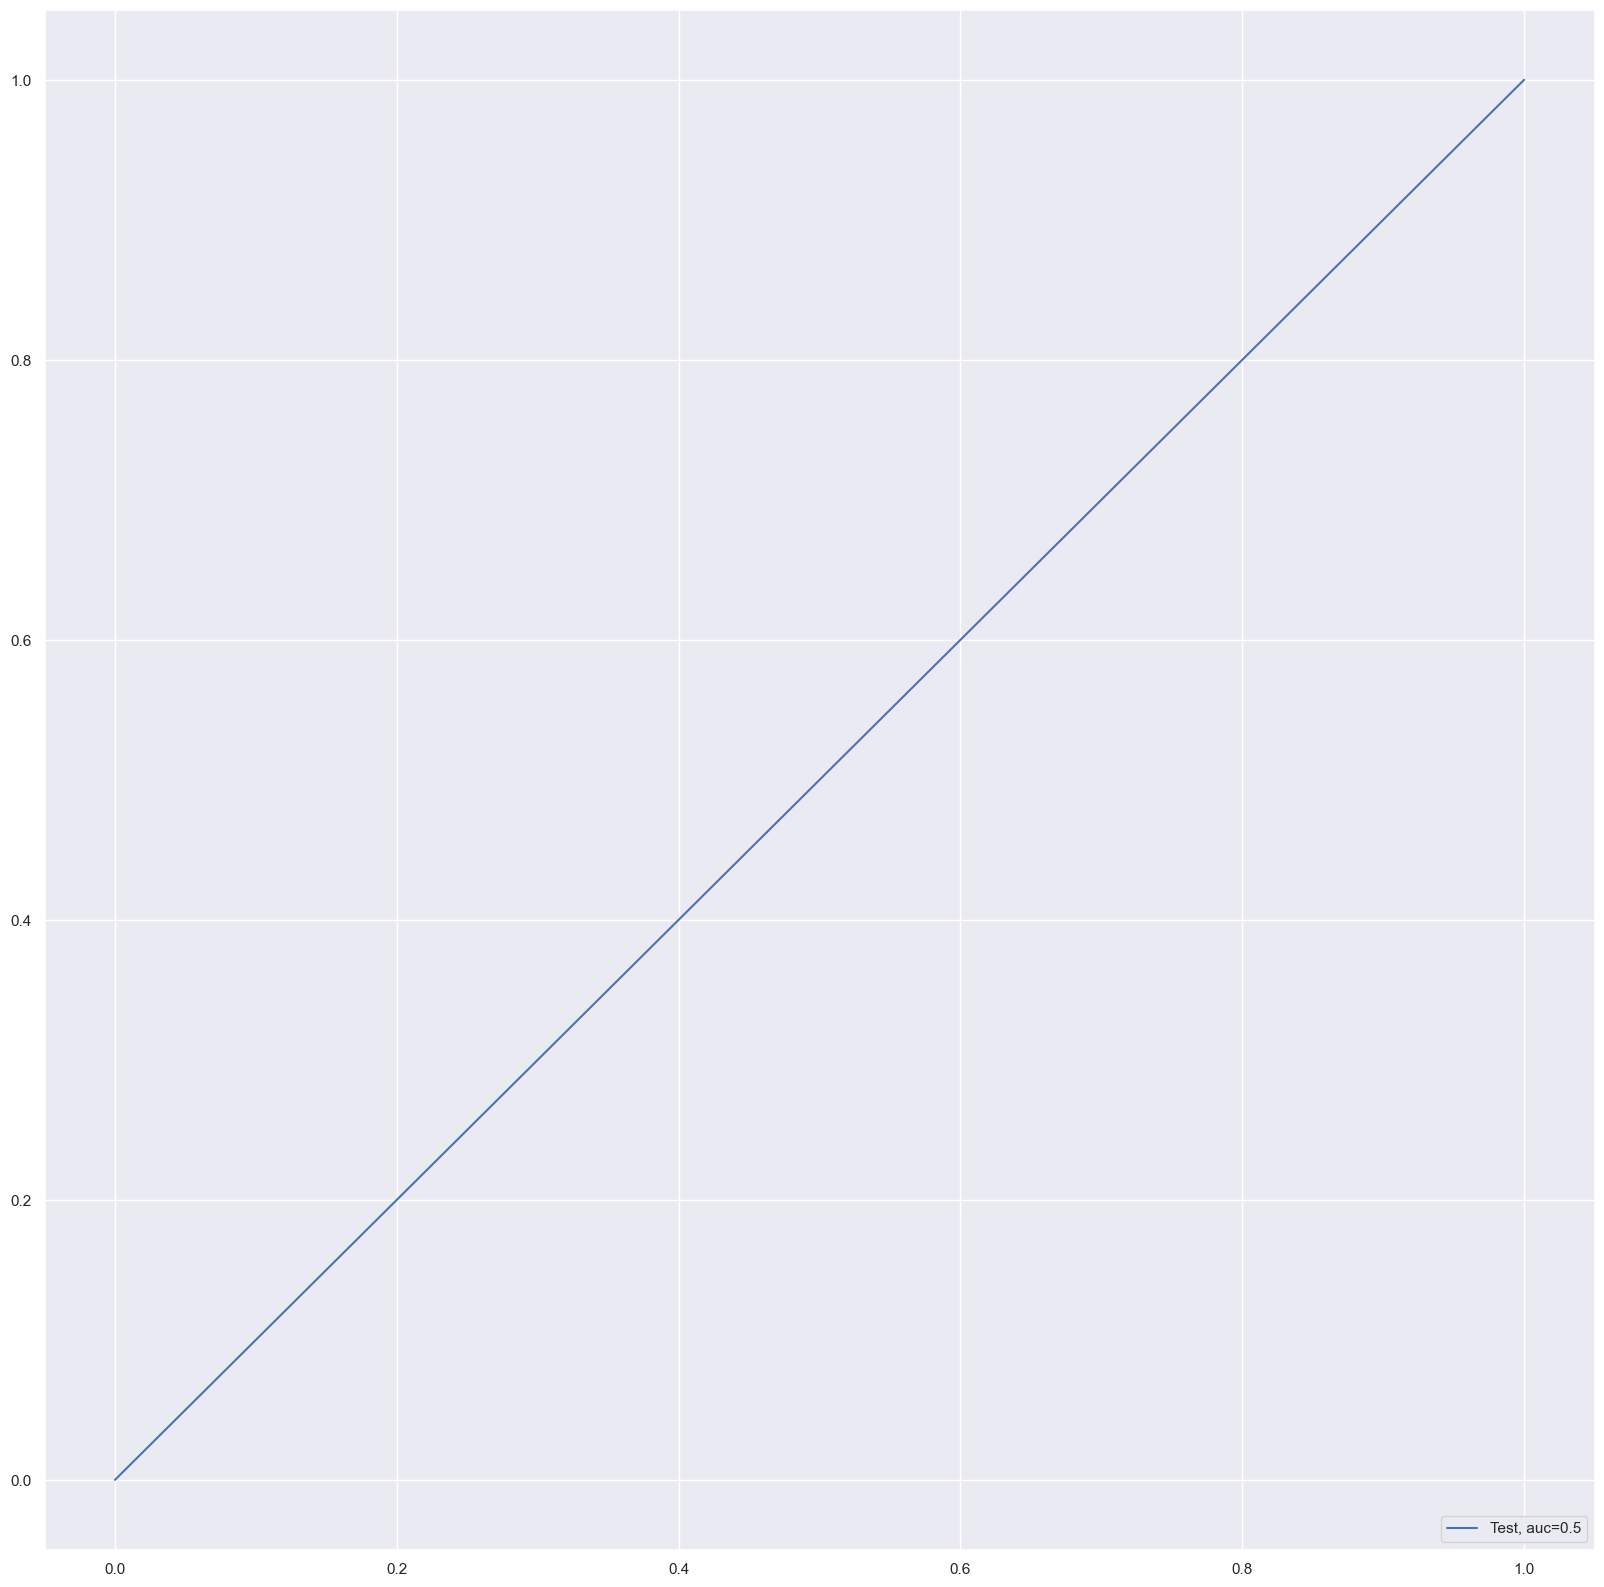

Time Taken by Model: --- 82.46724605560303 seconds ---
--------------------------------------------------------------------------------
KNN Model
Model score
0.9946805709169432
Confusion Matrix


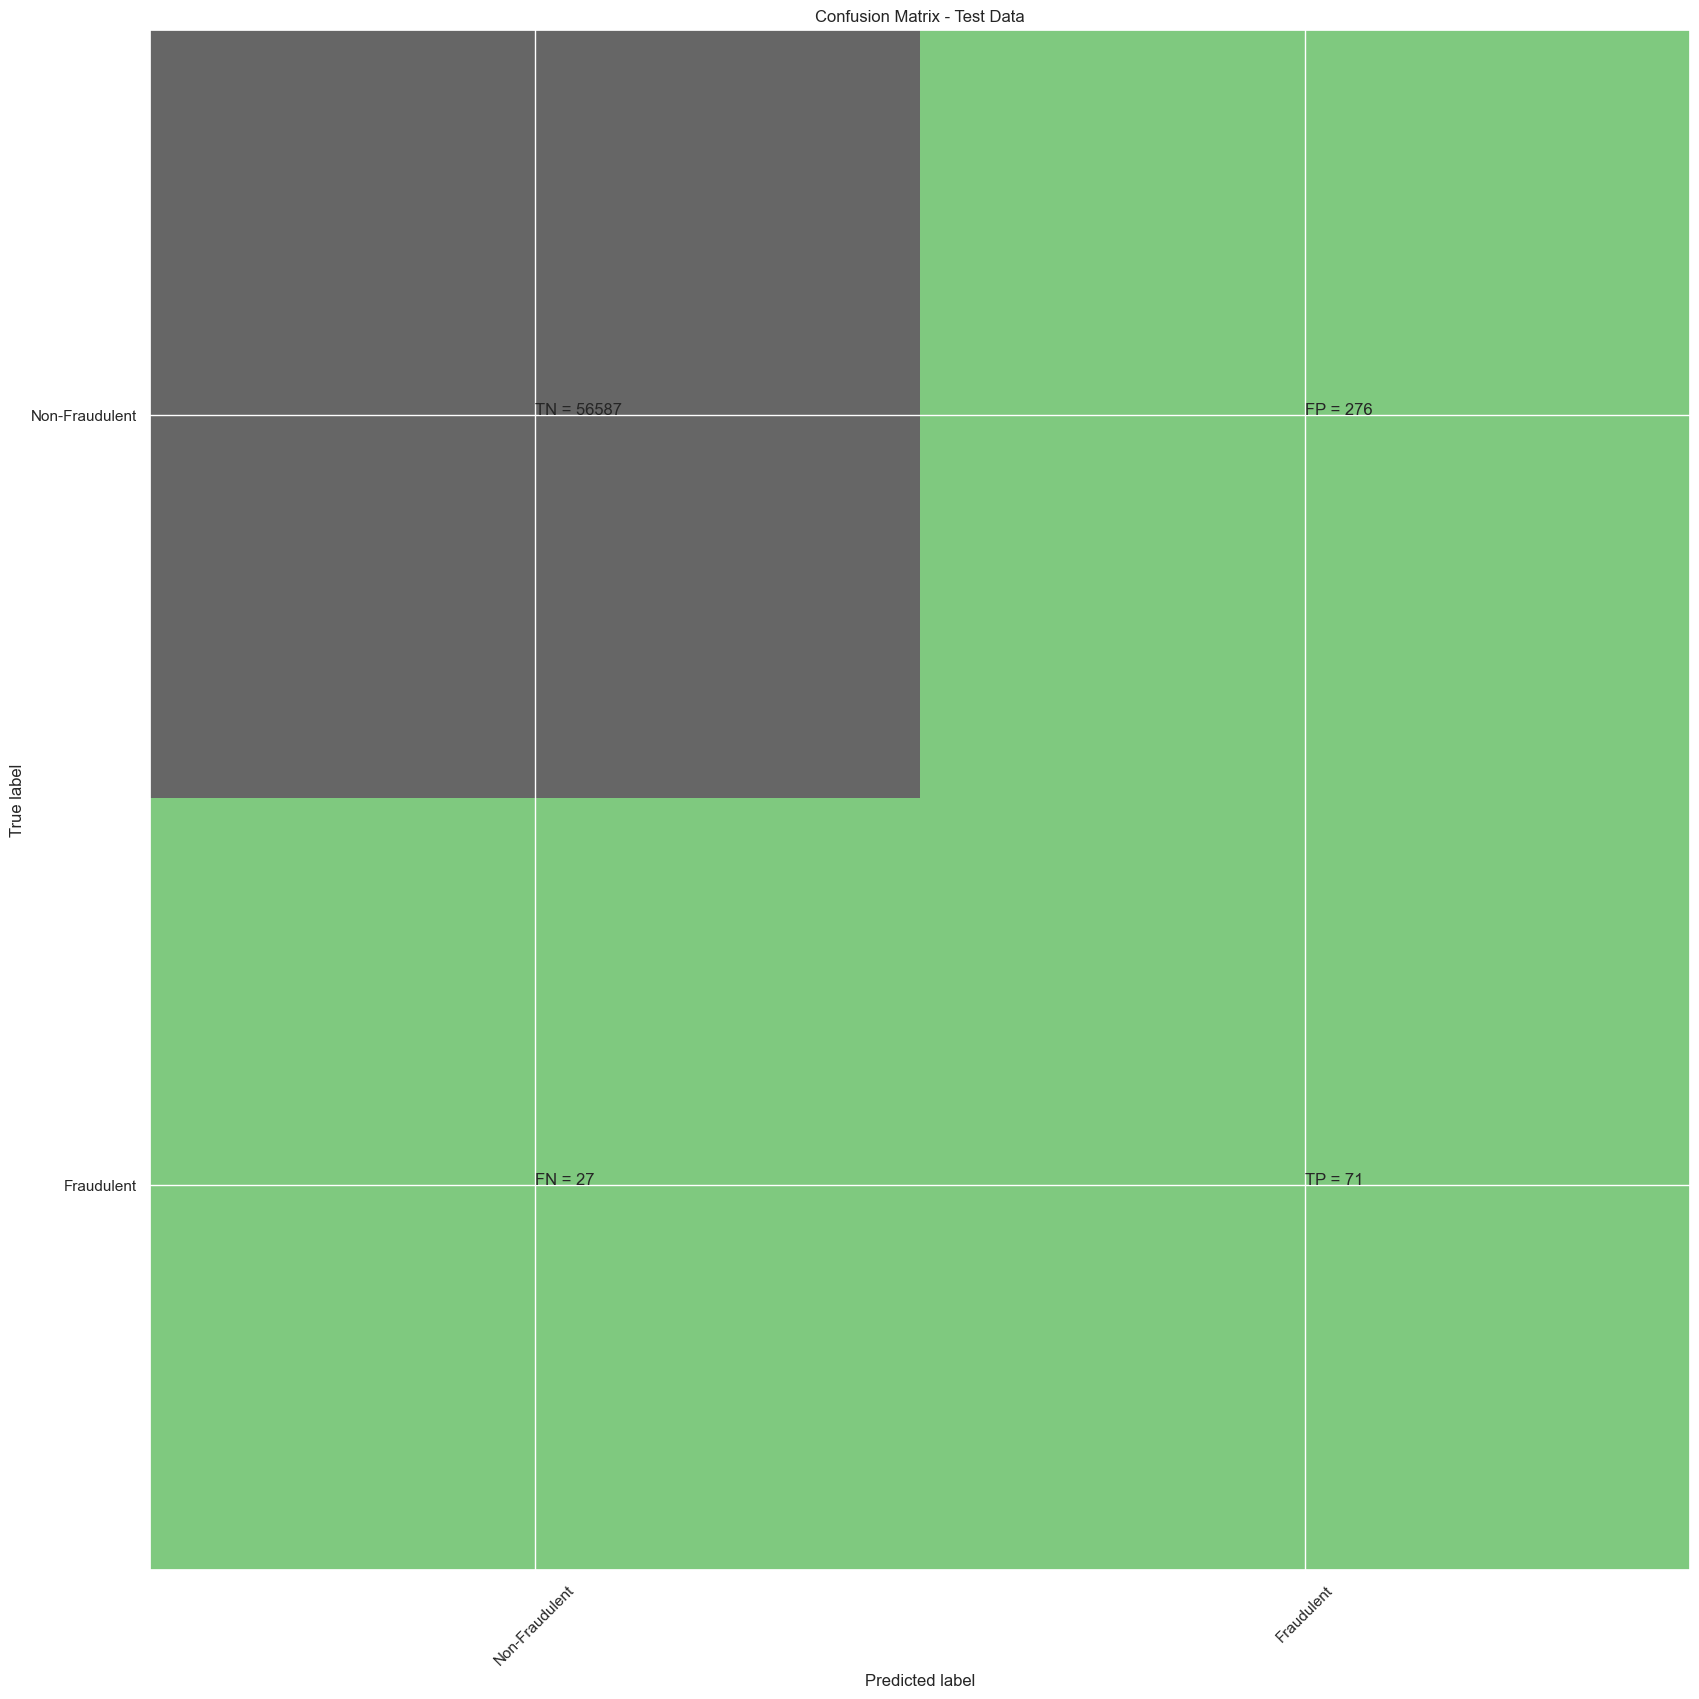

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


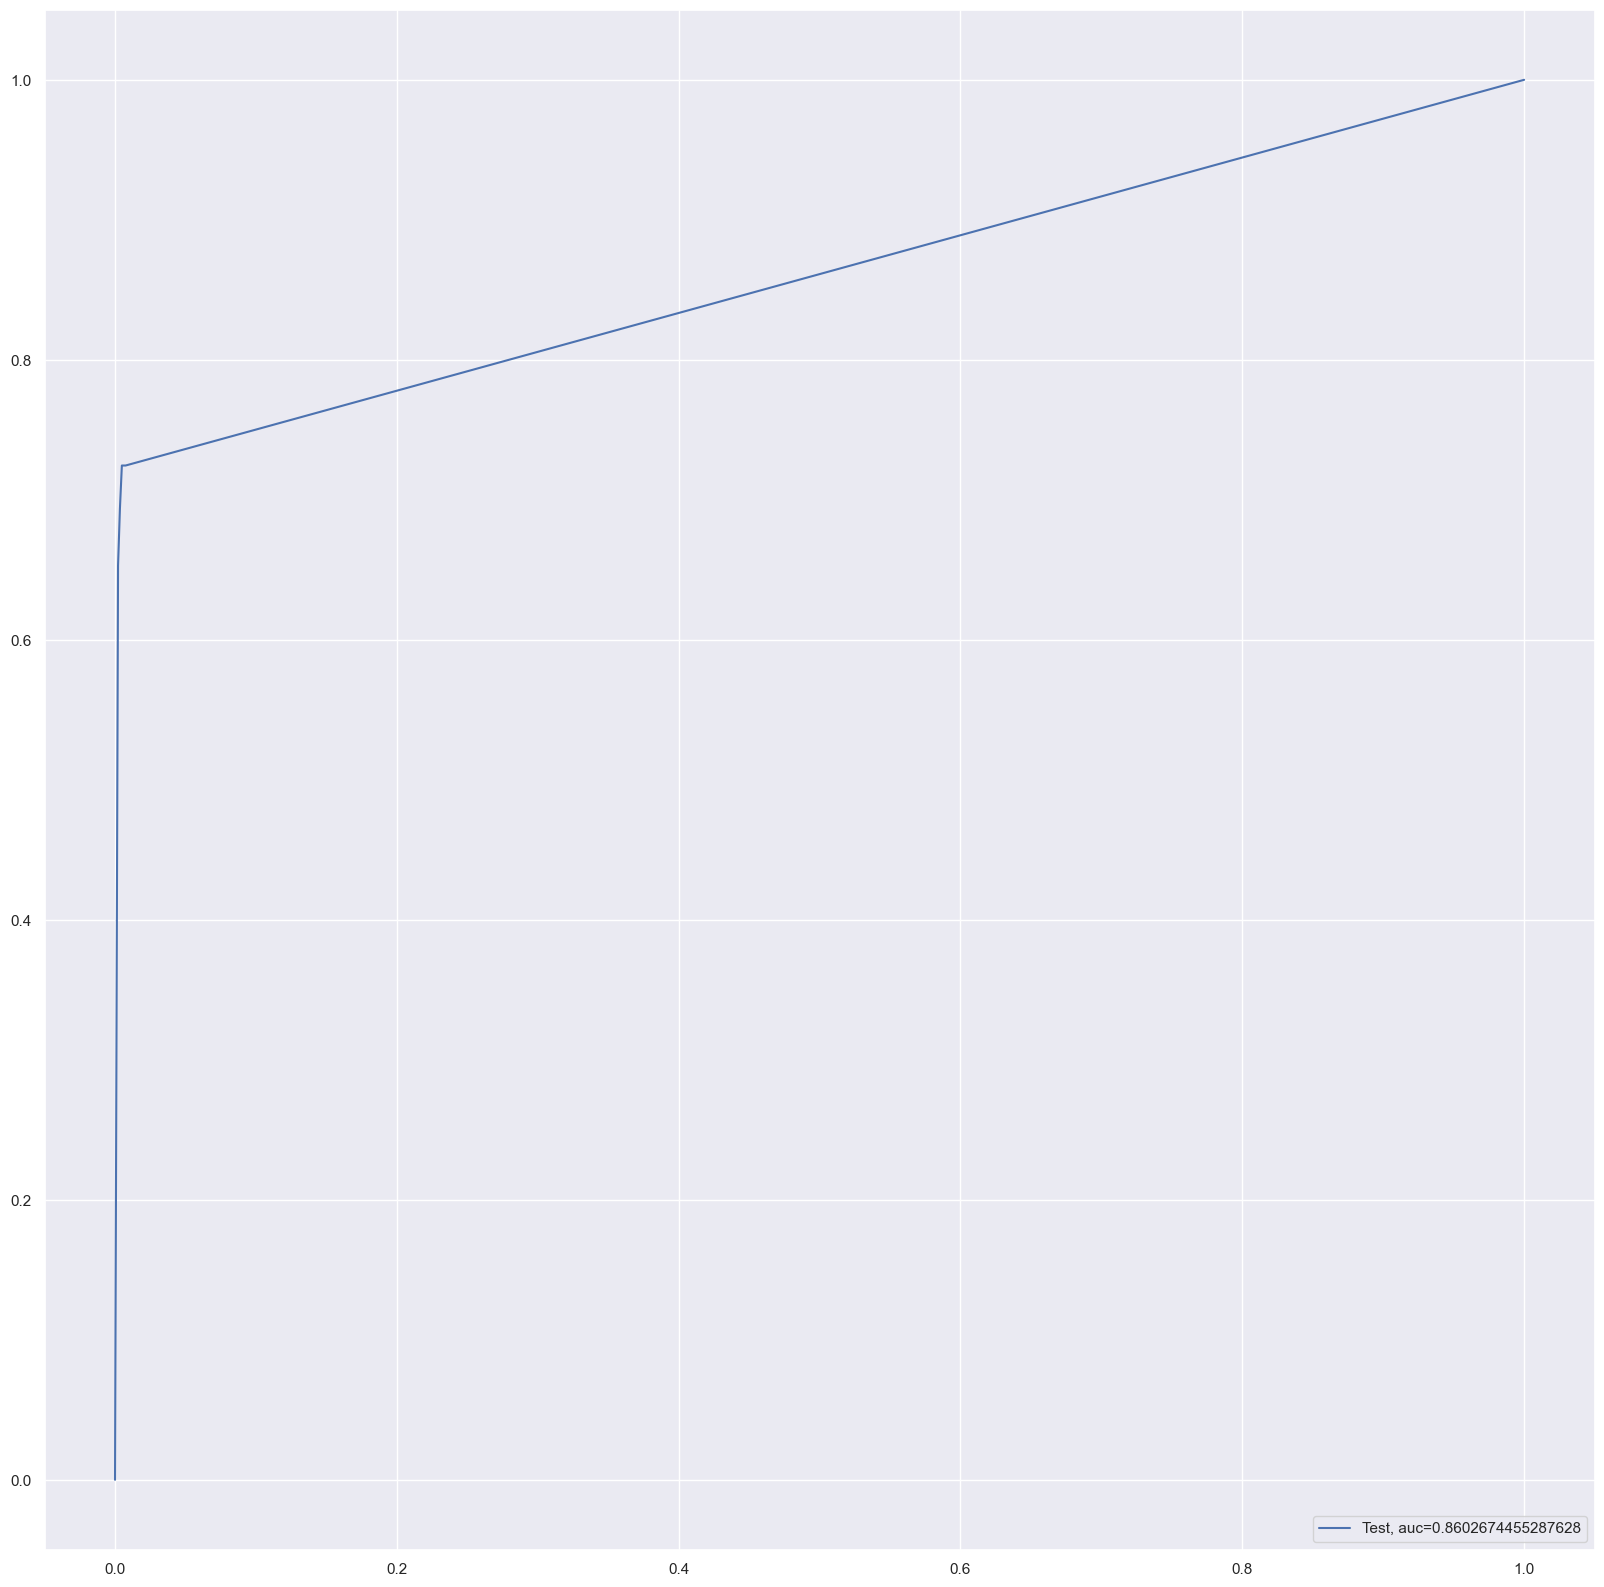

Time Taken by Model: --- 120.83252692222595 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
Confusion Matrix


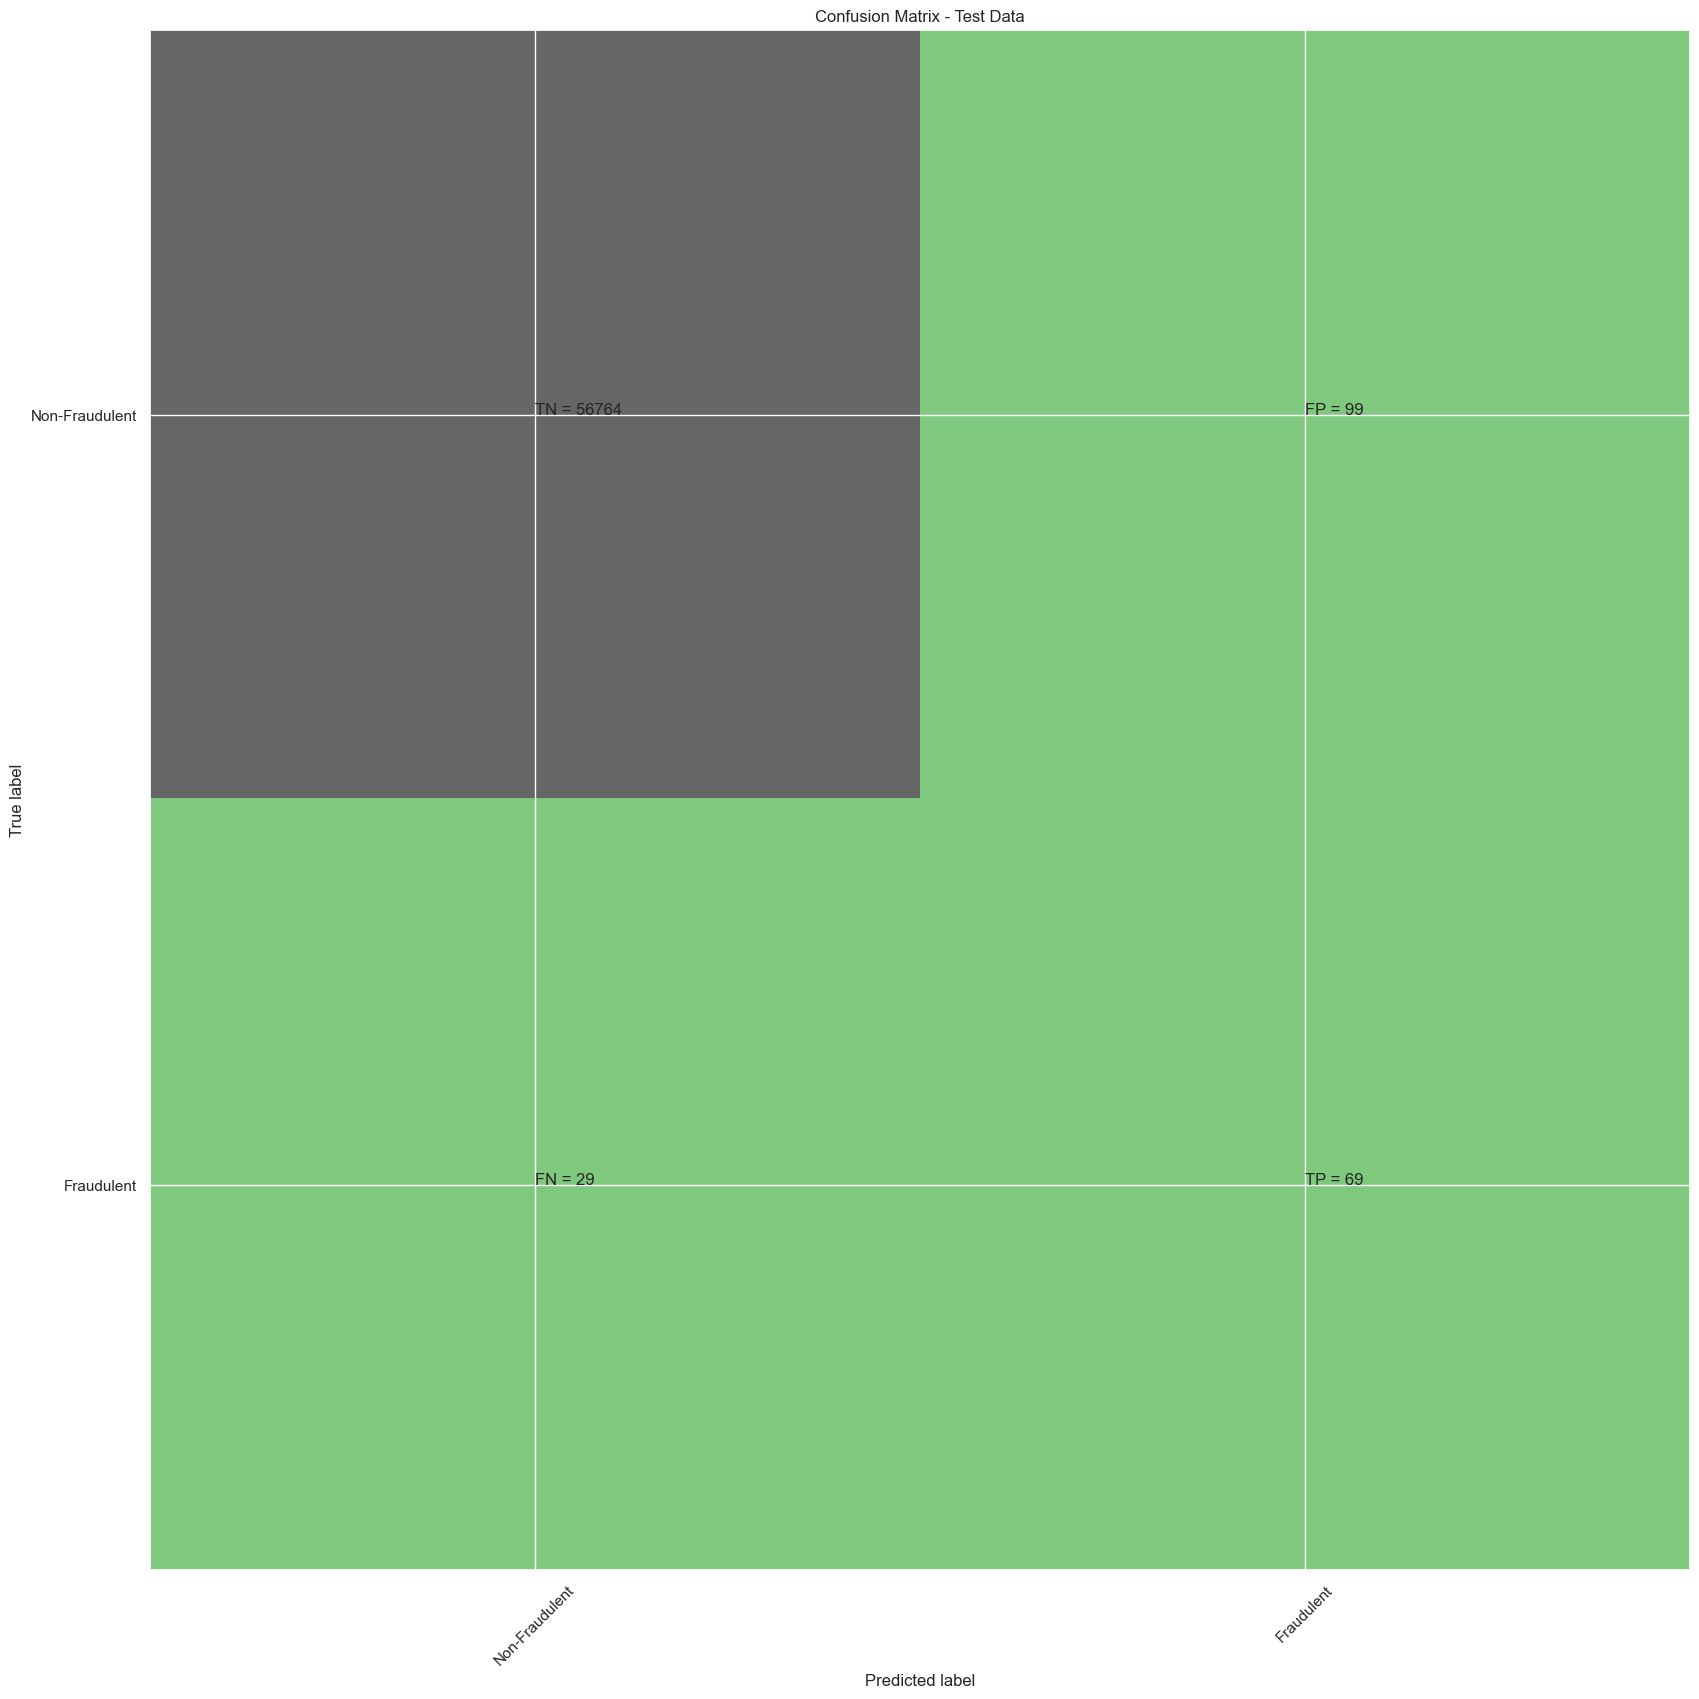

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


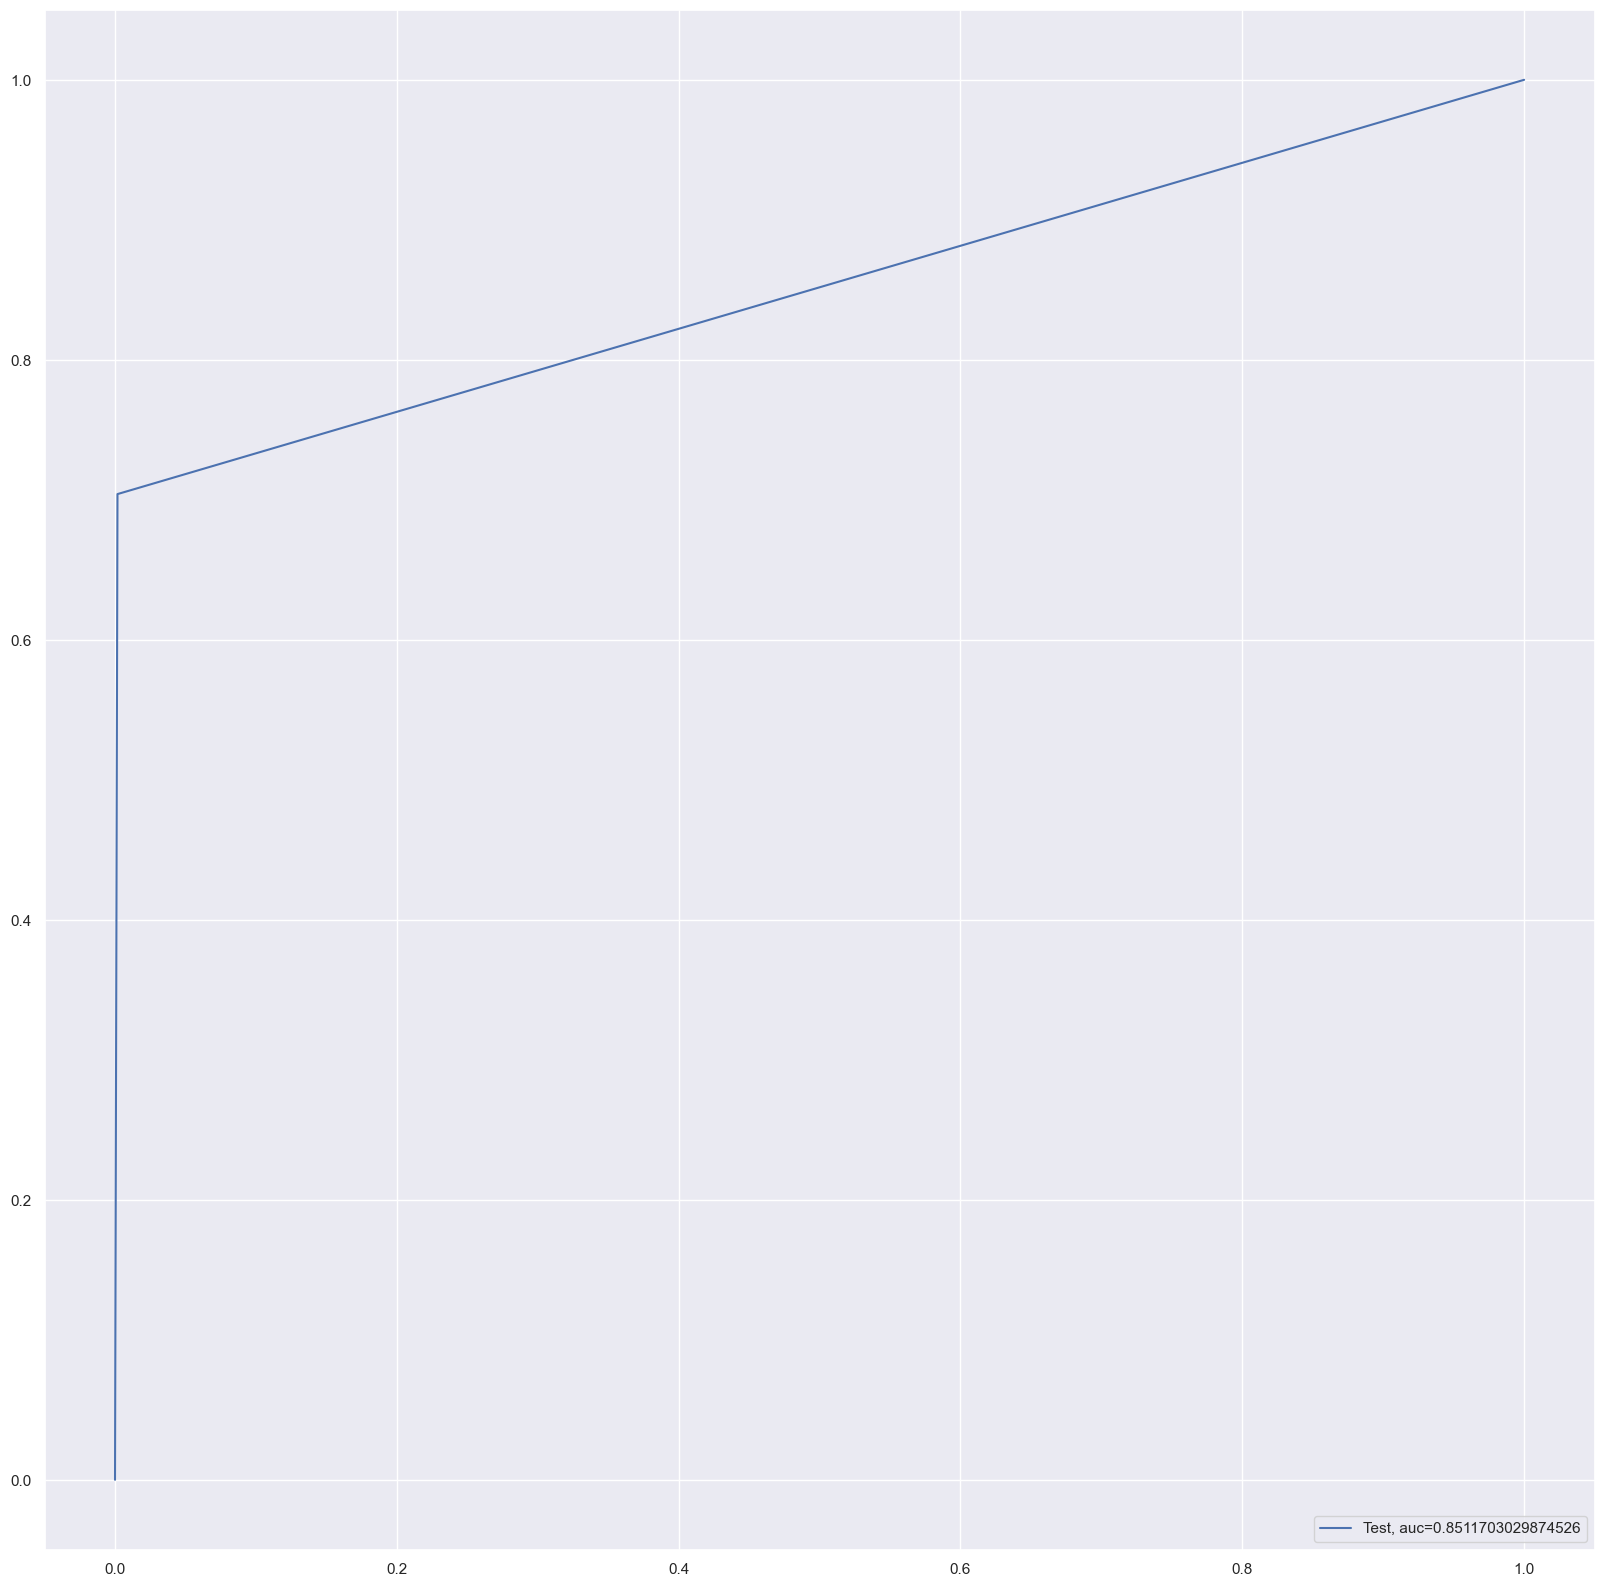

entropy score: 0.9969803900914661
Confusion Matrix


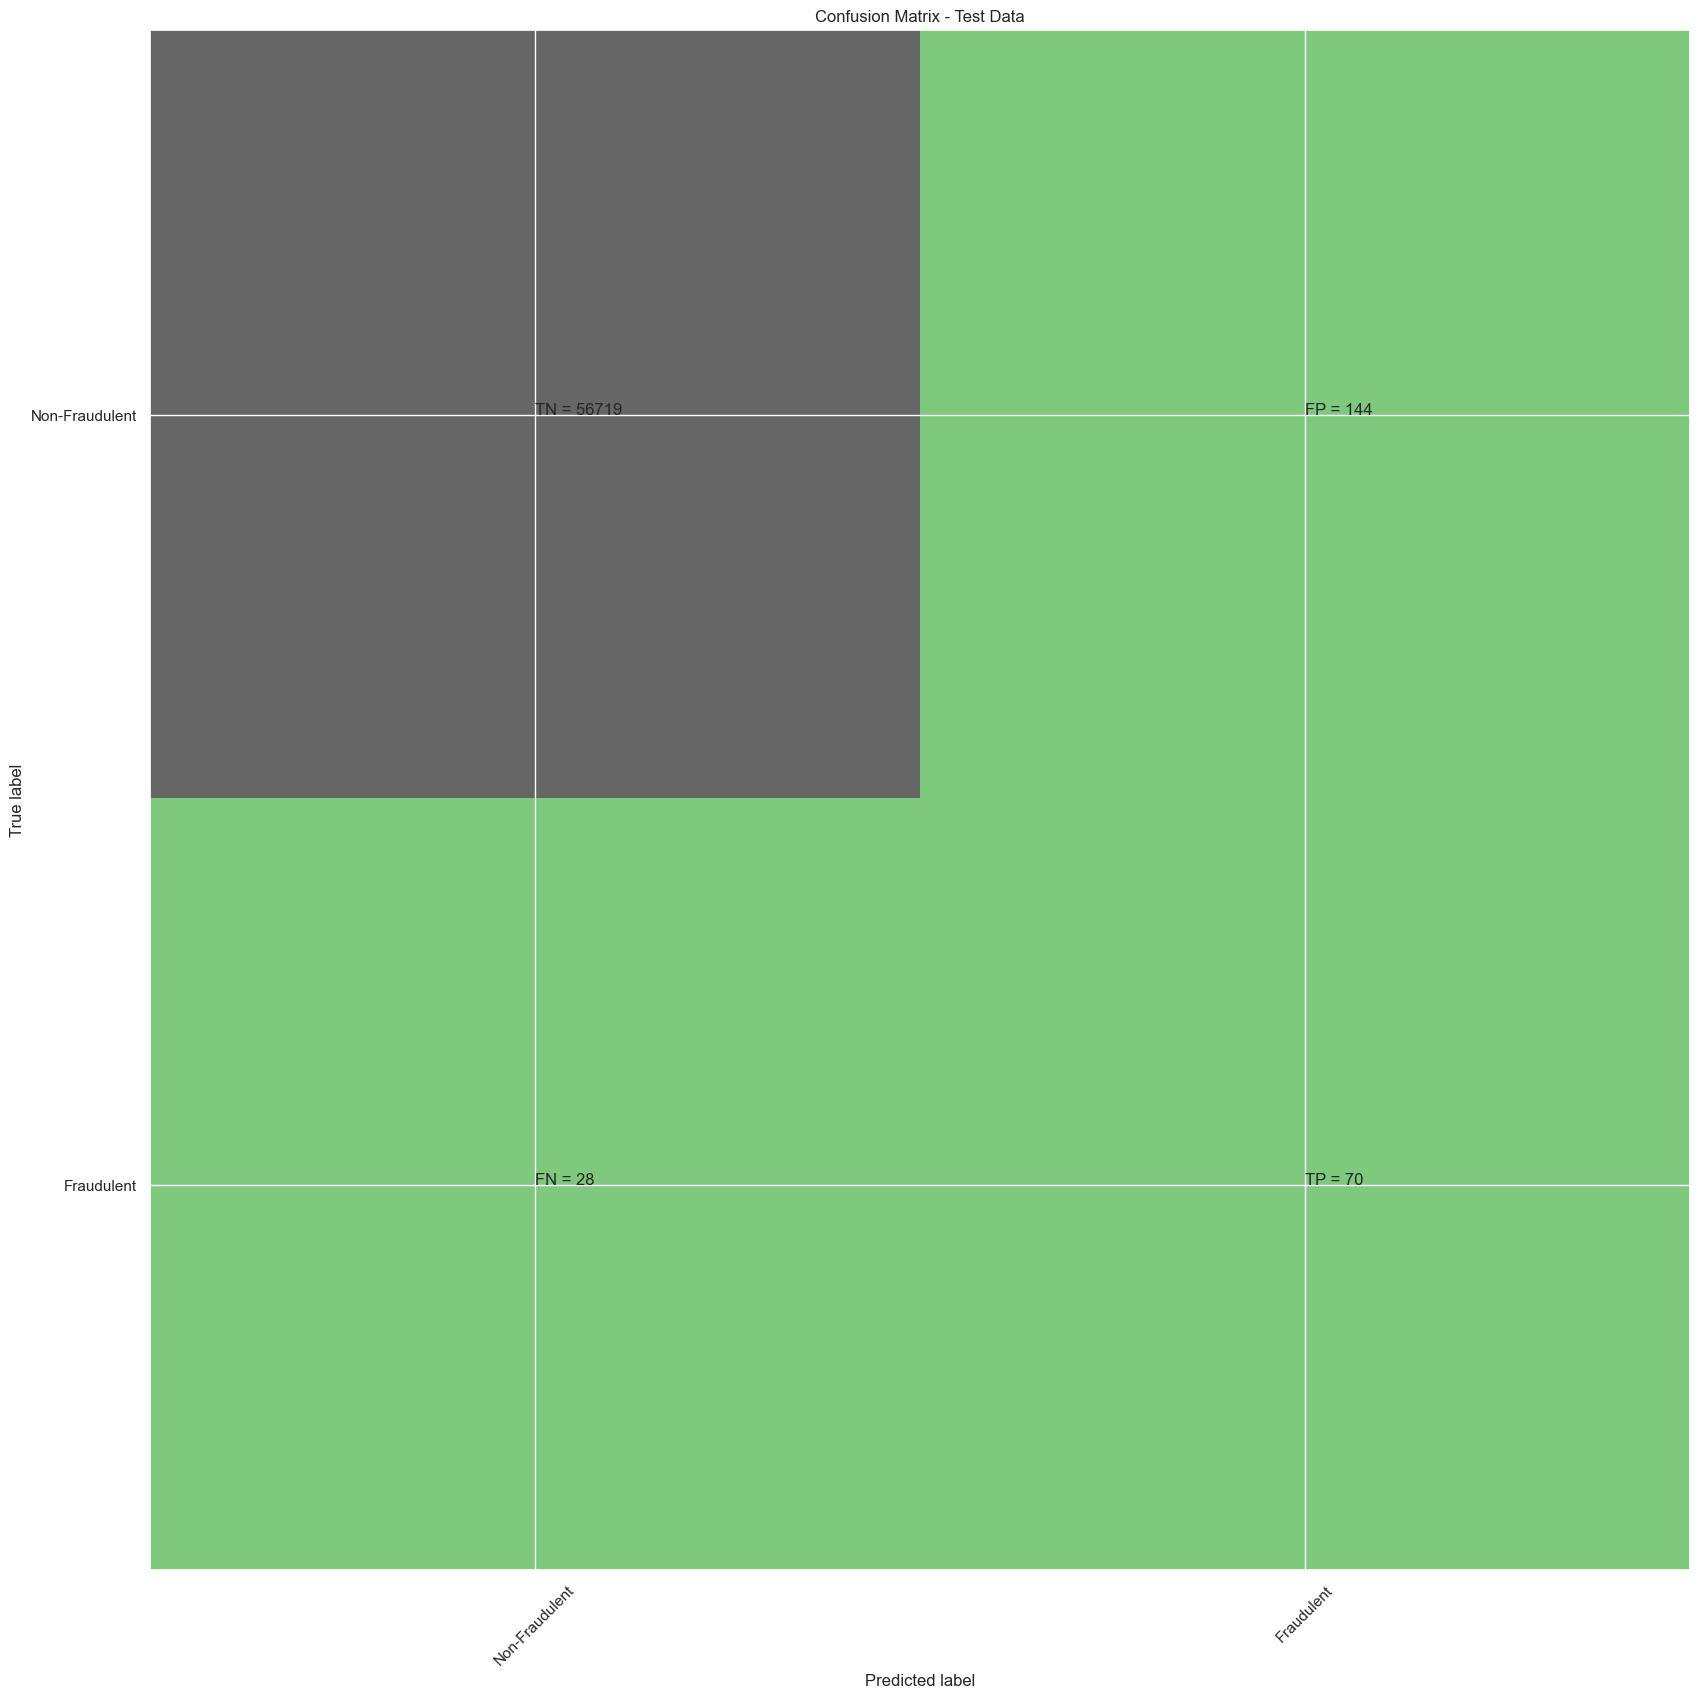

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


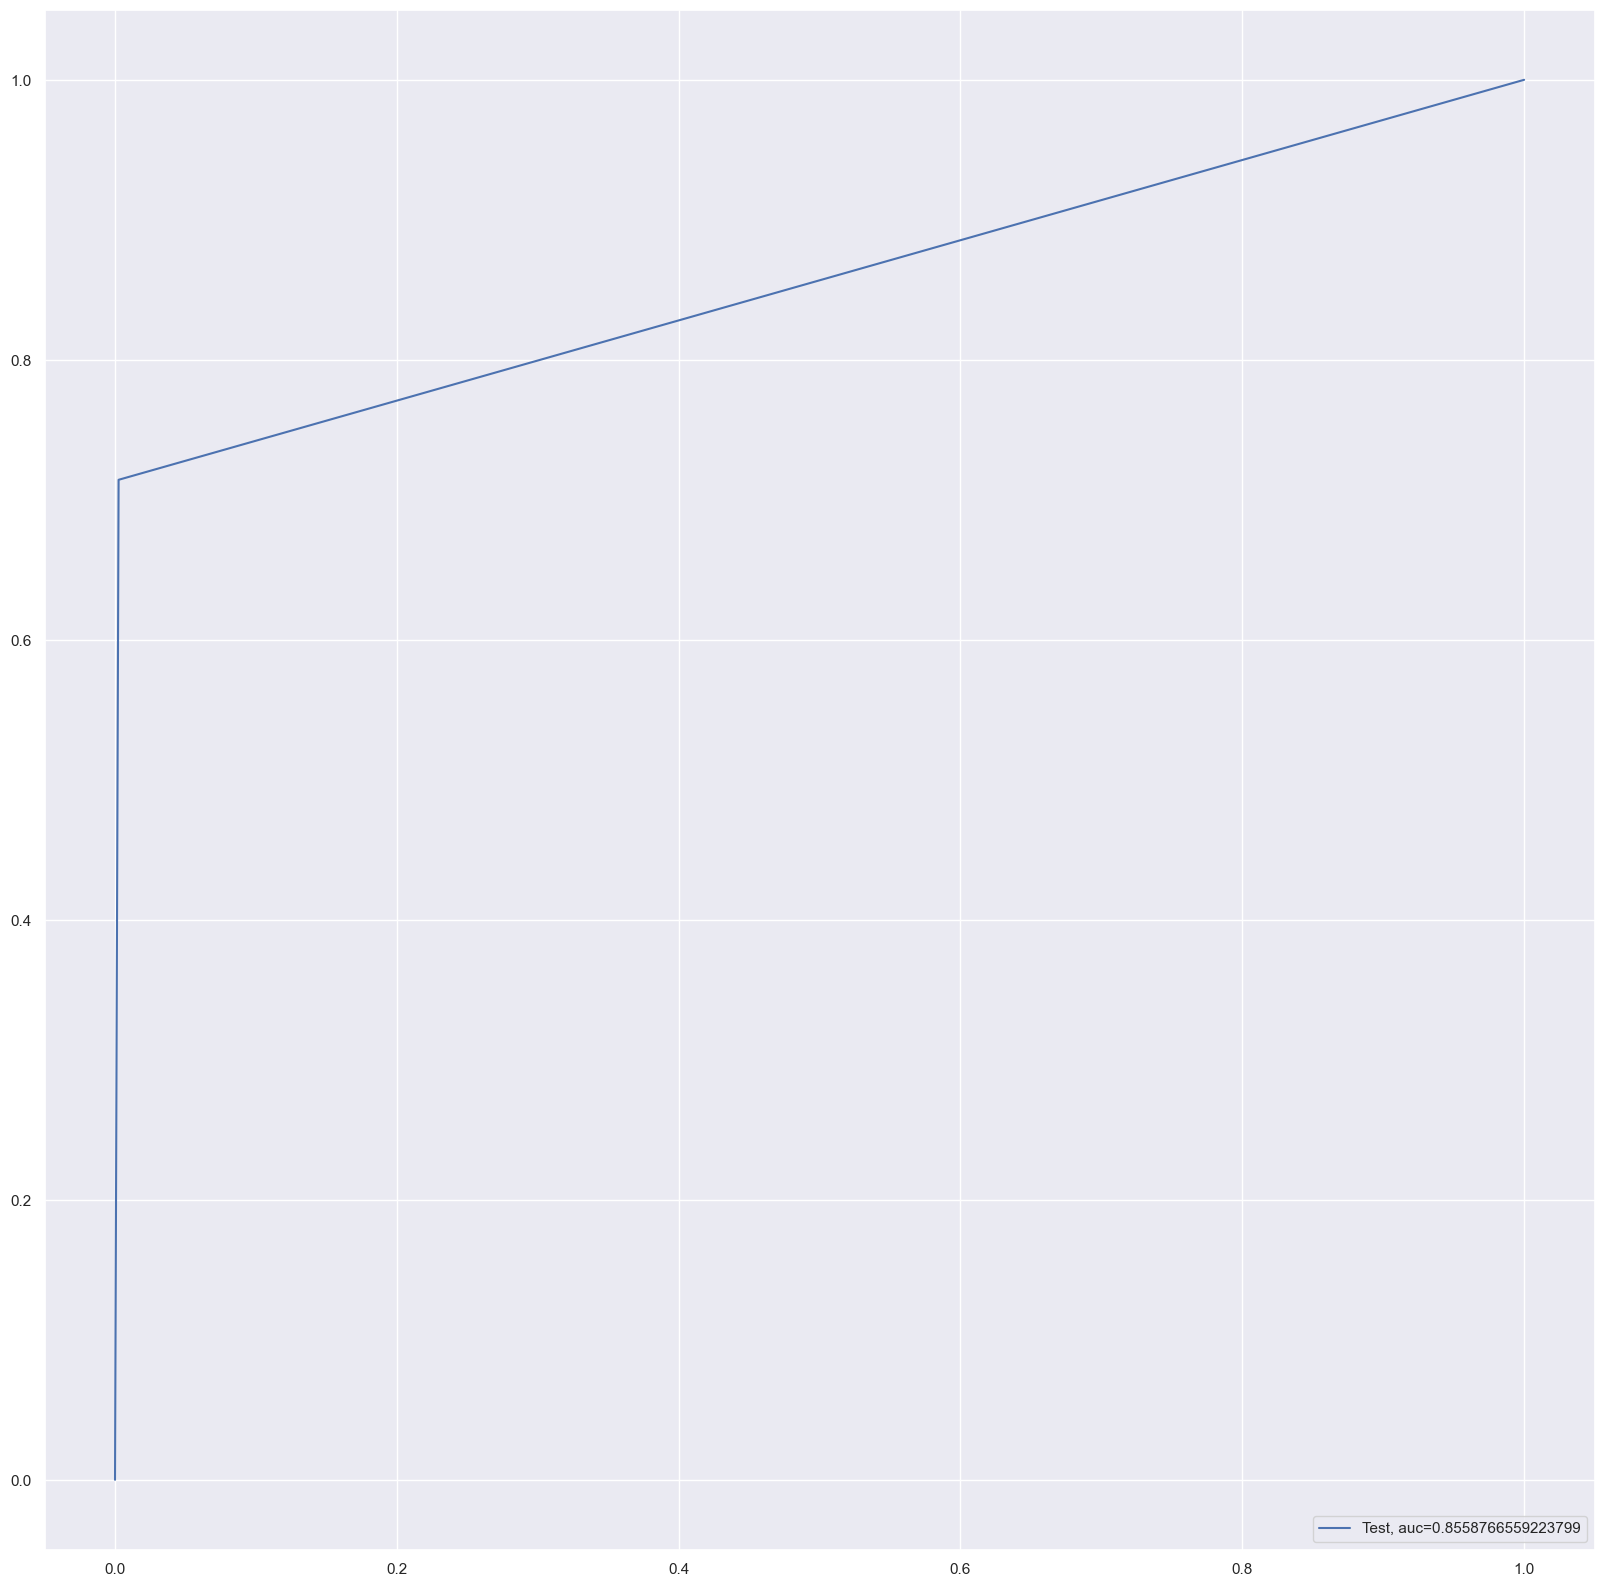

Time Taken by Model: --- 78.5171914100647 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


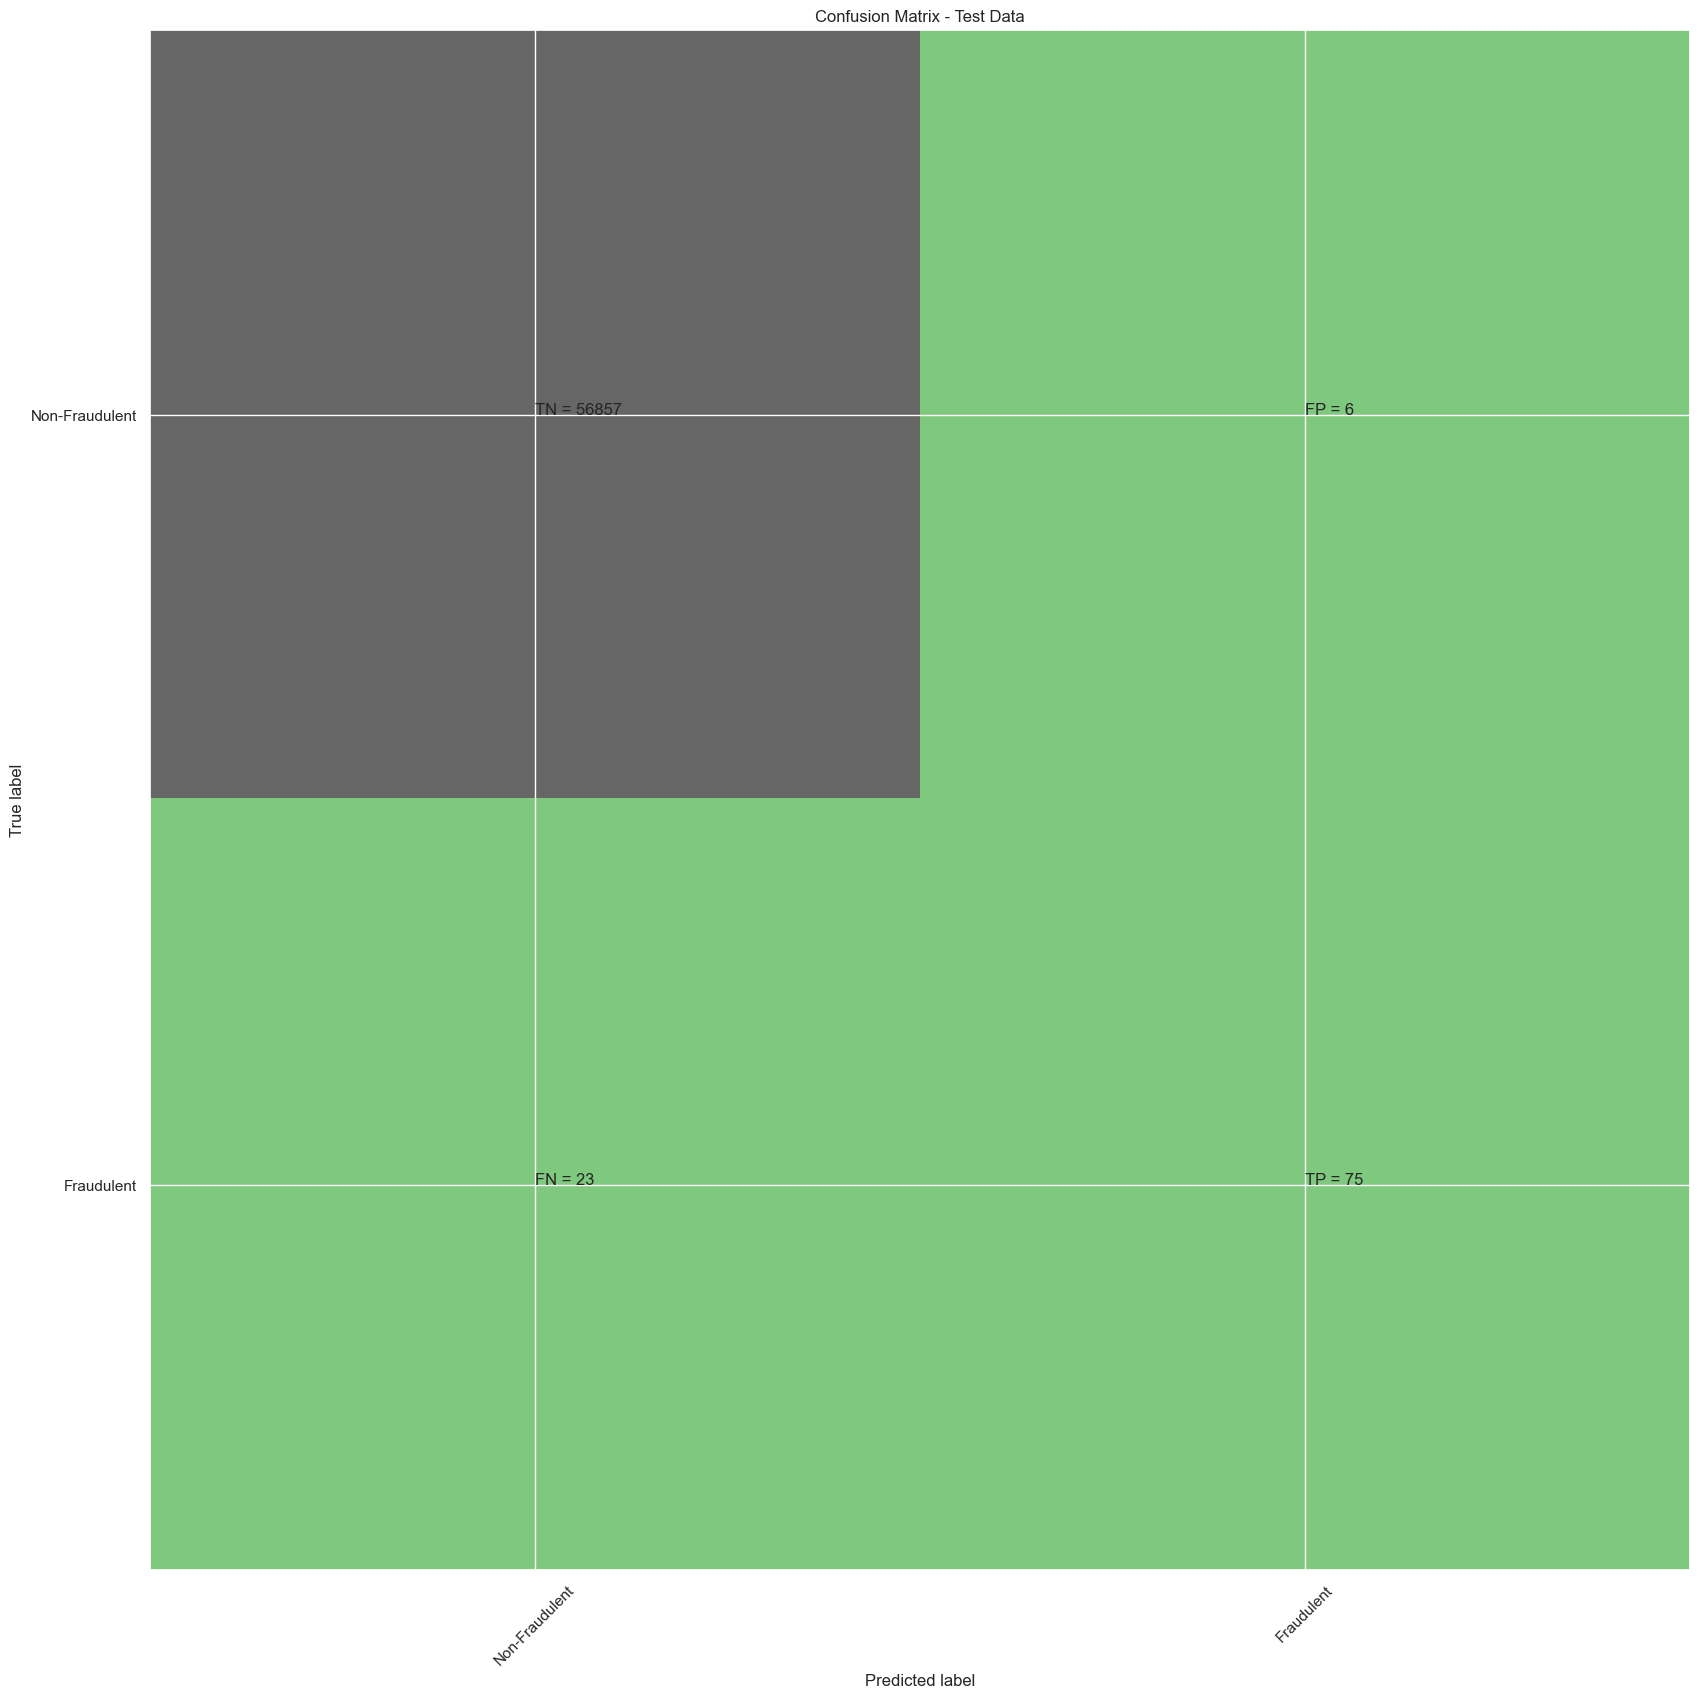

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


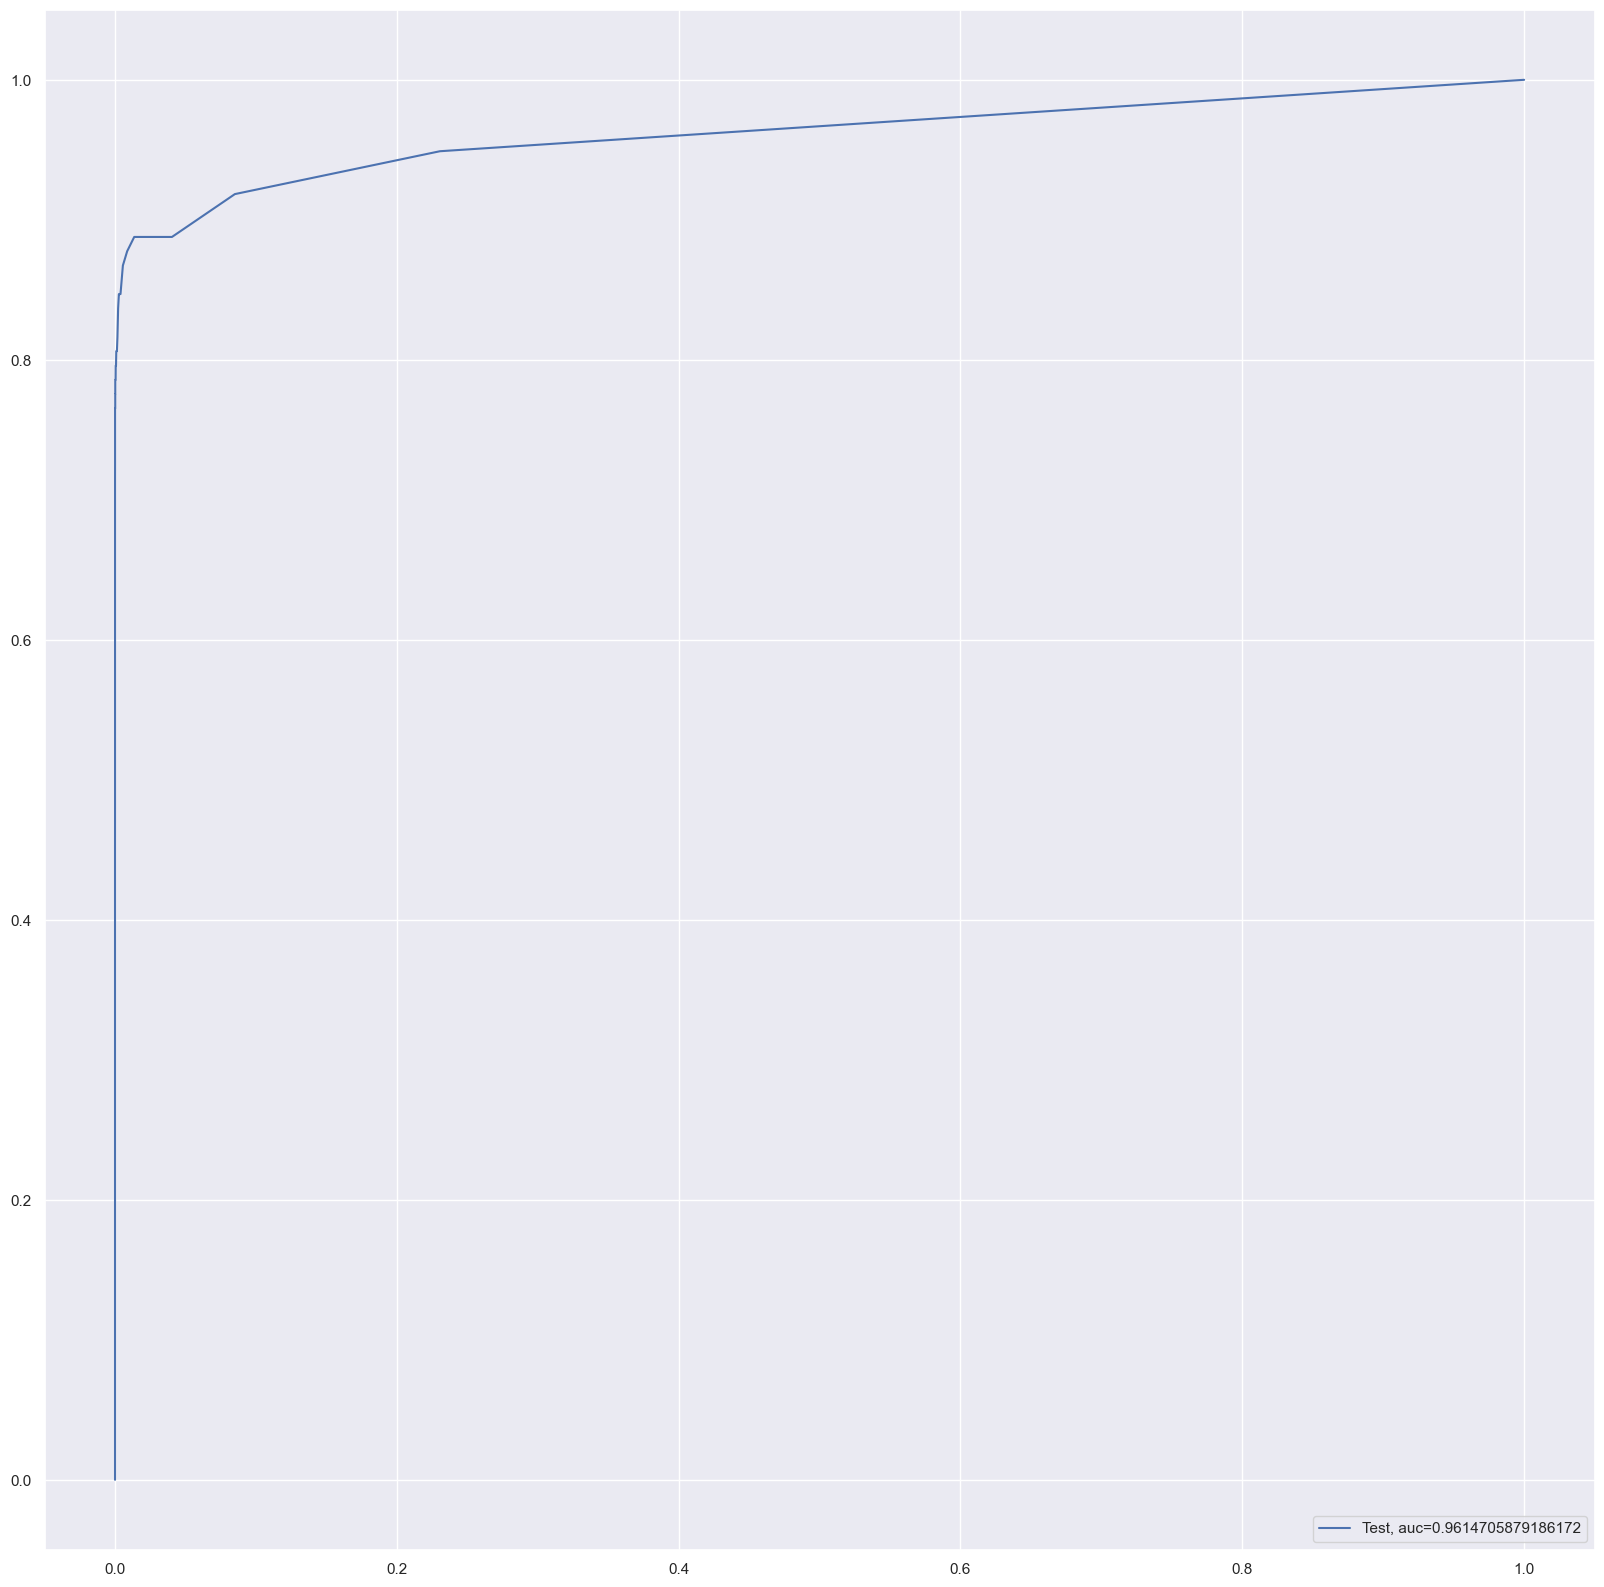

Time Taken by Model: --- 371.36247658729553 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


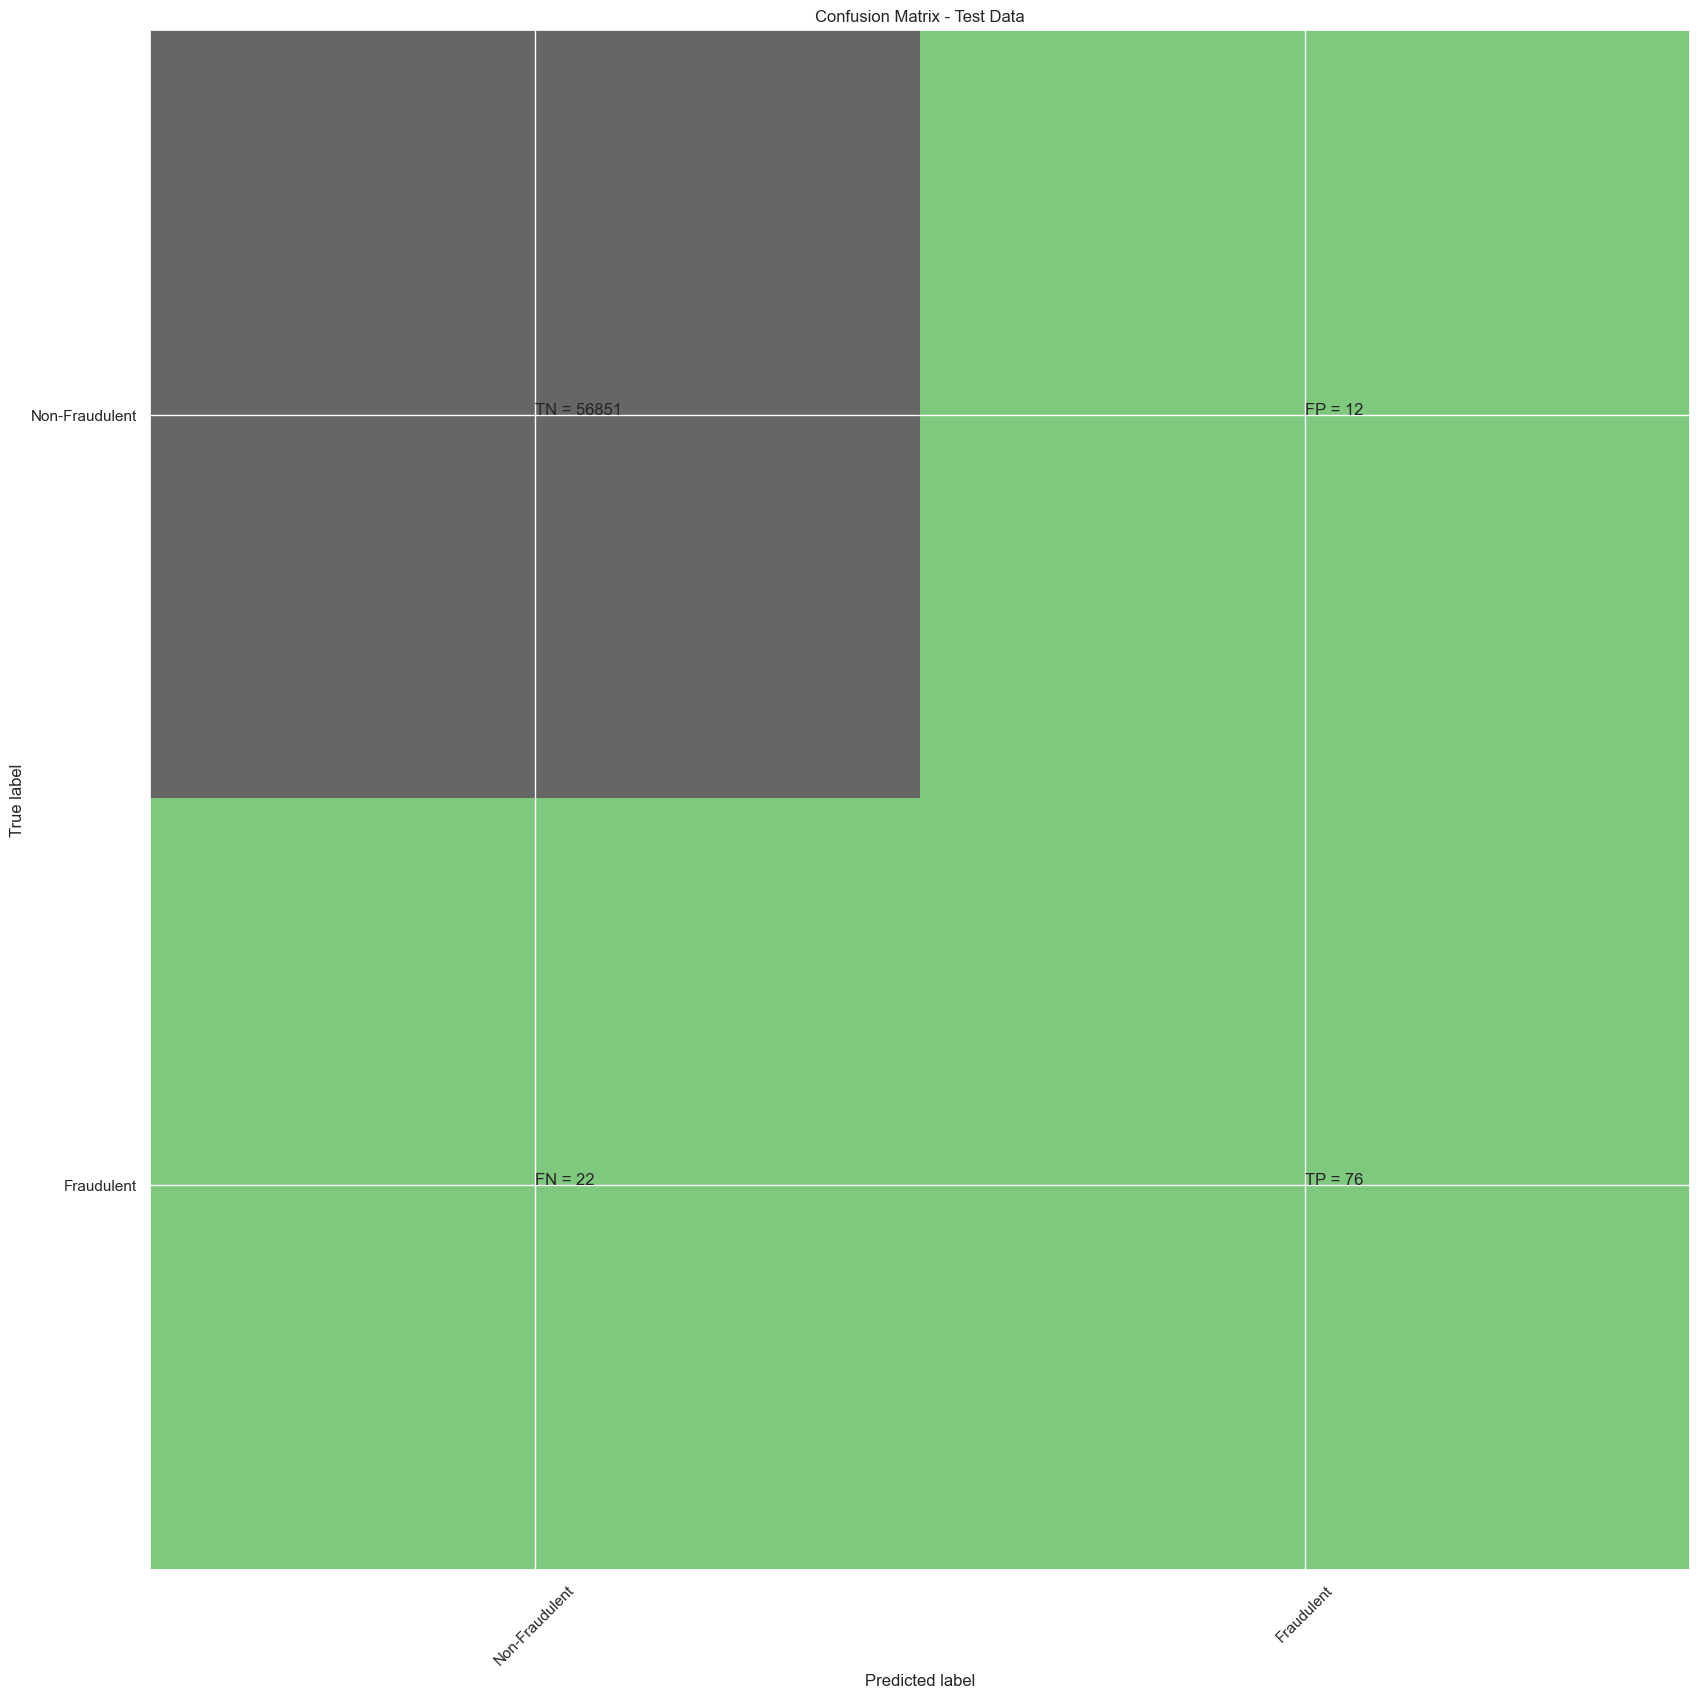

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704734293344512
XGBoost threshold: 0.000144163059303537
ROC for the test dataset 97.0%


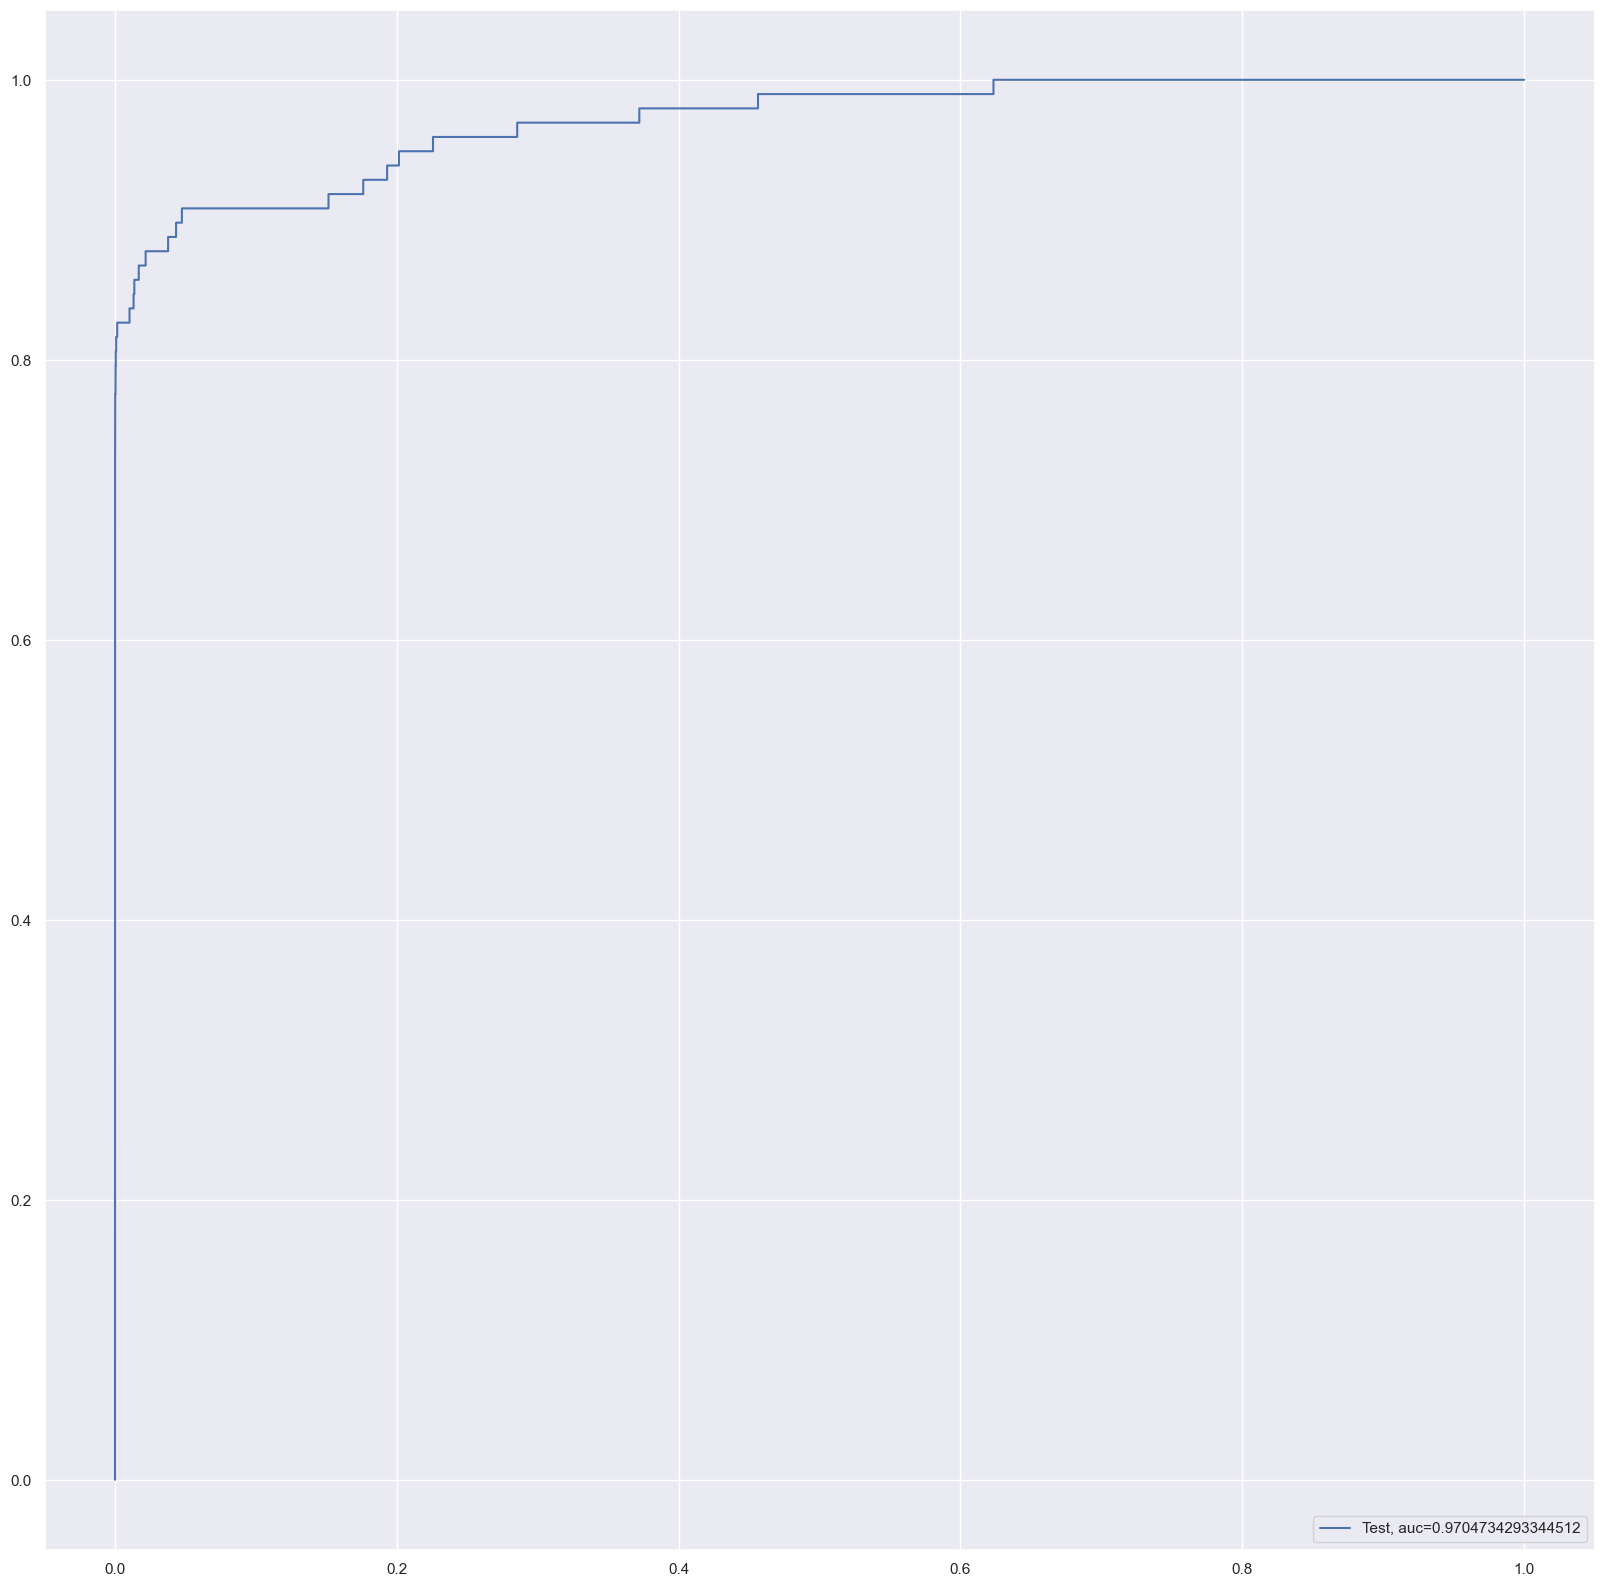

Time Taken by Model: --- 3.8029580116271973 seconds ---
--------------------------------------------------------------------------------


In [94]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [95]:
df_Results

Data_Imbalance_Handiling                                       Model  \
0                       NaN  Logistic Regression with L2 Regularisation   
1                       NaN  Logistic Regression with L1 Regularisation   
2                       NaN                                         KNN   
3                       NaN               Tree Model with gini criteria   
4                       NaN            Tree Model with entropy criteria   
5                       NaN  Logistic Regression with L2 Regularisation   
6                       NaN  Logistic Regression with L1 Regularisation   
7                       NaN                                         KNN   
8                       NaN               Tree Model with gini criteria   
9                       NaN            Tree Model with entropy criteria   
10                      NaN                               Random Forest   
11                      NaN                                     XGBoost   
12                      NaN                                         SVM   
13                      NaN  Logistic Regression with L2 Regularisation   
14                      NaN  Logistic Regression with L1 Regularisation   
15                      NaN                                         KNN   
16                      NaN               Tree Model with gini criteria   
17                      NaN            Tree Model with entropy criteria   
18                      NaN                               Random Forest   
19                      NaN                                     XGBoost   
20                      NaN                                         SVM   
21                      NaN  Logistic Regression with L2 Regularisation   
22                      NaN  Logistic Regression with L1 Regularisation   
23                      NaN                                         KNN   
24                      NaN               Tree Model with gini criteria   
25                      NaN            Tree Model with entropy criteria   
26                      NaN                               Random Forest   
27                      NaN                                     XGBoost   
28                      NaN                                         SVM   
29                      NaN  Logistic Regression with L2 Regularisation   
30                      NaN  Logistic Regression with L1 Regularisation   
31                      NaN                                         KNN   
32                      NaN               Tree Model with gini criteria   
33                      NaN            Tree Model with entropy criteria   
34                      NaN                               Random Forest   
35                      NaN                                     XGBoost   
36                      NaN                                         SVM   
37                      NaN  Logistic Regression with L2 Regularisation   
38                      NaN  Logistic Regression with L1 Regularisation   
39                      NaN                                         KNN   
40                      NaN               Tree Model with gini criteria   
41                      NaN            Tree Model with entropy criteria   
42                      NaN                               Random Forest   
43                      NaN                                     XGBoost   
44                      NaN                                         SVM   
45                      NaN  Logistic Regression with L2 Regularisation   
46                      NaN  Logistic Regression with L1 Regularisation   
47                      NaN                                         KNN   
48                      NaN               Tree Model with gini criteria   
49                      NaN            Tree Model with entropy criteria   
50                      NaN                               Random Forest   
51                      NaN                                     XGBoost   
52                      NaN 

## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


## But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

### Parameter Tuning for Final Model by Handling class imbalance

In [96]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994733238531627
XGboost roc_value: 0.9748484273156355
XGBoost threshold: 6.318236410152167e-05


In [97]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [100]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=5, n_estimators=120, n_jobs=1,
        objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1
    ), 
    param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5
)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([2.52460713, 2.74749231, 4.65023541, 5.06416621, 4.64079328,
         5.35920501, 4.47736955, 4.96065602, 5.07484274, 4.8359055 ,
         5.11004066, 5.68324676, 5.01682715, 5.53786292, 5.24537764,
         5.0550282 , 5.07397966, 5.40254965, 5.43643451, 6.18399334,
         6.24558606, 5.50841646, 6.06995802, 6.52381587, 5.64307303,
         6.11368713, 5.96252174]),
  'std_fit_time': array([0.07533618, 0.30937636, 1.01744432, 0.62259858, 0.22311129,
         0.38278585, 0.38793348, 0.42252703, 0.57173762, 0.2132719 ,
         0.35005051, 0.22384874, 0.55517489, 0.76109465, 0.02246669,
         0.17866979, 0.35093069, 0.11366346, 0.48792589, 0.58743546,
         0.41921298, 0.51938838, 0.51860379, 0.99327433, 0.39229415,
         0.5254652 , 0.51268376]),
  'mean_score_time': array([0.08066921, 0.07228808, 0.09773822, 0.10096602, 0.0928669 ,
         0.09689431, 0.08988218, 0.09327536, 0.09698319, 0.1158071 ,
         0.12185636, 0.12722788, 0.11284504, 0.122

In [102]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
 'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2]
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0,
        learning_rate=0.1, max_delta_step=0, max_depth=4,
        min_child_weight=4, n_estimators=130, n_jobs=1,
        objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1
    ), 
    param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5
)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([5.29680462, 6.72893329, 6.15836172, 6.30473986, 6.30959187]),
  'std_fit_time': array([0.5709984 , 0.38286419, 0.23581393, 0.36679309, 0.82427011]),
  'mean_score_time': array([0.15817223, 0.15976558, 0.16144681, 0.15827255, 0.16079721]),
  'std_score_time': array([0.0017898 , 0.00234485, 0.00609565, 0.0024235 , 0.00662523]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99909445, 0.99943189, 0.9994903 , 0.99950942, 0.99951926]),
  'split1_test_score': array([0.99984108, 0.99998592, 0.99999085, 0.99999755, 0.99999911]),
  'split2_test_score': array([0.97665113, 0.99377018, 0.99803818, 0.99540731, 0.99952292]),
  'split3_test_score': array([0.99953252, 0.99986808, 0.99988

In [103]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {
    'gamma': [i/10.0 for i in range(0, 5)]
}

gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0,
        learning_rate=0.2, max_delta_step=0, max_depth=4,
        min_child_weight=4, n_estimators=130, n_jobs=1,
        objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1
    ), 
    param_grid=param_test, scoring='roc_auc', n_jobs=4, cv=5
)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([5.2589819 , 6.89265881, 6.55939717, 6.16721883, 6.40439525]),
  'std_fit_time': array([0.40307979, 0.91214662, 0.35761147, 0.48009818, 0.3092617 ]),
  'mean_score_time': array([0.1620575 , 0.164821  , 0.16305876, 0.16175694, 0.16003222]),
  'std_score_time': array([0.00313045, 0.00387609, 0.00272721, 0.00177824, 0.00413697]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value=1e+20),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99951926, 0.99963246, 0.99956031, 0.99956033, 0.99960639]),
  'split1_test_score': array([0.99999911, 1.        , 1.        , 1.        , 1.        ]),
  'split2_test_score': array([0.99952292, 0.99968079, 0.99976086, 0.9994603 , 0.99926003]),
  'split3_test_score': array([0.9999339 , 0.99992777, 0.99993626, 0.99991487, 0.99991596]),
  'split4_test_score': ar

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import numpy as np

# Initialize and fit the XGBoost model
XGBmodel = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0.1,
    learning_rate=0.2, max_delta_step=0, max_depth=4,
    min_child_weight=4, n_estimators=130, n_jobs=1,
    objective='binary:logistic', random_state=42,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1, verbosity=1
)

# Fit model on oversampled data
XGBmodel.fit(X_over, y_over)

# Evaluate the model
XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost roc_value: {0}".format(XGB_roc_value))

# Calculate and print the optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold: {0}".format(threshold))


Model Accuracy: 0.9993153210091115
XGBoost roc_value: 0.9824039124469232
XGBoost threshold: 0.010433205403387547


In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 

# Define the parameter grid
param_test = {
    'subsample': [i/10.0 for i in range(7, 10)],
    'colsample_bytree': [i/10.0 for i in range(7, 10)]
}

# Initialize the GridSearchCV object
gsearch1 = GridSearchCV(
    estimator = XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0.1,
        learning_rate=0.2, max_delta_step=0, max_depth=4,
        min_child_weight=4, n_estimators=130, n_jobs=1,
        objective='binary:logistic', random_state=42,
        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
        subsample=1, verbosity=1
    ), 
    param_grid = param_test,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 5
)

# Fit the GridSearchCV object
gsearch1.fit(X_over, y_over)

# Output results
cv_results = gsearch1.cv_results_
best_params = gsearch1.best_params_
best_score = gsearch1.best_score_

print("CV Results:", cv_results)
print("Best Parameters:", best_params)
print("Best Score:", best_score)


CV Results: {'mean_fit_time': array([6.8074049 , 8.28919568, 7.45840063, 7.86233616, 7.56691055,
       7.77437086, 8.08951483, 7.58702641, 7.63036771]), 'std_fit_time': array([0.5445773 , 0.16410594, 0.51381587, 0.36971364, 0.41043995,
       0.39039703, 0.77754948, 0.18917916, 0.77442971]), 'mean_score_time': array([0.1652575 , 0.1676692 , 0.16642318, 0.16369762, 0.16602225,
       0.16260591, 0.16313825, 0.16431055, 0.16047549]), 'std_score_time': array([0.00249005, 0.00495505, 0.00363899, 0.00259104, 0.00508806,
       0.00310435, 0.00353289, 0.00465263, 0.00303722]), 'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=1e+20), 'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_valu

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Initialize and fit the model
XGBmodel = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
    colsample_bynode=1, colsample_bytree=1, gamma=0.1,
    learning_rate=0.2, max_delta_step=0, max_depth=4,
    min_child_weight=4, n_estimators=130, n_jobs=1,
    objective='binary:logistic', random_state=42,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    subsample=0.8, verbosity=1
)

# Fit the model with training data
XGBmodel.fit(X_over, y_over)

# Evaluate the model
XGB_test_score = XGBmodel.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:}')

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Determine the optimal threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print(f'XGBoost Optimal Threshold: {threshold:}')


Model Accuracy: 0.9993679886237953
XGBoost ROC AUC: 0.9850086333532763
XGBoost Optimal Threshold: 0.003164233872666955


**As the roc value has dropped we will take not consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Initialize and fit the XGBoost model on the balanced dataset
clf = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0.1,
    learning_rate=0.2, max_delta_step=0, max_depth=4,
    min_child_weight=4, n_estimators=130, n_jobs=1,
    objective='binary:logistic', random_state=42,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    subsample=1, verbosity=1
)

# Fit the model with the balanced dataset
clf.fit(X_over, y_over)

# Evaluate the model
XGB_test_score = clf.score(X_test, y_test)
print(f'Model Accuracy: {XGB_test_score:}')

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print(f'XGBoost ROC AUC: {XGB_roc_value:}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Determine the optimal threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print(f'XGBoost Optimal Threshold: {threshold:}')


Model Accuracy: 0.9993153210091115
XGBoost ROC AUC: 0.9824039124469232
XGBoost Optimal Threshold: 0.010433205403387547


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


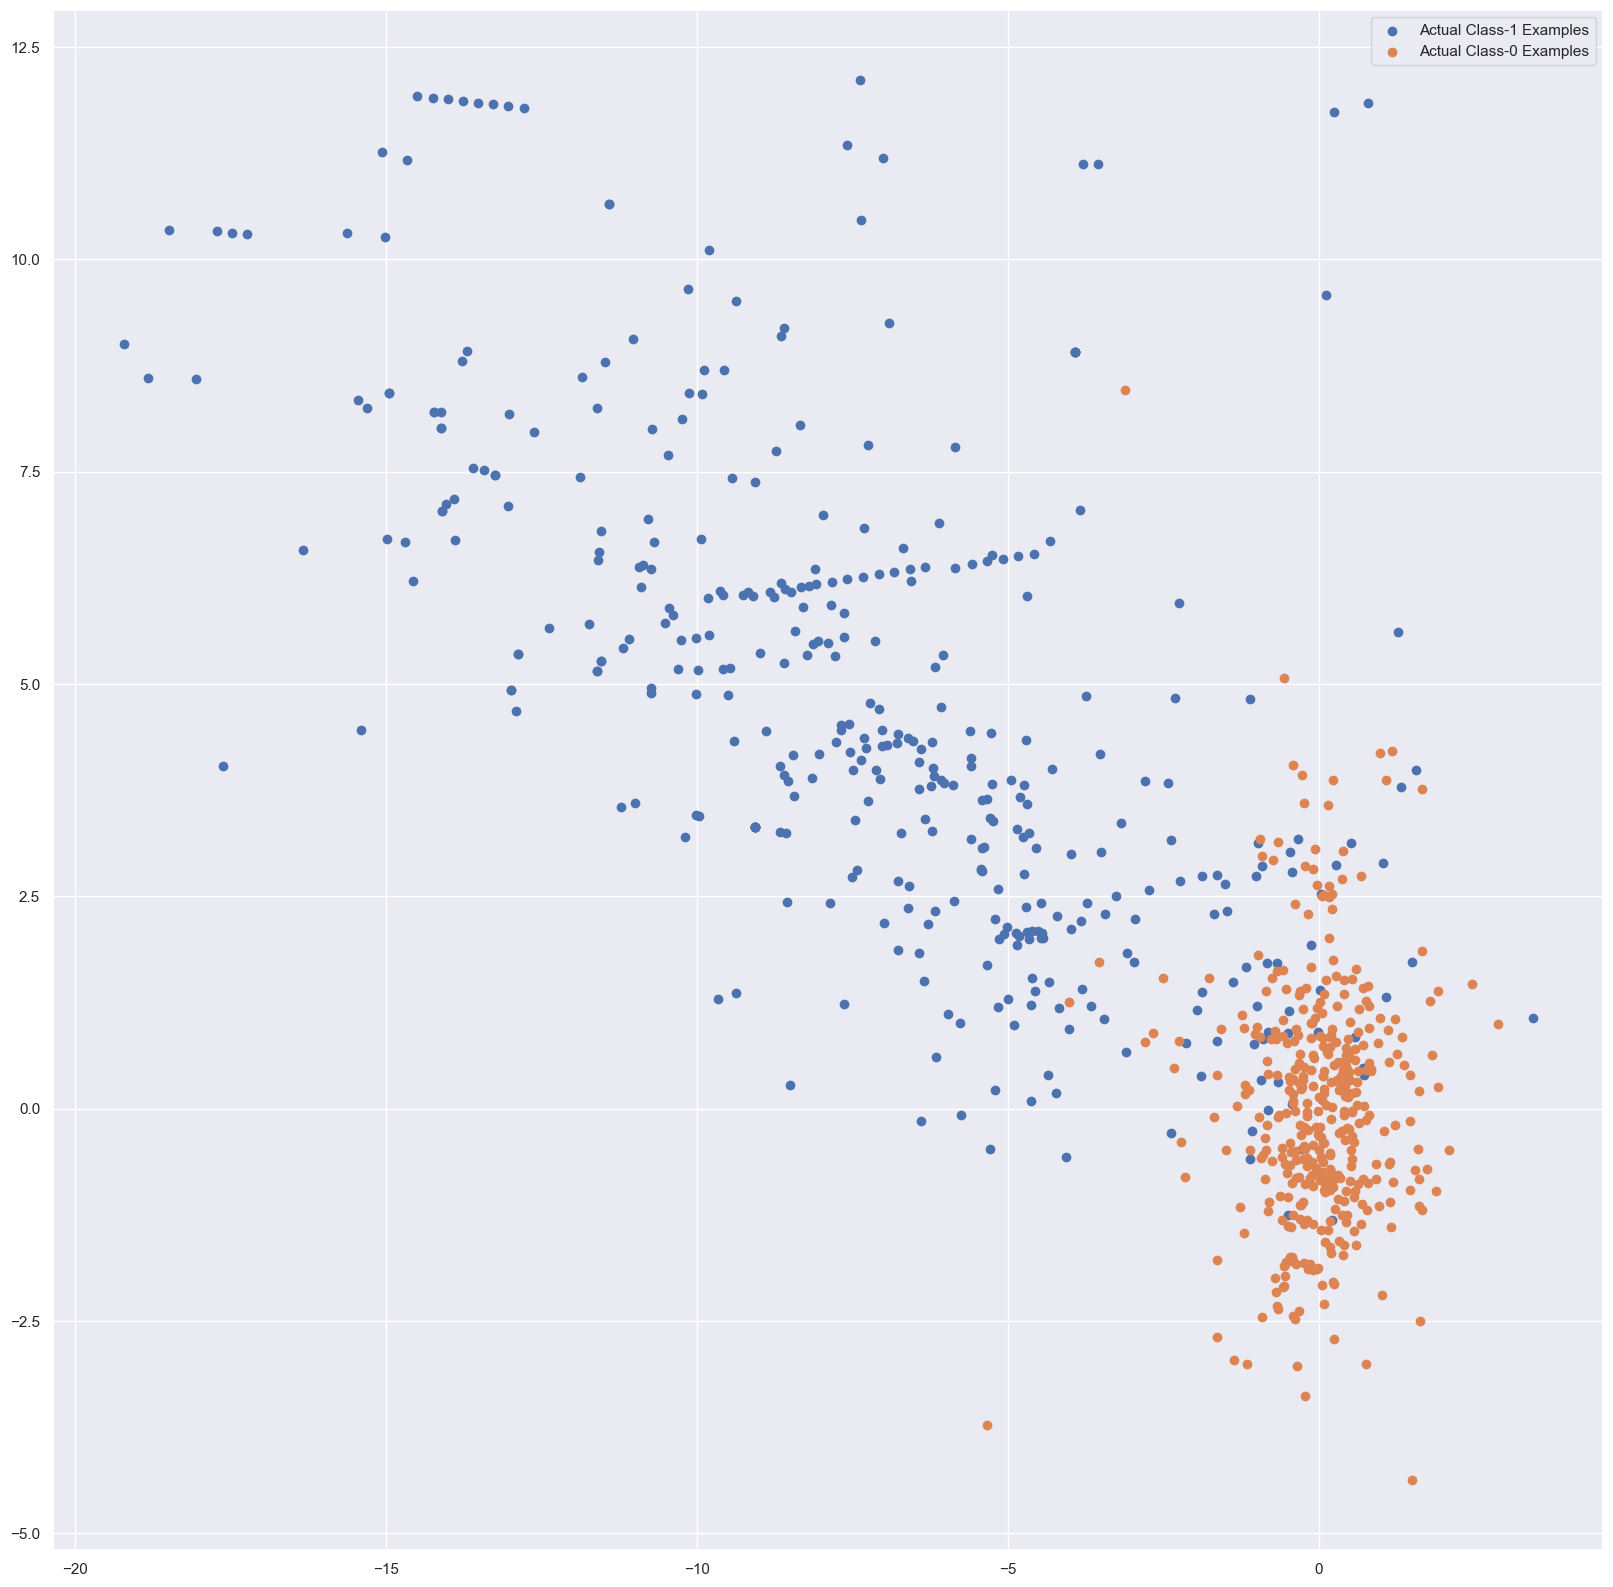

In [111]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [112]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9850086333532763
XGBoost threshold: 0.003164233872666955


## Model Selection:
## Overall conclusion after running models on Oversampled data: 

Looking at above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results

We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 


**Model Accuracy: 0.9993153210091115**

**XGboost roc_value: 0.9850086333532763**

**XGBoost threshold: 0.003164233872666955**

### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.



### Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

### Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.